# **✨ Classification Models - Marketing Campaign by Datalicious ✨**

<!-- ![banner.png](https://raw.githubusercontent.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/main/assets/banner.png) -->

![banner](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/assets/54845293/e995058c-4aa2-4c39-adb6-5b4ba5e06fa2)

**✅ Members of Datalicious ✅**

1. Nur Imam Masri
2. Astuti Rahmawati
3. Prasidya Bagaskara
4. Moh. Harwin Prayoga
5. Riskiyatul Hasanah
6. M Rayhan Azzindani
7. Siti Hajjah Mardiah
8. Christine
9. M. Ifzal Asril

## **📍 Table of Content 📍**

- Data Cleansing/Preprocessing
    - Handling Duplicated Rows
    - Handling Invalid Values
    - Data Splitting
    - Handling Missing Values
    - Handling Outliers
    - Feature Engineering / Extraction
    - Feature Transformation (Numeric)
    - Feature Encoding (Categoric)
    - Feature Selection
    - Handling Imbalanced Data
    
- Modelling & Evaluation
    - Machine Learning Techniques
    - Function for Model Evaluation
    - Modelling
        - Decision Tree
        - Random Forest
        - Logistic Regression
        - Naive Bayes
        - K-Nearest Neighbors
        - MLP Classifier (Neural Network)
        - Adaboost Classifier
        - XGBoost Classifier
        - Gradient Boosting Classifier
        - Support Vector Machine
    - Hyperparameter Tuning
    - Model Additional
    - Model Comparison
    - Model Selection
    - Business Insight and Recomendation
    - Simulation
- Final Presentation

## **⚙ Work Environment ⚙**

- **Tools**

[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/blob/main/Response%20Prediction%20Classification%20Marketing%20Campaign.ipynb)

- **Programming Language**

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)

- **Git and Github**

Repository : [Marketing Campaign Model Prediction by Datalicious](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious.git)

- **Libraries**

[Requirements Text](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/blob/main/requirements.txt)

- **Dataset**

[Marketing campaign](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign "Marketing campaign dataset from Kaggle")

# **====== STAGE 2 ======**
`Stage 2 (Data PreProcessing)`

# **🏝 Data Cleansing/Preprocessing 🏝**

## **📌 Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

## **📌 Import  Raw Datasets**

In [2]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
# source = 'https://raw.githubusercontent.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/main/data/marketing_campaign.csv'
source = 'data/marketing_campaign.csv'
# df = pd.read_csv(source, na_values = missing_values)
df = pd.read_csv(source, sep=";")
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [3]:
cat_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'Complain', 'Response']
            
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

## **📌 Handling Duplicate Rows**

In [4]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

In [5]:
df.duplicated().sum()

0

In [6]:
print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

Data Frame Dimension Before Duplicate Removal: (2240, 29)
Data Frame Dimension After Duplicate Removal: (2240, 29)


In [7]:
df.duplicated(subset=["ID"]).sum()

0

### **Kesimpulan**

- Berdasarkan hasil pengecekan, tidak ditemui baris data yang memiliki duplikat. Sehingga kami tidak perlu melakukan handling duplicated data
- Pada pengecekan duplikat subset untuk ID tidak ditemukan ada nya ID customer yang sama

## **📌 Handling Invalid Values**

Mengecek isi unique values dari data

In [8]:
for x in df.columns : 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Year_Birth =====
[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, '.....']

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

===== Marital_Status =====
['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

===== Income =====
[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== Dt_Customer =====
['2012-09-04', '2014-03-08', '2013-08-21', '2014-02-10', '2014-01-19', '2013-09-09', '2012-11-13', '2013-05-08', '2013-06-06', '2014-03-13', '.....']

===== Recency =====
[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, '.....']

===== MntWines =====
[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, '.....']

===== MntFruits =====
[88, 1, 49, 4, 43, 42, 65, 10, 0, 5, '.....']

===== MntMeatProducts =====
[546, 6, 127, 20, 118, 98, 164, 56

### **1. Melakukan konversi data `Date`**

Untuk mempermudah dalam proses feature extraction/engineering maka untuk data yang mengandung datetime akan dilakukan konversi ke format datetime pandas

In [9]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

### **2. Melakukan penyederhanaan `Marital_Status`**

Akan dilakukan replace data / menyatukan yang memiliki arti yang sama agar mengurangi jumlah dimensi maupun redudansi pada data

- Mengganti kategori `Widow`, `Alone`, `Absurd`, `YOLO` menjadi `Single`
- Mengganti kategori `Together` menjadi `Married`
- Mempertahankan kategori `Divorced`

In [10]:
# Mengganti kategori 'Widow', 'Alone', 'Absurd', 'YOLO' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Widow', 'Alone', 'Absurd', 'YOLO'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

In [11]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

### **3. Melakukan penyederhanaan `Education_Simple`**

Untuk kategori `2n Cycle` dan `Master` juga kurang lebih sama. Maka dari itu, baris yang memiliki kategori `2n Cycle` akan dihapus dan digantikan dengan kategori `Master`.

In [12]:
# Levels : Basic - Graduation - 2n Cycle - Master - PhD
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')

In [13]:
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation        Married   71613        0         0   
3  6182        1984  Graduation        Married   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

### **Kesimpulan**
Berdasarkan hasil pengecekan, Untuk kolom `Dt_Customer` sebelumnya masih berbentuk string/object, untuk tipe datanya kurang sesuai sehingga di ubah menjadi Datetime untuk diolah pada tahap Feature Engineering. Kemudian pada `Marital_Status` dan `Education` replace data / menyatukan yang memiliki arti yang sama agar mengurangi jumlah dimensi maupun redudansi pada data.

## **📌 Data Splitting**

Data preparation adalah proses mengubah data mentah menjadi bentuk yang sesuai untuk pemodelan.

Salah satu masalah dalam `Data Preprocessing` serta menerapkan `Transformasi` pada `Seluruh Kumpulan Data` dapat menyebabkan masalah yang disebut sebagai `data leakage` (kebocoran data). Di mana pengetahuan tentang kumpulan pengujian (data test) bocor ke dalam kumpulan data yang digunakan untuk melatih model (data train). Hal ini dapat mengakibatkan estimasi performa model yang salah/bias saat membuat prediksi pada data baru.

Data preparation harus dilakukan `fit` dengan `training dataset` saja. Artinya, setiap koefisien atau model yang disiapkan untuk proses penyiapan data hanya boleh menggunakan deretan data dalam training dataset.

Setelah melakukan `fit`, metode data preparation kemudian dapat diterapkan `apply / transform` ke data train, dan ke data test.

1. Split Data.
2. Fit Data Preparation on Training Dataset.
3. Apply Data Preparation to Train and Test Datasets.
4. Evaluate Models.

Pada proses `Split Data` ini, kami akan membagi nya menjadi `training set` dan `testing set` dengan proporsi `75:25`

In [14]:
from sklearn.model_selection import train_test_split

# splitting tha data
df_train, df_test = train_test_split(df, test_size=0.25, stratify=df[['Response']], random_state=42)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

print(df_train.shape)
print(df_test.shape)

(1680, 29)
(560, 29)


In [15]:
df_train.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0   387        1976       Basic        Married    7500        0         0   
1  3537        1981  Graduation        Married   31089        1         0   
2  3075        1972         PhD        Married   59973        0         0   
3  4220        1970         PhD        Married   59892        0         1   
4  4472        1970         PhD       Divorced   35682        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13       59         6         16               11               11   
1  2012-08-17       57        31          3               31                2   
2  2013-09-11       47       130         30              168               20   
3  2013-11-02       26        73          0               13                0   
4  2014-06-27       34        23          0                8                6   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                 1            16                  1                2   
1                 8             4                  3                3   
2                34             0                  1                3   
3                 1             0                  1                2   
4                 2            18                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  8             0   
1                    0                  4                  8             0   
2                    4                  7                  1             0   
3                    1                  3                  3             0   
4                    1                  3                  2             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         0  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [16]:
df_test.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  10146        1972         PhD        Married   38887        1         0   
1      1        1961  Graduation         Single   57091        0         0   
2   7875        1949  Graduation        Married   72025        0         0   
3   7807        1974  Graduation        Married   44989        0         1   
4   4268        1959  Graduation        Married   53154        0         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2014-03-02       17        25          1               13                0   
1  2014-06-15        0       464          5               64                7   
2  2014-04-29       46       967          0              617               43   
3  2012-09-12       26        98          0              106               49   
4  2014-06-09       50       129          0               21                0   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                 0             3                  1                1   
1                 0            37                  1                7   
2                50             0                  1                4   
3                10           106                  5                5   
4                 1             7                  1                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  7             0   
1                    3                  7                  5             0   
2                    8                 13                  2             0   
3                    1                  5                  6             0   
4                    1                  4                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             1         0   
2             1             1             1             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         0  
1              3         11         1  
2              3         11         1  
3              3         11         0  
4              3         11         0

## **📌 Handling Missing Value**

Melakukan pengecekan jumlah Missing Values dan Persentase nya

In [17]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc["NULL Train"] = df_train[nvc.index].isnull().sum()
nvc["NULL Test"] = df_test[nvc.index].isnull().sum()
nvc

Missing values status: True


Total Null Values  Percentage       Data Type  \
Income                              24       1.071           int64   
ID                                   0           0           int64   
Z_CostContact                        0           0           int64   
Complain                             0           0          object   
AcceptedCmp2                         0           0          object   
AcceptedCmp1                         0           0         float64   
AcceptedCmp5                         0           0           int64   
AcceptedCmp4                         0           0           int64   
AcceptedCmp3                         0           0  datetime64[ns]   
NumWebVisitsMonth                    0           0           int64   
NumStorePurchases                    0           0           int64   
NumCatalogPurchases                  0           0           int64   
NumWebPurchases                      0           0           int64   
NumDealsPurchases                    0           0           int64   
Z_Revenue                            0           0           int64   
MntGoldProds                         0           0           int64   
MntFishProducts                      0           0           int64   
MntMeatProducts                      0           0           int64   
MntFruits                            0           0           int64   
MntWines                             0           0           int64   
Recency                              0           0           int64   
Dt_Customer                          0           0           int64   
Teenhome                             0           0           int64   
Kidhome                              0           0           int64   
Marital_Status                       0           0           int64   
Education                            0           0           int64   
Year_Birth                           0           0           int64   
MntSweetProducts                     0           0           int64   
Response                             0           0           int64   

                     NULL Train  NULL Test  
Income                       20          4  
ID                            0          0  
Z_CostContact                 0          0  
Complain                      0          0  
AcceptedCmp2                  0          0  
AcceptedCmp1                  0          0  
AcceptedCmp5                  0          0  
AcceptedCmp4                  0          0  
AcceptedCmp3                  0          0  
NumWebVisitsMonth             0          0  
NumStorePurchases             0          0  
NumCatalogPurchases           0          0  
NumWebPurchases               0          0  
NumDealsPurchases             0          0  
Z_Revenue                     0          0  
MntGoldProds                  0          0  
MntFishProducts               0          0  
MntMeatProducts               0          0  
MntFruits                     0          0  
MntWines                      0          0  
Recency                       0          0  
Dt_Customer                   0          0  
Teenhome                      0          0  
Kidhome                       0          0  
Marital_Status                0          0  
Education                     0          0  
Year_Birth                    0          0  
MntSweetProducts              0          0  
Response                      0          0

Berdasarkan hasil analisa awal, dapat diketahui bahwa terdapat data kosong pada kolom income sebanyak 24 baris (20 pada data train, 4 pada data test) dengan persentase sebesar 1,07% dari keseluruhan data.

Pada proses handling missing values untuk kolom `Income` ada beberapa metode yang dapat di lakukan :
- **Drop Rows Missing Values**
- **Imputation Median**
    - `Fillna` or `SimpleImputer`
- **Multivariate Approach**
    - Perlu dipastikan untuk data yang dimiliki semuanya dalam bentuk tipe numerical (tidak ada bertipe obeject/string maupun datetime)
    - Kita juga drop kolom yang tidak penting seperti data tanggal `Dt_Customer`
    - Metode :
        - `KNNImputer` or K-Nearest Neighbor
        - `MICE` or Multiple Imputation by Chained Equation
            - Imputation using MICE with `IterativeImputer`
            - Imputation using MICE with `LightGBM`
            
**Choice Determination:**

- Pada proses handling missing values ini kita menggunakan `Imputation using MICE with LightGBM`

### **Drop Rows**

karena data yang kita miliki terbatas maka untuk proses ini tidak akan kita gunakan

In [18]:
# print("Jumlah rows sebelum drop missing values (train set) =", df_train.shape[0])
# df_train = df_train.dropna(subset=['Income'])
# print("Jumlah rows setelah drop missing values (train set) =", df_train.shape[0])
# df_train['Income'].isna().sum()

In [19]:
# print("Jumlah rows sebelum drop missing values (test set) =", df_test.shape[0])
# df_test = df_test.dropna(subset=['Income'])
# print("Jumlah rows setelah drop missing values (test set) =", df_test.shape[0])
# df_test['Income'].isna().sum()

**Pros**
- Straightforward and simple to use.
- Beneficial when missing values have no importance. 

**Cons**
- Using this approach can lead to information loss, which can introduce bias to the final dataset.
- Data set with a large proportion of missing value can be significantly decreased, which can impact the result of all statistical analysis on that data set. 

### **Imputation**

Imputation (Median), karena Highly Positively Skewed

In [20]:
# print("Jumlah missing values Income sebelum Imputation (train set) =", df_train["Income"].isna().sum())
# print("Jumlah missing values Income sebelum Imputation (test set) =", df_test["Income"].isna().sum())

Imputation using `fillna`

In [21]:
# df_train['Income'].fillna(df_train['Income'].median(), inplace=True)
# df_train['Income'].isna().sum()

In [22]:
# df_test['Income'].fillna(df_train['Income'].median(), inplace=True)
# df_test['Income'].isna().sum()

Imputation using `SimpleImputer`

In [23]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# df_train["Income"] = imputer.fit_transform(df_train[["Income"]])
# df_test["Income"] = imputer.transform(df_test[["Income"]])

In [24]:
# print("Jumlah missing values Income setelah Imputation (train set) =", df_train["Income"].isna().sum())
# print("Jumlah missing values Income setelah Imputation (test set) =", df_test["Income"].isna().sum())

**Pros**
- Simplicity and ease of implementation are some of the benefits of the mean and median imputation.
- The imputation is performed using the existing information from the non-missing data; hence no additional data is required.
- Mean and median imputation can provide a good estimate of the missing values, respectively for normally distributed data, and skewed data.

**Cons**
- We cannot apply these two strategies to categorical columns. They can only work for numerical ones.
- Mean imputation is sensitive to outliers and may not be a good representation of the central tendency of the data. Similarly to the mean, the median also may not better represent the central tendency.

### **Multivariate Approach**

Multivariate Approach (MICE Imputation, KNN Imputer, dll)

Multiple imputations compensate for missing data and produce multiple datasets by regression model and are considered the solver of the old problem of univariate imputation. The univariate imputes data only from a specific column where the data cell was missing. Multivariate imputation works simultaneously, with all variables in all columns, whether missing or observed. It has emerged as a principal method of solving missing data problems. All incomplete datasets analyzed before Multiple Imputation by Chained Equations (MICE) presented were misdiagnosed; results obtained were invalid and should not be countable to yield reasonable conclusions.

In multiple imputations, following a typical model tends to preserve variances, means, covariance, linear regression coefficients, and correlation. MI, therefore, was designed to restore variability that is lost during single imputation and consequently correct it. Rounding procedures included increasing the variability of imputed values.

Multiple imputations help to ensure that the missing data is uncertain by generating various reasonable imputed data sets and integrating findings from each of them properly. Multiple imputations employ the imputation, analysis, and pooling processes

The advantages of multiple imputation are : 
- Results in unbiased estimates, providing more validity than ad hoc approaches to missing data
- Uses all available data, preserving sample size and statistical power

**Pros**
- Multiple imputation is powerful at dealing with missing data in multiple variables and multiple data types. 
- The approach can produce much better results than mean and median imputations. 
- Many other algorithms, such as K-Nearest Neighbors, Random forest, and neural networks, can be used as the backbone of the multiple imputation prediction for making predictions.  

**Cons**
- Multiple imputation assumes that the data is missing at random (MAR).
- Despite all the benefits, this approach can be computationally expensive compared to other techniques, especially when working with large datasets. 
- This approach requires more effort than the previous ones.

Dikarenakan pada proses multivariate approach memerlukan semua feature bertipe numerical sehingga untuk data yang masih bertipe object/string dan date akan di drop pada data temp

In [25]:
df_ma_train = df_train.copy()
df_ma_test = df_test.copy()

In [26]:
drop = ["ID", "Education", "Marital_Status", "Dt_Customer"]
df_ma_train = df_ma_train.drop(drop, axis=1)
df_ma_test = df_ma_test.drop(drop, axis=1)

In [27]:
df_ma_train.head()

Year_Birth  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1976    7500        0         0       59         6         16   
1        1981   31089        1         0       57        31          3   
2        1972   59973        0         0       47       130         30   
3        1970   59892        0         1       26        73          0   
4        1970   35682        1         0       34        23          0   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0               11               11                 1            16   
1               31                2                 8             4   
2              168               20                34             0   
3               13                0                 1             0   
4                8                6                 2            18   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                2                    0                  3   
1                  3                3                    0                  4   
2                  1                3                    4                  7   
3                  1                2                    1                  3   
4                  1                1                    1                  3   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  8             0             0             0             0   
1                  8             0             0             0             0   
2                  1             0             0             0             0   
3                  3             0             0             0             0   
4                  2             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0         0              3         11         0  
1             0         0              3         11         0  
2             0         0              3         11         0  
3             0         0              3         11         0  
4             0         0              3         11         0

In [28]:
df_ma_test.head()

Year_Birth  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        1972   38887        1         0       17        25          1   
1        1961   57091        0         0        0       464          5   
2        1949   72025        0         0       46       967          0   
3        1974   44989        0         1       26        98          0   
4        1959   53154        0         1       50       129          0   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0               13                0                 0             3   
1               64                7                 0            37   
2              617               43                50             0   
3              106               49                10           106   
4               21                0                 1             7   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                1                    0                  3   
1                  1                7                    3                  7   
2                  1                4                    8                 13   
3                  5                5                    1                  5   
4                  1                3                    1                  4   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             1             1             1   
3                  6             0             0             0             0   
4                  4             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0             0         0              3         11         0  
1             1         0              3         11         1  
2             0         0              3         11         1  
3             0         0              3         11         0  
4             0         0              3         11         0

#### **Implementation Multivariate Approach**

**Two main methods we use here to impute missing values**

- `KNN Imputer` or K-Nearest Neighbor
- `MICE` or Multiple Imputation by Chained Equation

Here, Multiple imputations are performed using `sklearn` and `fancyimpute`.

**To install fancyimpute**

`pip install fancyimpute`

#### **Imputation using `KNNImputer`**

In [29]:
# print("Jumlah missing values Income sebelum Imputation (train set) =", df_train["Income"].isna().sum())
# print("Jumlah missing values Income sebelum Imputation (test set) =", df_test["Income"].isna().sum())

In [30]:
# from sklearn.impute import KNNImputer

# # Train
# knn_imputer = KNNImputer(n_neighbors=5)
# df_imputed_train = pd.DataFrame(
#     knn_imputer.fit_transform(df_ma_train),
#     columns=df_ma_train.columns
# )
# df_train["Income"] = df_imputed_train["Income"].copy()

# # Test
# df_imputed_test = pd.DataFrame(
#     knn_imputer.transform(df_ma_test),
#     columns=df_ma_test.columns
# )
# df_test["Income"] = df_imputed_test["Income"].copy()

In [31]:
# print("Jumlah missing values Income sesudah Imputation (train set) =", df_train["Income"].isna().sum())
# print("Jumlah missing values Income sesudah Imputation (test set) =", df_test["Income"].isna().sum())

pada fancyimpute KNN Imputer hanya ada fungsi fit transform sehingga tidak digunakan pada split data test
```
from fancyimpute import KNN
knn_imputer.transform(df_ma_train)
```

#### **Imputation using `MICE` with `IterativeImputer`**

MICE Imputation, short for ‘Multiple Imputation by Chained Equation’ is an advanced missing data imputation technique that uses multiple iterations of Machine Learning model training to predict the missing values using known values from other features in the data as predictors.

In [32]:
# print("Jumlah missing values Income sebelum Imputation (train set) =", df_train["Income"].isna().sum())
# print("Jumlah missing values Income sebelum Imputation (test set) =", df_test["Income"].isna().sum())

In [33]:
# # Note: make sure to import the enable_iterative_imputer function before 
# # you import the IterativeImputer, as the feature is classified as 
# # experimental, and failing to do so will result in an ImportError.
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imputer = IterativeImputer(max_iter=10, random_state=0)

# # Train
# df_imputed_train = pd.DataFrame(
#     imputer.fit_transform(df_ma_train),
#     columns=df_ma_train.columns
# )

# df_train["Income"] = df_imputed_train["Income"].copy()

# # Test 
# df_imputed_test = pd.DataFrame(
#     imputer.transform(df_ma_test),
#     columns=df_ma_test.columns
# )

# df_test["Income"] = df_imputed_test["Income"].copy()

In [34]:
# from fancyimpute import IterativeImputer
# mice_imputer = IterativeImputer()
# # filling the missing value with mice imputer

# # Train
# df_imputed_train = pd.DataFrame(
#     mice_imputer.fit_transform(df_ma_train),
#     columns=df_ma_train.columns
# )

# df_train["Income"] = df_imputed_train["Income"].copy()

# # Test 
# df_imputed_test = pd.DataFrame(
#     mice_imputer.transform(df_ma_test),
#     columns=df_ma_test.columns
# )

# df_test["Income"] = df_imputed_test["Income"].copy()

In [35]:
# print("Jumlah missing values Income sesudah Imputation (train set) =", df_train["Income"].isna().sum())
# print("Jumlah missing values Income sesudah Imputation (test set) =", df_test["Income"].isna().sum())

#### **Imputation using `MICE` with `LightGBM`**

MICE imputation can be made more efficient using the `miceforest` package. It is expected to perform significantly better because it implements `lightgbm` algorithm in the backend to do the imputation.

This package can be installed using either pip or conda, through conda-forge:

- Using pip 

    `pip install miceforest --no-cache-dir`

- Using conda

    `conda install -c conda-forge miceforest`

In [36]:
print("Jumlah missing values Income sebelum Imputation (train set) =", df_train["Income"].isna().sum())
print("Jumlah missing values Income sebelum Imputation (test set) =", df_test["Income"].isna().sum())

Jumlah missing values Income sebelum Imputation (train set) = 20
Jumlah missing values Income sebelum Imputation (test set) = 4


In [37]:
import miceforest as mf

df_ma_train_amp = mf.ampute_data(df_ma_train, perc=0.25,random_state=1991)

# Train

# Create kernel. 
kds = mf.ImputationKernel(
  data = df_ma_train,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm
kds.mice(iterations=5, n_estimators=50)

# Return the completed dataset.
df_imputed_train = kds.complete_data()
df_train["Income"] = df_imputed_train["Income"].copy()

In [38]:
# Test
new_data_imputed = kds.impute_new_data(df_ma_test)
# Return a completed dataset
df_imputed_test = new_data_imputed.complete_data(0)
df_test["Income"] = df_imputed_test["Income"].copy()

In [39]:
print("Jumlah missing values Income sesudah Imputation (train set) =", df_train["Income"].isna().sum())
print("Jumlah missing values Income sesudah Imputation (test set) =", df_test["Income"].isna().sum())

Jumlah missing values Income sesudah Imputation (train set) = 0
Jumlah missing values Income sesudah Imputation (test set) = 0


### **Kesimpulan**

Berdasarkan hasil pengecekan, Untuk kolom `Income` terdapat missing values 24 rows (1,07%). Dikarenakan data kita terbatas, sehingga untuk prosesnya kita tidak akan melakukan penghapusan baris (Drop Rows), melainkan dilakukan proses Imputation. 

Pada proses handling missing values ini kita menggunakan `Imputation using MICE with LightGBM`. Imputasi MICE (Multiple Imputasi by Chained Equation) dapat lebih efisien karena menggunakan beberapa iterasi pelatihan model Machine Learning dan menggunakan data yang tersedia di fitur lain untuk memperkirakan nilai dari missing values yang diperhitungkan oleh karena itu diharapkan kinerjanya jauh lebih baik. Selain itu, Imputasi MICE dapat lebih efisien menggunakan `miceforest` karena diharapkan kinerjanya jauh lebih baik karena mengimplementasikan algortima `lightgbm` di backend untuk melakukan imputasi. `LightGBM` dikenal dengan akurasi prediksi yang tinggi. Menggabungkannya dengan algortima `mice` menjadikannya algortima yang kuat untuk imputasi.

## **📌 Handling Outliers**

Mengecek Outlier pada tiap columns di data train

In [40]:
print(f'Jumlah baris: {len(df_train)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df_train))
for col in num_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit))
    outlier.append(len(df_train[~filter_outlier]))
    no_outlier.append(len(df_train[filter_outlier]))
    is_outlier.append(df_train[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df_train[~filtered_entries]))
print("Not Outlier All Data :", len(df_train[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 1680
Outlier All Data : 536
Not Outlier All Data : 1144



Column Name  is Outlier  Lower Limit  Upper Limit  Outlier  \
0            Year_Birth        True         1933         2005        1   
1                Income        True   -15279.250   118574.750        4   
2               Kidhome       False       -1.500        2.500        0   
3              Teenhome       False       -1.500        2.500        0   
4               Recency       False          -51          149        0   
5              MntWines        True     -693.750     1220.250       26   
6             MntFruits        True      -44.500       79.500      179   
7       MntMeatProducts        True     -315.875      569.125      122   
8       MntFishProducts        True      -67.500      120.500      171   
9      MntSweetProducts        True      -45.500       78.500      192   
10         MntGoldProds        True          -60          124      168   
11    NumDealsPurchases        True           -2            6       61   
12      NumWebPurchases        True           -4           12        4   
13  NumCatalogPurchases        True           -6           10       18   
14    NumStorePurchases       False       -4.500       15.500        0   
15    NumWebVisitsMonth        True           -3           13        8   
16        Z_CostContact       False            3            3        0   
17            Z_Revenue       False           11           11        0   

    No Outlier  
0         1679  
1         1676  
2         1680  
3         1680  
4         1680  
5         1654  
6         1501  
7         1558  
8         1509  
9         1488  
10        1512  
11        1619  
12        1676  
13        1662  
14        1680  
15        1672  
16        1680  
17        1680

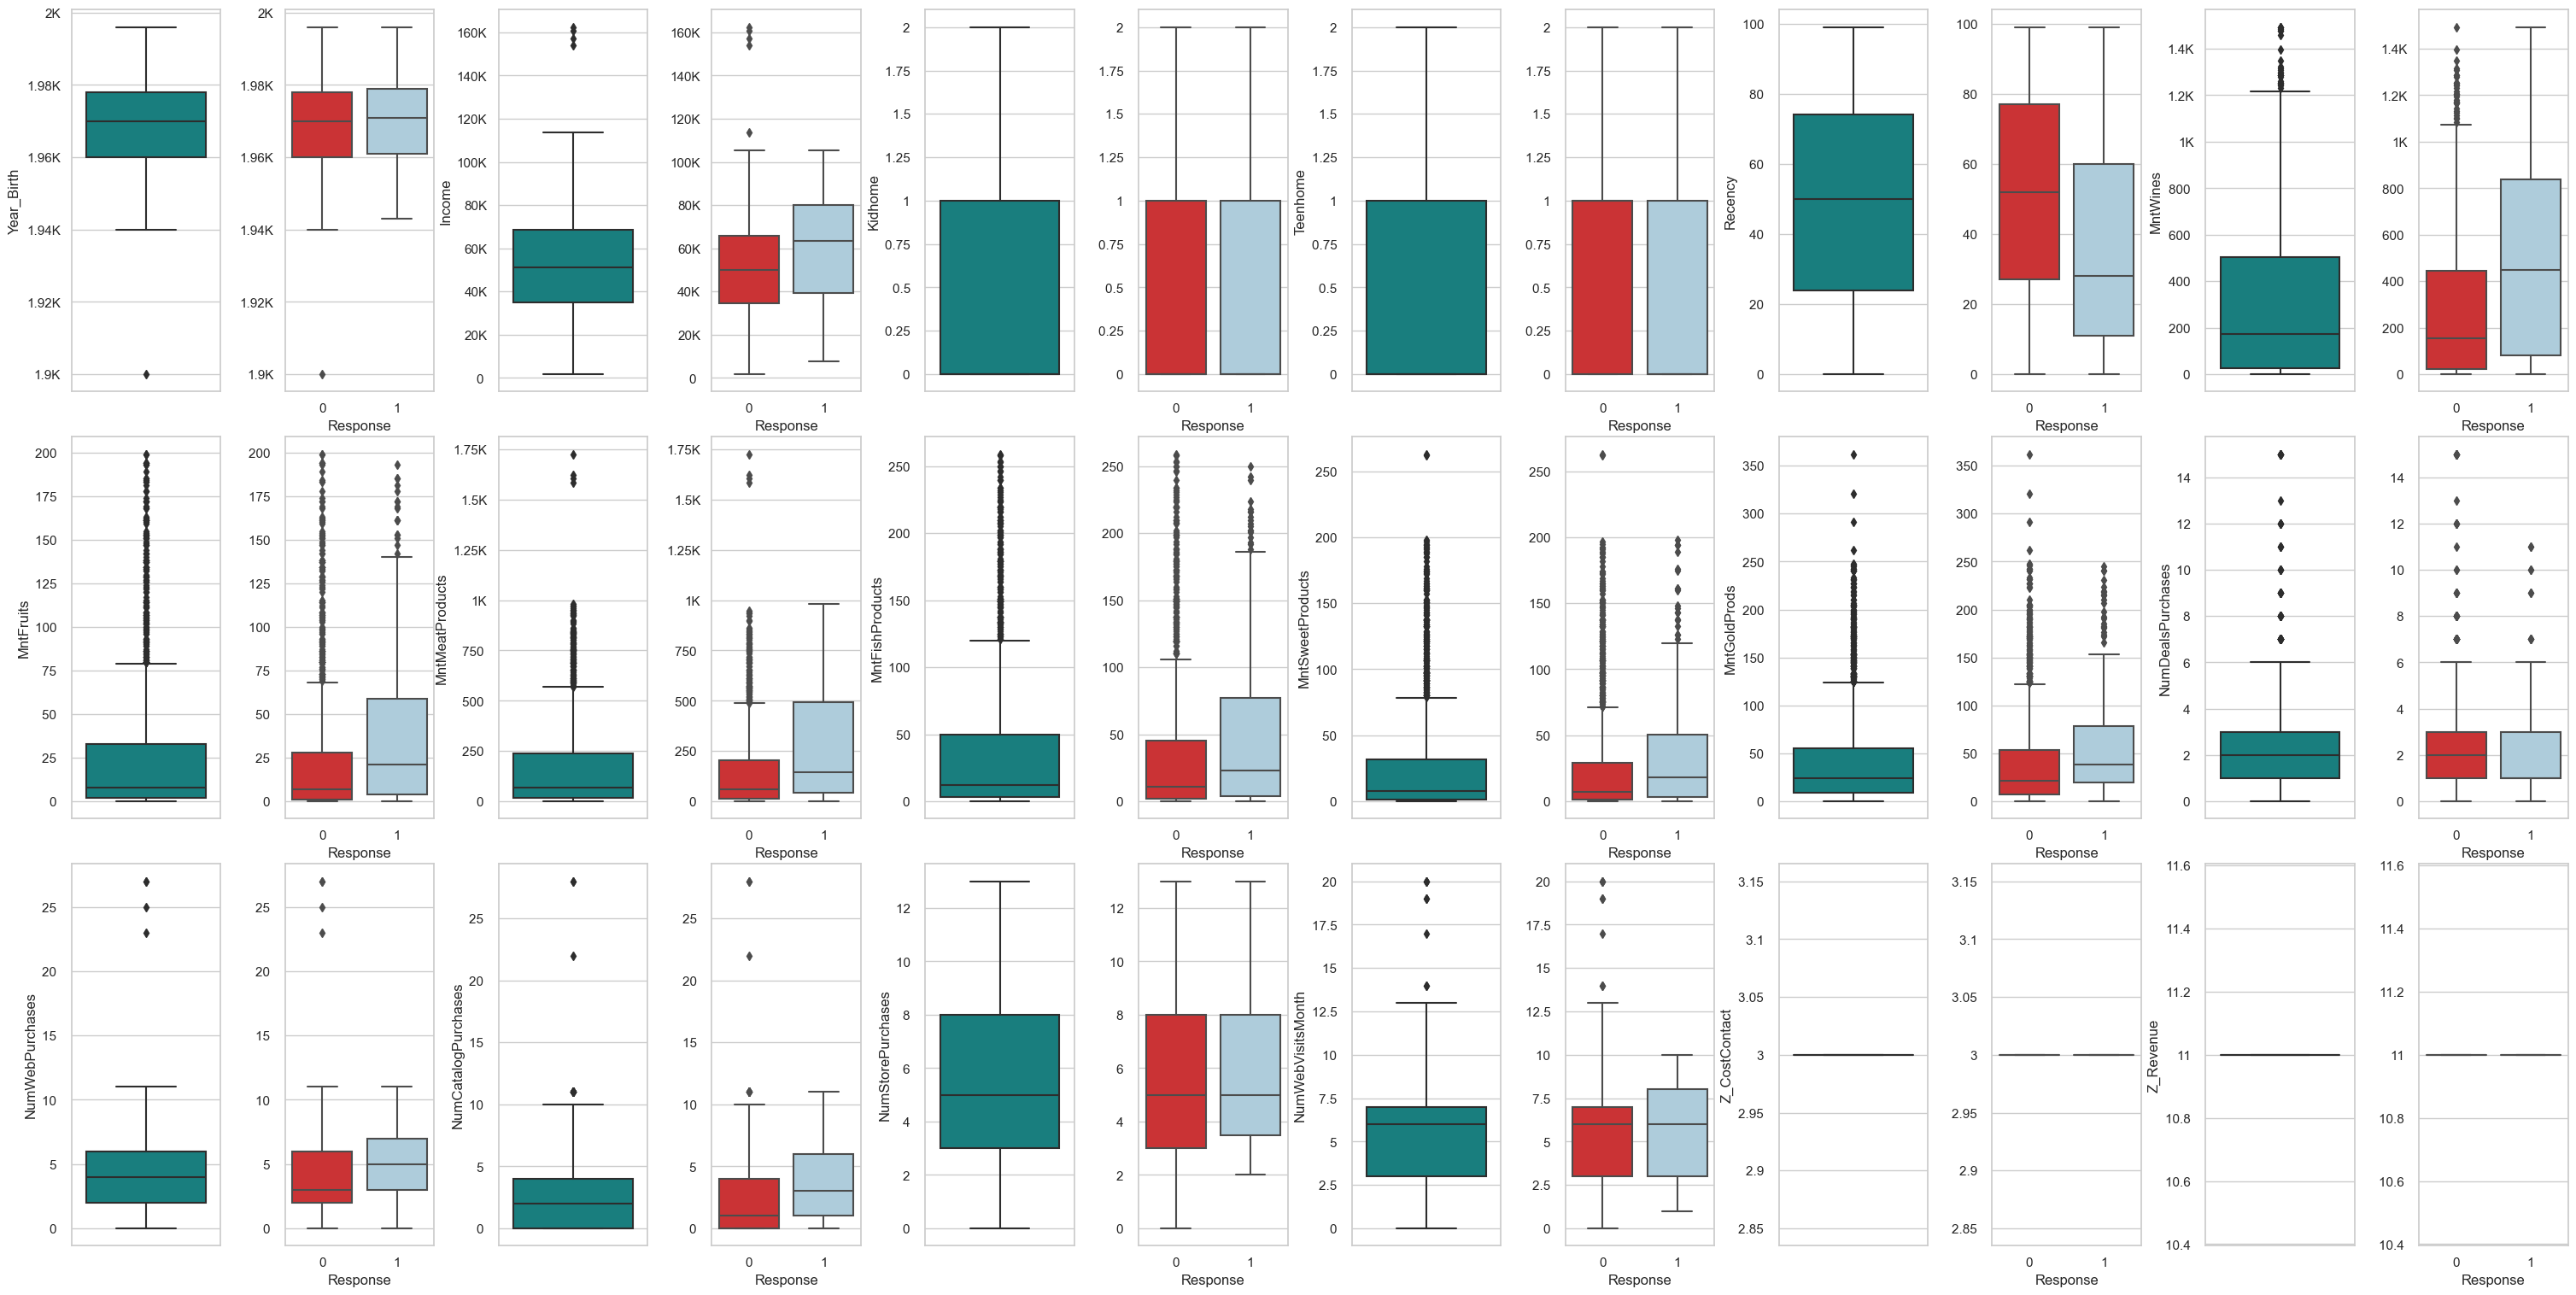

In [41]:
from math import log10, floor
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

plt.figure(figsize=(30, 15))
n = 3
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(num_cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+1)
    sns.boxplot(y=df_train[num_cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df_train["Response"], y=df_train[num_cols[j]], orient='v', palette=colors)
    
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

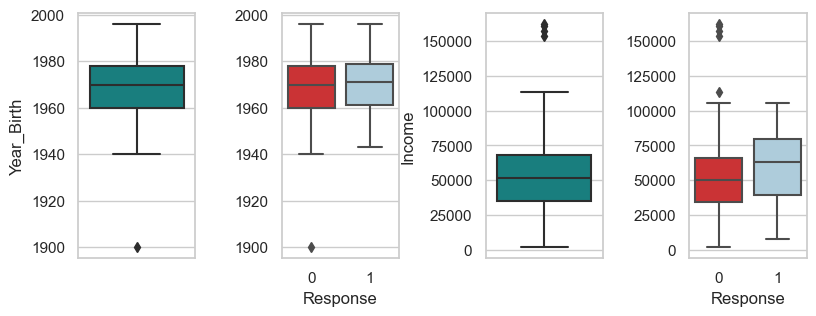

In [42]:
cols = ["Year_Birth","Income"]

plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
    sns.boxplot(y=df_train[cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df_train["Response"], y=df_train[cols[j]], orient='v', palette=colors)
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

In [43]:
df_train[["Year_Birth", "Income"]].describe()

Year_Birth    Income
count        1680      1680
mean     1969.161 51727.447
std        11.796 21473.355
min          1900      1730
25%          1960     34916
50%          1970 51268.500
75%          1978 68379.500
max          1996    162397

Karena pada kolom `Year_Birth` memiliki nilai min yang sangat jauh di tahun `1893-1900`

dan `Income` memiliki nilai max yang sangat tinggi sebesar `$666.666`

Maka akan dilakukan Penghapusan rows pada nilai ini agar tidak ada ketimpangan nilai. Ada beberapa metode yang dapat kita lakukan :
- **Handling Oulier**
    - IQR (Interquartile Range)
    - Z-Score
- **Manually Trimmed**

**Choice Determination:**

- Untuk kasus saat ini, akan digunakan metode `Manually Trimmed`, agar menghindari penghapusan data yang terlalu banyak jika menggunakan Handling Outlier
- Adapaun pada kolom lainnya `selain Year_Birth dan Income` yang terdapat outlier tidak kita handle karena akan melalui proses `Normal Distribution Transformation` nantinya yang akan `mereduksi outliernya.`

### **IQR (Interquartile Range)**

IQR to be more robust since outliers are not included in the calculation of percentiles.

In [44]:
# def handling_outliers_iqr(data, cols):
#     q1 = data[cols].quantile(q=0.25)
#     q3 = data[cols].quantile(q=0.75)
#     iqr = q3-q1
#     fence_low  = q1 - 1.5*iqr
#     fence_high = q3 + 1.5*iqr
    
#     lower_outlier = data[data[cols] < fence_low]
#     upper_outlier = data[data[cols] > fence_high]
    
#     filter_outliers = (data[cols] >= fence_low) & (data[cols] <= fence_high)
#     filtered = data[filter_outliers]
#     return filtered

# cols = ["Year_Birth","Income"]
# print("Jumlah data sebelum handling outliers :", df_train.shape[0])

# for i in cols:
#     df_train = handling_outliers_iqr(df_train, i)
#     print("Jumlah data setelah handling outliers ({}) : {}".format(i, df_train.shape[0]))

### **Z-Score**

Z-score is highly dependent on normality. If your data is non-normal (bimodal, extreme outlier, etc) then z-score will give poor results since the outliers are included in the mean and standard deviation calculations.

In [45]:
# from scipy import stats
# def handling_outliers_zscore(data, cols):
#     thres = 3
#     mean = np.mean(df_train[cols])
#     std = np.std(df_train[cols])
#     zscore = abs((df_train[cols]-mean)/std)
#     # zscore = abs(stats.zscore(data[cols]))
    
#     outlier = data[zscore >= thres]
    
#     filter_outliers = zscore < thres # negative value none, bcs absolute
#     filtered = data[filter_outliers]
#     return filtered

# cols = ["Year_Birth","Income"]
# print("Jumlah data sebelum handling outliers :", df_train.shape[0])

# for i in cols:
#     df_train = handling_outliers_zscore(df_train, i) 
#     print("Jumlah data setelah handling outliers ({}) : {}".format(i, df_train.shape[0]))

### **Manually Trimmed**

- Kolom `Year_Birth`, menghapus nilai yang sangat jauh di tahun `1893-1900`
- Kolom `Income` menghapus nilai yang sangat tinggi sebesar `$666.666`

In [46]:
print("Jumlah data sebelum handling outliers :", df_train.shape[0])

df_train = df_train[~(df_train["Year_Birth"] <= 1900)]
print("Jumlah data setelah handling outliers (Year_Birth) : {}".format(df_train.shape[0]))

df_train = df_train[~(df_train["Income"] >= 666666)]
print("Jumlah data setelah handling outliers (Income) : {}".format(df_train.shape[0]))

Jumlah data sebelum handling outliers : 1680
Jumlah data setelah handling outliers (Year_Birth) : 1679
Jumlah data setelah handling outliers (Income) : 1679


In [47]:
df_train[["Year_Birth", "Income"]].describe()

Year_Birth    Income
count        1679      1679
mean     1969.202 51736.433
std        11.678 21476.592
min          1940      1730
25%          1960     34916
50%          1970     51287
75%          1978     68407
max          1996    162397

**Mengecek hasil Trimmed / Drop Outliers**

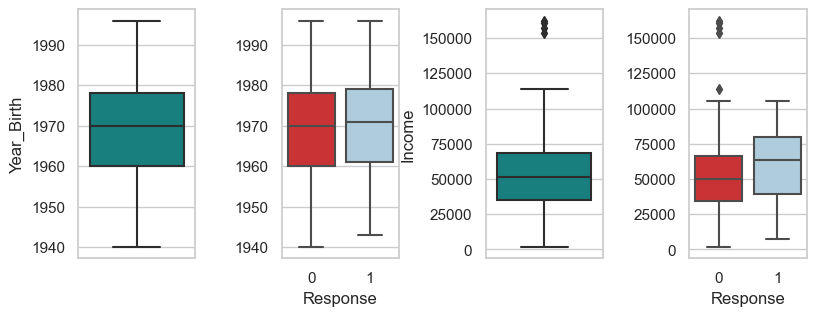

In [48]:
plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
    sns.boxplot(y=df_train[cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df_train["Response"], y=df_train[cols[j]], orient='v', palette=colors)
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

In [49]:
df.reset_index(drop=True, inplace=True)

### **Kesimpulan**
Berdasarkan hasil perhitungan menggunakan `Z-score` dan juga `IQR`, dapat diketahui bahwa jumlah baris yang dihapus dari `Year_Birth` dan `Income` berdasarkan `IQR` untuk kolom  tidak jauh berbeda dibandingkan dengan `Z-score`, yaitu :
- IQR :
    - Jumlah data sebelum handling outliers : 1680
    - Jumlah data setelah handling outliers (Year_Birth) : 1679
    - Jumlah data setelah handling outliers (Income) : 1675

- Z_Score :
    - Jumlah data sebelum handling outliers : 1680
    - Jumlah data setelah handling outliers (Year_Birth) : 1679
    - Jumlah data setelah handling outliers (Income) : 1675

Namun, karena kita ingin meminimalisasi penghapusan data maka untuk proses ini kita memiliki `Manually Trimmed` agar tidak terlalu banyak data yang dihapus, jadi hanya berfokus pada data yang memiliki jauh yang sangat tinggi

- Jumlah data sebelum handling outliers : 1680
- Jumlah data setelah handling outliers (Year_Birth) : 1679
- Jumlah data setelah handling outliers (Income) : 1679

## **📌 Feature Engineering / Extraction**

Kita akan melakukan Calculation, Extraction, dan Binning features :
- Age Customer
- Age Group
- Has Child
- Dependents
- Month Customer (Lifetime)
- Spending
- Primer and Tersier product
- Total of Purchases
- Total_Cmp (Accepted Campaign 1-5)
- Ever_Accept (Accepted Campaign 1-5)
- Total Revenue
- Income Segment
- Conversion Rate Web
- Month Joined
- Recency Segment

**Merge Datasets (Train & Test)**

Untuk memudahkan proses Feature Engineering akan dilakukan penggabungan data_train dan data_test menjadi satu dataframe, karena proses ini tidak ada yang berpotensi menyebabkan data leak

In [50]:
df_tr = df_train.copy()
df_tr["dtype"] = "train"

df_te = df_test.copy()
df_te["dtype"] = "test"

df_all = pd.concat([df_tr, df_te]).reset_index(drop=True)
df_all.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0   387        1976       Basic        Married    7500        0         0   
1  3537        1981  Graduation        Married   31089        1         0   
2  3075        1972         PhD        Married   59973        0         0   
3  4220        1970         PhD        Married   59892        0         1   
4  4472        1970         PhD       Divorced   35682        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13       59         6         16               11               11   
1  2012-08-17       57        31          3               31                2   
2  2013-09-11       47       130         30              168               20   
3  2013-11-02       26        73          0               13                0   
4  2014-06-27       34        23          0                8                6   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                 1            16                  1                2   
1                 8             4                  3                3   
2                34             0                  1                3   
3                 1             0                  1                2   
4                 2            18                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    0                  3                  8             0   
1                    0                  4                  8             0   
2                    4                  7                  1             0   
3                    1                  3                  3             0   
4                    1                  3                  2             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  dtype  
0              3         11         0  train  
1              3         11         0  train  
2              3         11         0  train  
3              3         11         0  train  
4              3         11         0  train

**Membuat Kolom `Umur / Age`**

Berdasarkan data diketahui basis tahunnya : SAS Institute, 2014

In [51]:
# currentYear = datetime.now().year
currentYear = 2014 # based on data
df_all['Age'] = currentYear - df_all['Year_Birth']

**Membuat Kolom `Age Group`** 

[source age group](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.semanticscholar.org%2Fpaper%2FHuman-Age-Group-Classification-Using-Facial-Bhat-V.K.Patil%2F19ddb412336ce633c1fe21544605c7bd65ff8d66&psig=AOvVaw3Sm17zYYJRrkisQVRyg4rf&ust=1684919686463000&source=images&cd=vfe&ved=0CBMQjhxqFwoTCJDXlY2Ni_8CFQAAAAAdAAAAABAI)

<img src="https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/assets/54845293/b24b4884-4d41-47d8-a4ed-24564f89aff8"  width="300" height="10">

Akan disederhanakan lagi :
- Young Adult < 30
- Adult 30-45 Tahun
- Senior Adult > 45 tahun

In [52]:
def age_group(x):
    if x > 45:
        grup = 'Senior Adult'
    elif x > 30:
        grup = 'Adult'
    else:
        grup = 'Young Adult'
    
    return grup

df_all['Age_group'] = df_all["Age"].apply(lambda x: age_group(x))

**Membuat Kolom `Has_child`**

Menggabungkan Kidhome dan Teenhome menjadi feature Has_child, yang mana hasil penjumlahannya yang memiliki anak minimal 1

In [53]:
df_all['Has_child'] = np.where(df_all["Kidhome"]+df_all["Teenhome"] > 0, 1, 0)

**Membuat Kolom `Dependents`**

Jumlah tanggungan dari customer, dari penjumlahan Kidhome dan Teenhome

In [54]:
df_all['Dependents'] = df_all['Kidhome'] + df_all['Teenhome']

**Membuat Kolom `Lifetime`**

Sudah berapa bulan customer sejak pembelian pertama di supermarket

In [55]:
df_all['Lifetime'] = (2014 - df_all["Dt_Customer"].dt.year)*12 + df_all["Dt_Customer"].dt.month

**Membuat Kolom `Spending`**

Jumlah pembelian tiap customer pada keseluruhan product

In [56]:
df_all['Spending']=df_all['MntWines']+ \
    df_all['MntFruits']+ \
    df_all['MntMeatProducts']+ \
    df_all['MntFishProducts']+ \
    df_all['MntSweetProducts']+ \
    df_all['MntGoldProds']

**Membuat Kolom `Primer and Tersier product`**

Jumlah pembelian tiap customer pada kelompok primer dan tersier product

In [57]:
# primer and tersier product
df_all['Primer_purchase'] = df_all['MntFruits']+df_all['MntMeatProducts']+df_all['MntFishProducts']
df_all['Tersier_purchase'] = df_all['MntWines']+df_all['MntSweetProducts']+df_all["MntGoldProds"]

**Membuat Kolom `Total of Purchases`**

In [58]:
df_all['Total_Purchases'] = df_all['NumDealsPurchases'] + \
    df_all['NumWebPurchases'] + \
    df_all['NumCatalogPurchases'] + \
    df_all['NumStorePurchases']

**Membuat Kolom `Total_Cmp`**

Berapa kali tiap customer merespon ke 5 campign yang dilaksanakan (AcceptedCmp 1 - 5)

In [59]:
df_all['Total_Cmp']=df_all['AcceptedCmp1'].astype("int64")+ \
    df_all['AcceptedCmp2'].astype("int64")+ \
    df_all['AcceptedCmp3'].astype("int64")+ \
    df_all['AcceptedCmp4'].astype("int64")+ \
    df_all['AcceptedCmp5'].astype("int64")

**Membuat Kolom `Ever_Accept`**

Apakah Customer pernah minimal sekali menerima campign atau tidak pernah sama sekali

In [60]:
df_all['Ever_Accept']=df_all['Total_Cmp'].apply(lambda x : 1 if x >= 1 else 0)

**Membuat Kolom `Total Revenue`**

Jumlah Campaign yang diresponse/accept (Campaign 1-5) dikali dengan revenue = 11

In [61]:
# total revenue
df_all['Total_revenue'] = (df_all['Total_Cmp']) * df_all['Z_Revenue']
df_all[['Z_Revenue', 'Total_revenue']].sample(5)

Z_Revenue  Total_revenue
580          11              0
1434         11              0
1963         11             11
413          11              0
515          11              0

**Membuat Kolom `Income Segmentation`**

- None -> Missing values
- High -> >= q3(68487)
- Medium -> q1(35331) - q3(68487)
- Low -> < q1(35331)

In [62]:
Q1 = df_all["Income"].quantile(.25)
print(Q1)
Q3 = df_all["Income"].quantile(.75)
print(Q3)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df_all["Income_sgmt"] = df_all["Income"].fillna("None")
df_all["Income_sgmt"] = df_all["Income_sgmt"].apply(lambda x: income_sgmt(x))

35331.0
68487.0


In [63]:
df_all["Income_sgmt"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

**Membuat Kolom `Conversion Rate Web`**

Perbandingan Total Purchases dengan Jumlah Pengunjung Website

In [64]:
df_all['Conversion_rate_web'] = np.round(df_all['Total_Purchases'] / df_all['NumWebVisitsMonth'], 2)
df_all['Conversion_rate_web'].fillna(0, inplace=True)
df_all['Conversion_rate_web'].replace([np.inf, -np.inf], 0, inplace=True)

**Membuat Kolom `Month Joined`**

Membuat kolom extraction month dari tanggal Customer pertama kali berbelanja

Note : Untuk nilai tahun tidak digunakan karena berpotensi bias karena dari nilai nya akan increasing tiap waktu, sedangkan month akan repeat pada tiap periode

In [65]:
df_all['Month_joined'] = df_all['Dt_Customer'].dt.month

**Membuat Kolom `Recency_sgmt`**

In [66]:
np.sort(df_all['Recency'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [67]:
num_score = 5
cek = pd.qcut(df_all['Recency'].unique(), num_score, labels=range(num_score, 0, -1))
cek = pd.DataFrame({
    "value":df_all['Recency'].unique(),
    "score": cek
})

cek.groupby(['score'])[['value']] \
    .agg(['min', 'max']).sort_index(ascending=False) \
    .style.background_gradient(cmap='Reds')

In [68]:
divided = {5: 19, 4: 39, 3: 59, 2: 79}
 
def RScore(x,d):
    if x <= d[5]:
        return 4
    elif x <= d[4]:
        return 3
    elif x <= d[3]: 
        return 2
    elif x <= d[2]: 
        return 1
    else:
        return 0

df_all['Recency_sgmt'] = df_all['Recency'].apply(lambda x: RScore(x, divided))
df_all.groupby(['Recency_sgmt'])[['Recency']].agg(['min', 'max', 'count']).style.background_gradient(cmap='Reds')

Perkiraan pembagian dengan rentang 19 Hari:
- 4 score -> setengah bulan
- 3 score -> 1 bulan
- 2 score -> 1 setengah bulan
- 1 score -> 2 bulan
- 0 score -> 3 bulan

**Mengecek nilai Extraction**

In [69]:
df_all.sample(5)

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
148   1109        1982      Master        Married   27590        1         0   
785   1627        1957      Master       Divorced   77297        0         0   
146   7094        1975  Graduation         Single   58330        0         1   
1144  8017        1981      Master        Married   51111        1         1   
655    821        1992      Master         Single   92859        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
148   2013-04-23       38         6          0                5   
785   2013-01-26       84       408         61              109   
146   2013-12-25       87       445         53              213   
1144  2014-06-19       83        22          0               19   
655   2012-10-19       46       962         61              921   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
148                 0                 0             1                  1   
785                48               122            41                  1   
146               104                98           151                  1   
1144                6                 5             3                  2   
655                52                61            20                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
148                 1                    0                  2   
785                 5                    7                  9   
146                 6                    4                 13   
1144                2                    0                  3   
655                 5                    4                 12   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
148                   7             0             0             0   
785                   4             0             0             0   
146                   4             0             0             0   
1144                  6             0             0             0   
655                   2             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
148              0             0         0              3         11   
785              1             0         0              3         11   
146              0             0         0              3         11   
1144             0             0         0              3         11   
655              0             0         0              3         11   

      Response  dtype  Age     Age_group  Has_child  Dependents  Lifetime  \
148          0  train   32         Adult          1           1        16   
785          0  train   57  Senior Adult          0           0        13   
146          0  train   39         Adult          1           1        24   
1144         0  train   33         Adult          1           2         6   
655          0  train   22   Young Adult          0           0        34   

      Spending  Primer_purchase  Tersier_purchase  Total_Purchases  Total_Cmp  \
148         12                5                 7                4          0   
785        789              218               571               22          1   
146       1064              370               694               24          0   
1144        55               25                30                7          0   
655       2077             1034              1043               22          0   

      Ever_Accept  Total_revenue Income_sgmt  Conversion_rate_web  \
148             0              0         Low                0.570   
785             1             11        High                5.500   
146             0              0      Medium                    6   
1144            0              0      Medium                1.170   
655             0              0        High                   11   

      Month_joined  Recency_sgmt  
148              4          

**Categorical (String)**

- Education - Basic, Graduation, Master, PhD
- Marital_Status - Single, Married, Divorced
- Age_group - Young Adult, Adult, Senior Adult
- Income_sgmt - High, Medium, Low

**Categorical (Int)**

- ID
- Kidhome - 0, 1, 2
- Teenhome - 0, 1, 2
- AcceptedCmp1 - 0, 1
- AcceptedCmp2 - 0, 1
- AcceptedCmp3 - 0, 1
- AcceptedCmp4 - 0, 1
- AcceptedCmp5 - 0, 1
- Ever_Accept - 0, 1
- Complain - 0, 1
- Response - 0, 1
- Has_child - 0, 1
- Recency_sgmt - 0, 1, 2, 3, 4

**Numericals**

- Year_Birth = 1940 - 1996
- Income = 1730.0 - 162397.0
- Kidhome = 0 - 2
- Teenhome = 0 - 2
- Recency = 0 - 99
- Age = 18 - 74
- Dependents = 0 - 3
- Lifetime = 1 - 36
- Spending = 5 - 2525
- Primer_purchase = 1 - 1727
- Tersier_purchase = 3 - 1689
- Total_Purchases = 0 - 44
- NumWebVisitsMonth = 0 - 20
- Conversion_rate_web = 0.0 - 43.0
- Total_Cmp = 0 - 4
- Total_revenue = 0 - 44
- Month_joined = 1 - 12

**Numericals (one)**

- Z_CostContact = 3
- Z_Revenue = 11

**Numericals (Product)**

- MntWines = 0 - 1493
- MntFruits = 0 - 199
- MntMeatProducts = 0 - 1725
- MntFishProducts = 0 - 259
- MntSweetProducts = 0 - 263
- MntGoldProds = 0 - 362

**Numericals (Purchases)**

- NumDealsPurchases = 0 - 15
- NumWebPurchases = 0 - 27
- NumCatalogPurchases = 0 - 28
- NumStorePurchases = 0 - 13

**Timestamp**
- Dt_Customer = 2012-07-30 - 2014-06-29

In [70]:
cat_str = ['Education', 'Marital_Status', 'Age_group', 'Income_sgmt']
cat_int = ['ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
           'Ever_Accept', 'Complain', 'Response', 'Has_child', 'Recency_sgmt']

num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'Dependents', 'Lifetime', 'Spending', 
       'Primer_purchase', 'Tersier_purchase', 'Total_Purchases', 'NumWebVisitsMonth', 'Conversion_rate_web', 
       'Total_Cmp', 'Total_revenue', 'Month_joined']

num_one = ['Z_CostContact', 'Z_Revenue']

num_product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

timestamp = ["Dt_Customer"]

Mengecek Kolom di pembagian type

In [71]:
allcol = cat_str + cat_int + num + num_one + num_product + num_purchases + timestamp
for i in df_all:
    if i not in allcol:
        print(i)

dtype


In [72]:
#cek unique value
cat_cols = cat_str+cat_int
for x in cat_cols: 
    unq = list(df_all[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

num_cols = num + num_one + num_product + num_purchases
for x in num_cols + timestamp: 
    print("{} = {} - {}".format(x, min(df_all[x]), max(df_all[x])))

===== Education =====
['Basic', 'Graduation', 'PhD', 'Master']

===== Marital_Status =====
['Married', 'Divorced', 'Single']

===== Age_group =====
['Adult', 'Senior Adult', 'Young Adult']

===== Income_sgmt =====
['Low', 'Medium', 'High']

===== ID =====
[387, 3537, 3075, 4220, 4472, 4073, 503, 2426, 1764, 8275, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== AcceptedCmp1 =====
[0, 1]

===== AcceptedCmp2 =====
[0, 1]

===== AcceptedCmp3 =====
[0, 1]

===== AcceptedCmp4 =====
[0, 1]

===== AcceptedCmp5 =====
[0, 1]

===== Ever_Accept =====
[0, 1]

===== Complain =====
[0, 1]

===== Response =====
[0, 1]

===== Has_child =====
[0, 1]

===== Recency_sgmt =====
[2, 3, 4, 0, 1]

Year_Birth = 1893 - 1996
Income = 1730.0 - 666666.0
Kidhome = 0 - 2
Teenhome = 0 - 2
Recency = 0 - 99
Age = 18 - 121
Dependents = 0 - 3
Lifetime = 1 - 36
Spending = 5 - 2525
Primer_purchase = 1 - 1727
Tersier_purchase = 3 - 1689
Total_Purchases = 0 - 44
NumWebVisitsMonth = 0 - 20
Conv

In [73]:
new_cols = list(df_all.columns.values)
new_cols.remove("Response")
new_cols.append("Response")
df_all = df_all[new_cols].copy()

In [74]:
df_all.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'dtype',
       'Age', 'Age_group', 'Has_child', 'Dependents', 'Lifetime', 'Spending',
       'Primer_purchase', 'Tersier_purchase', 'Total_Purchases', 'Total_Cmp',
       'Ever_Accept', 'Total_revenue', 'Income_sgmt', 'Conversion_rate_web',
       'Month_joined', 'Recency_sgmt', 'Response'],
      dtype='object')

**Splitting Datasets (Train & Test)**

In [75]:
df_train = df_all[df_all["dtype"] == "train"].copy()
df_train.drop("dtype", axis=1, inplace=True)
df_train.reset_index(drop=True, inplace=True)

df_test = df_all[df_all["dtype"] == "test"].copy()
df_test.drop("dtype", axis=1, inplace=True)
df_test.reset_index(drop=True, inplace=True)

## **📌 Feature Transformation (Numeric)**

Mengecek Skewness di tiap kolom untuk menentukan jenis Transformation

In [76]:
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df_train[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial and Uniform

dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist = dist.sort_values(["Type of Distribution","Column Name"]).reset_index(drop=True)
dist

Column Name  Skewness  Kurtosis  \
0               Kidhome     0.624    -0.794   
1              Teenhome     0.442    -0.918   
2   Conversion_rate_web     2.359     6.967   
3       MntFishProducts     1.921     3.072   
4             MntFruits     2.135     4.236   
5          MntGoldProds     1.925     3.755   
6       MntMeatProducts     2.079     5.503   
7      MntSweetProducts     2.184     4.713   
8              MntWines     1.179     0.632   
9   NumCatalogPurchases     1.891     8.297   
10    NumDealsPurchases     2.528     9.902   
11      NumWebPurchases     1.549     6.927   
12      Primer_purchase     1.589     2.209   
13            Total_Cmp     2.733     8.033   
14        Total_revenue     2.733     8.033   
15           Dependents     0.425    -0.251   
16               Income     0.264     0.381   
17    NumWebVisitsMonth     0.351     2.385   
18      Total_Purchases     0.263    -0.837   
19    NumStorePurchases     0.697    -0.609   
20             Spending     0.839    -0.402   
21     Tersier_purchase     0.966     0.039   
22                  Age     0.116    -0.749   
23             Lifetime     0.038    -1.038   
24         Month_joined    -0.026    -1.282   
25              Recency    -0.004    -1.206   
26           Year_Birth    -0.116    -0.749   
27        Z_CostContact       NaN       NaN   
28            Z_Revenue       NaN       NaN   

                          Type of Distribution  
0                         Bimodal Distribution  
1                         Bimodal Distribution  
2                     Highly Positively Skewed  
3                     Highly Positively Skewed  
4                     Highly Positively Skewed  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8                     Highly Positively Skewed  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11                    Highly Positively Skewed  
12                    Highly Positively Skewed  
13                    Highly Positively Skewed  
14                    Highly Positively Skewed  
15  Moderately Normal Distribution (Symmetric)  
16  Moderately Normal Distribution (Symmetric)  
17  Moderately Normal Distribution (Symmetric)  
18  Moderately Normal Distribution (Symmetric)  
19                Moderately Positively Skewed  
20                Moderately Positively Skewed  
21                Moderately Positively Skewed  
22             Normal Distribution (Symmetric)  
23             Normal Distribution (Symmetric)  
24             Normal Distribution (Symmetric)  
25             Normal Distribution (Symmetric)  
26             Normal Distribution (Symmetric)  
27                        Uniform Distribution  
28                        Uniform Distribution

In [77]:
exclude = ["Kidhome", "Teenhome", "Dependents", "Total_Cmp"]

log_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Positively Skewed") & 
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

norm_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Normal Distribution") & 
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

print("Log Transformation =", log_cols)
print("Normalisasi/Standardization =", norm_cols)

Log Transformation = ['Conversion_rate_web', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'Primer_purchase', 'Spending', 'Tersier_purchase', 'Total_revenue']
Normalisasi/Standardization = ['Age', 'Income', 'Lifetime', 'Month_joined', 'NumWebVisitsMonth', 'Recency', 'Total_Purchases', 'Year_Birth']


Dari hasil temuan, kita dapat menentukan beberapa transformasi yang akan kita lakukan :
- **Scaling and Converting to a Normal Distribution :**
    - log Transformation
    - Box-Cox Transformation
    - Yeo-Johnson Transformation
    
    **Adapun daftar column yang dapat kita transform pada proses ini :**
        - Conversion_rate_web
        - MntFishProducts
        - MntFruits
        - MntGoldProds
        - MntMeatProducts
        - MntSweetProducts
        - MntWines
        - NumCatalogPurchases
        - NumDealsPurchases
        - NumStorePurchases
        - NumWebPurchases
        - Primer_purchase
        - Spending
        - Tersier_purchase
        - Total_revenue
    
- **Just Scaling :**
    - Normalization
    - Standardization
    
    **Adapun daftar column yang dapat kita transform pada proses ini :**
        - Age
        - Income
        - Lifetime
        - Month_joined
        - NumWebVisitsMonth
        - Recency
        - Total_Purchases
        - Year_Birth

- Sedangkan untuk beberapa kolom yang **tidak perlu melakukan Transformasi** karena rentang nilai yang masih wajar sebagai berikut :
    - Kidhome
    - Teenhome
    - Dependents
    - Total_Cmp

**Choice Determination:**

- Pada proses `Feature Transformation / Scaling` ini kita menggunakan `Yeo-Johnson Transformation` pada kolom-kolom yang masih memiliki skala yang besar, karena dari hasilnya kita bisa melihat hasil bentuk curve yang lebih Normal Distribusi. Dan sangat cocok untuk penggunaan Algoritma berbasis tree.

Karena akhirnya dari proses evaluasi model, didapatkan penggunaan transformasi yang hanya menggunakan `Yeo-Johnson Transformation` pada kolom-kolom yang masih memiliki skala yang besar, memberikan hasil yang lumayan akurat maka untuk kolom skew maupun normal akan dilakukan transformasi yang sama.

In [78]:
log_cols = log_cols + norm_cols

Sehingga untuk `Normalization` dan `Standardization` tidak akan digunakan

### **Normalization**

In [79]:
# from sklearn.preprocessing import MinMaxScaler
# # create a scaler object
# scaler = MinMaxScaler()
# # fit and transform the data
# df_train[norm_cols] = pd.DataFrame(scaler.fit_transform(df_train[norm_cols]), columns=df_train[norm_cols].columns)
# df_train[norm_cols].describe()

In [80]:
# df_test[norm_cols] = pd.DataFrame(scaler.transform(df_test[norm_cols]), columns=df_test[norm_cols].columns)
# df_test[norm_cols].describe()

### **Standardization**

In [81]:
# from sklearn.preprocessing import StandardScaler

# # create a scaler object
# std_scaler = StandardScaler()
# std_scaler
# # fit and transform the data
# df_train[norm_cols] = pd.DataFrame(std_scaler.fit_transform(df_train[norm_cols]), columns=df_train[norm_cols].columns)
# df_train[norm_cols].describe()

In [82]:
# df_test[norm_cols] = pd.DataFrame(std_scaler.transform(df_test[norm_cols]), columns=df_test[norm_cols].columns)
# df_test[norm_cols].describe()

### **Log Transformation**

Numerical variables may have high skewed and non-normal distribution (Gaussian Distribution) caused by outliers, highly exponential distributions, etc. Therefore we go for data transformation.

In Log transformation each variable of x will be replaced by log(x) with base 10, base 2, or natural log.

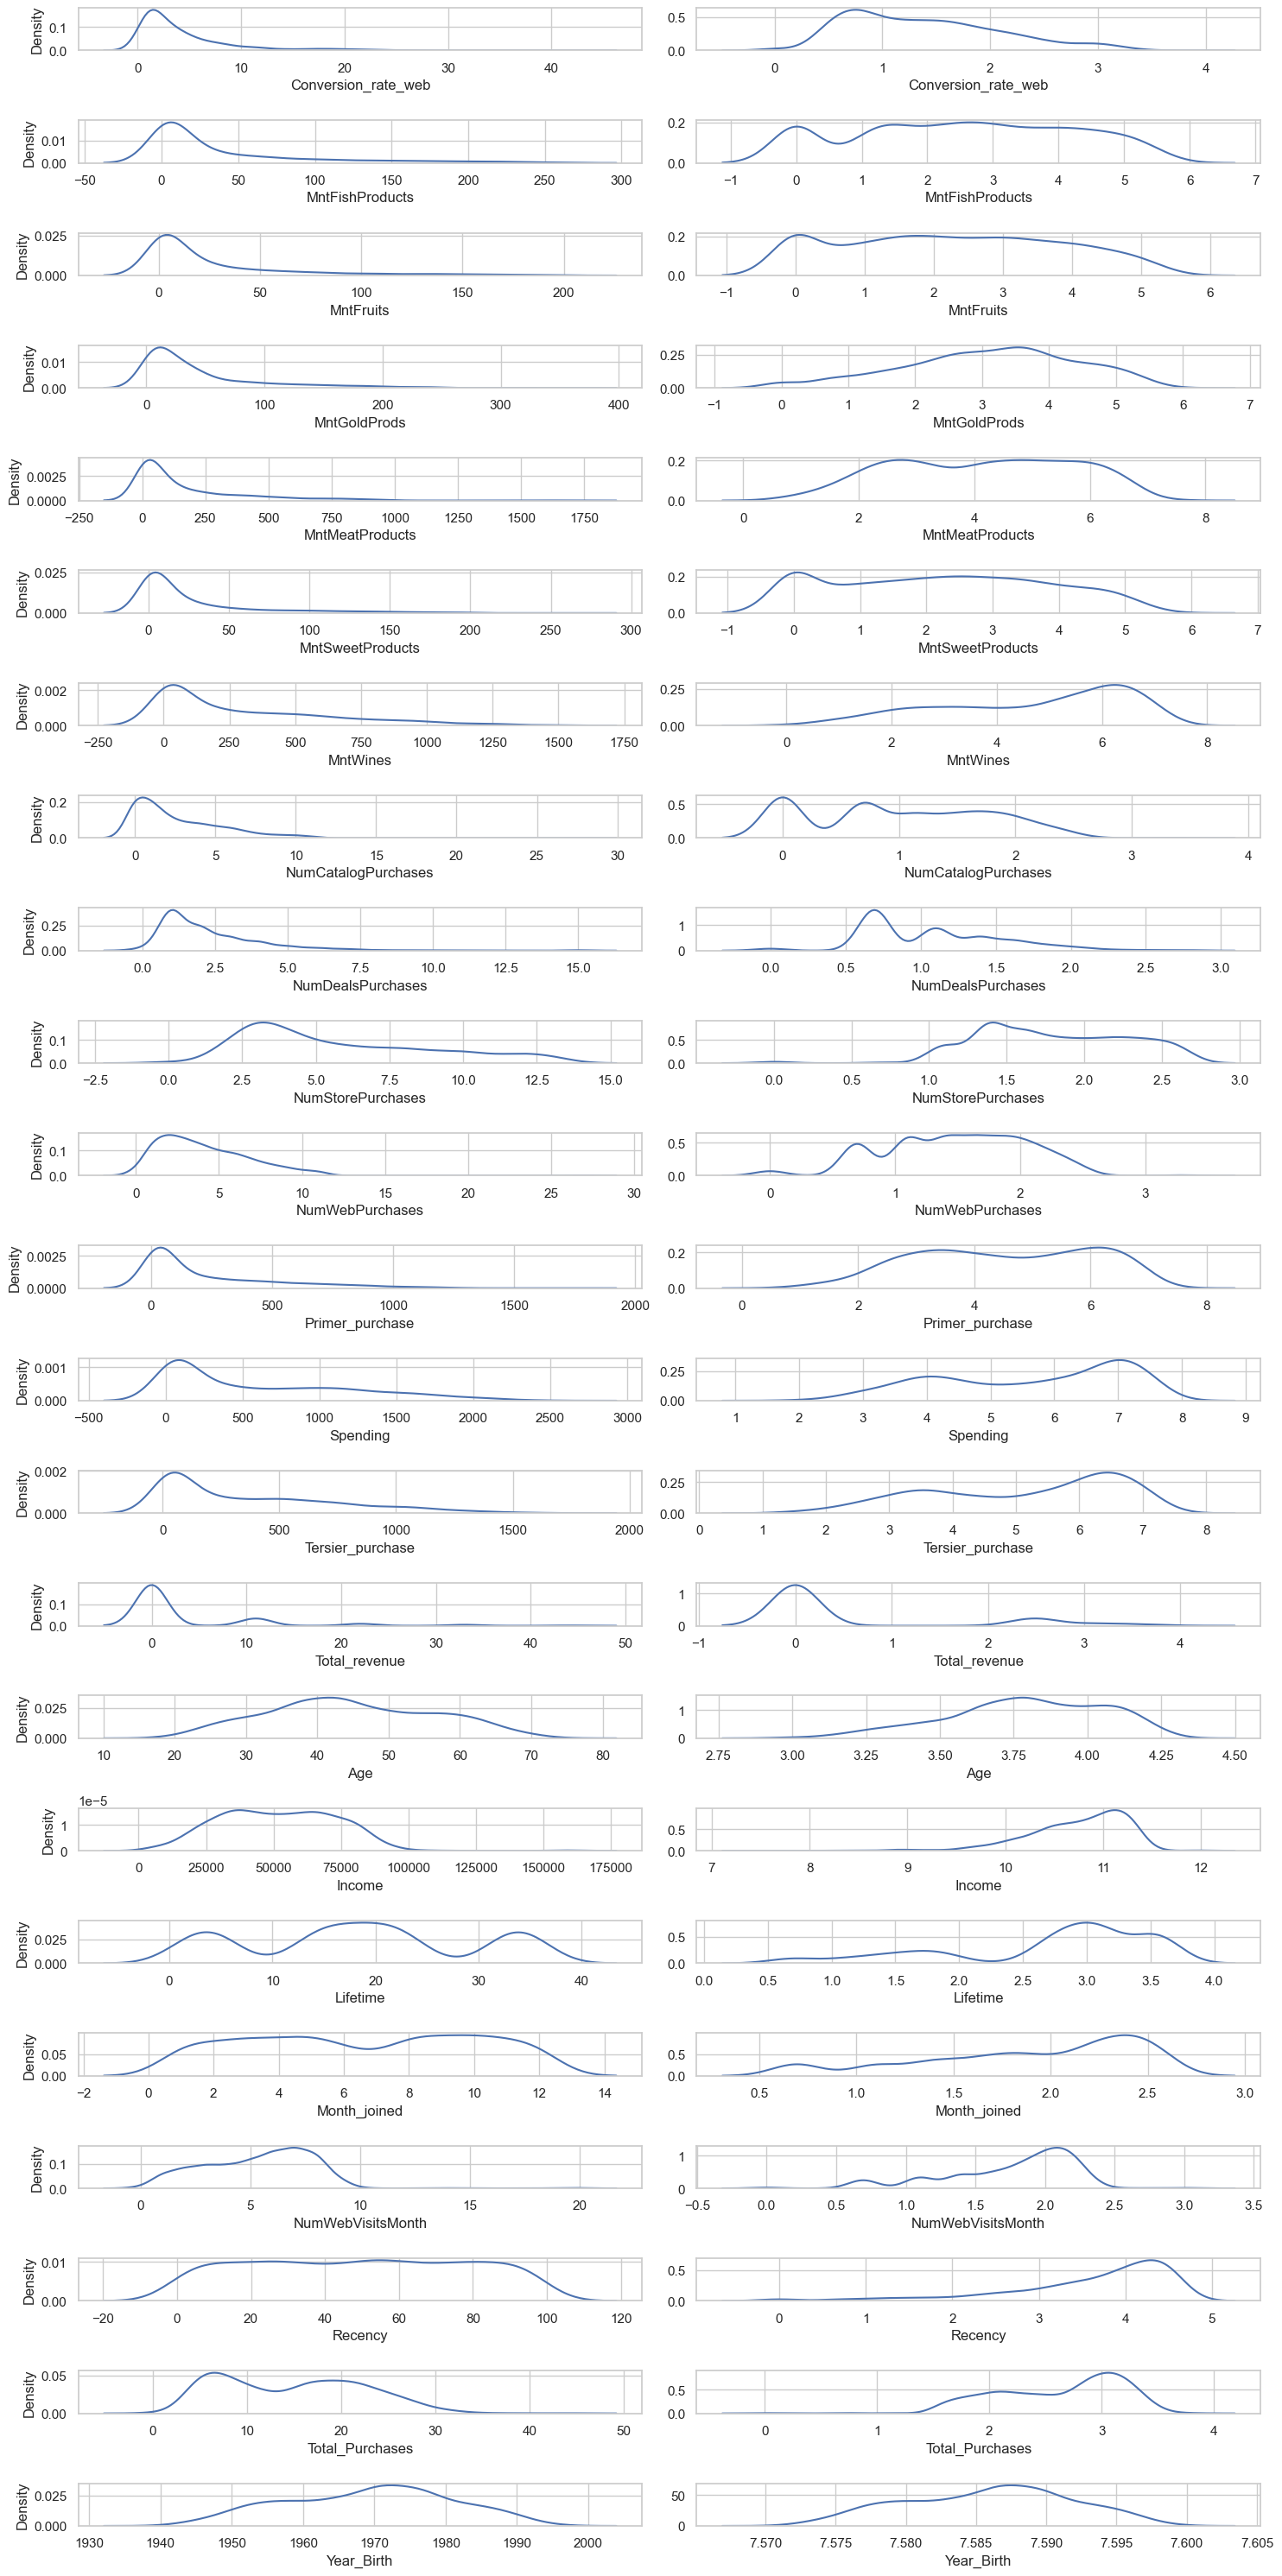

In [83]:
fig, ax = plt.subplots(len(log_cols),2,figsize=(15,30))
for i in range(0,len(log_cols)):
    kde1 = sns.kdeplot(df_train[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(np.log(df_train[log_cols[i]]+1), ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [84]:
# # Train
# # add 1 bcs err : divide by zero encountered in log
# # df[log_cols] = np.log(df[log_cols]+1)
# df_train[log_cols] = np.log1p(df_train[log_cols])
# df_train[log_cols].describe()

In [85]:
# # Test
# df_test[log_cols] = np.log1p(df_test[log_cols])
# df_test[log_cols].describe()

### **Box-Cox Transformation**

Box-cox transformation works pretty well for many data natures. The below image is the mathematical formula for Box-cox transformation.

![image](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/assets/54845293/fae1d9a3-8c7e-486d-aa10-51872c01a177)

All the values of lambda vary from -5 to 5 are considered and the best value for the data is selected. The “Best” value is one that results in the best skewness of the distribution. Log transformation will take place when we have lambda is zero.

- **with Scipy**

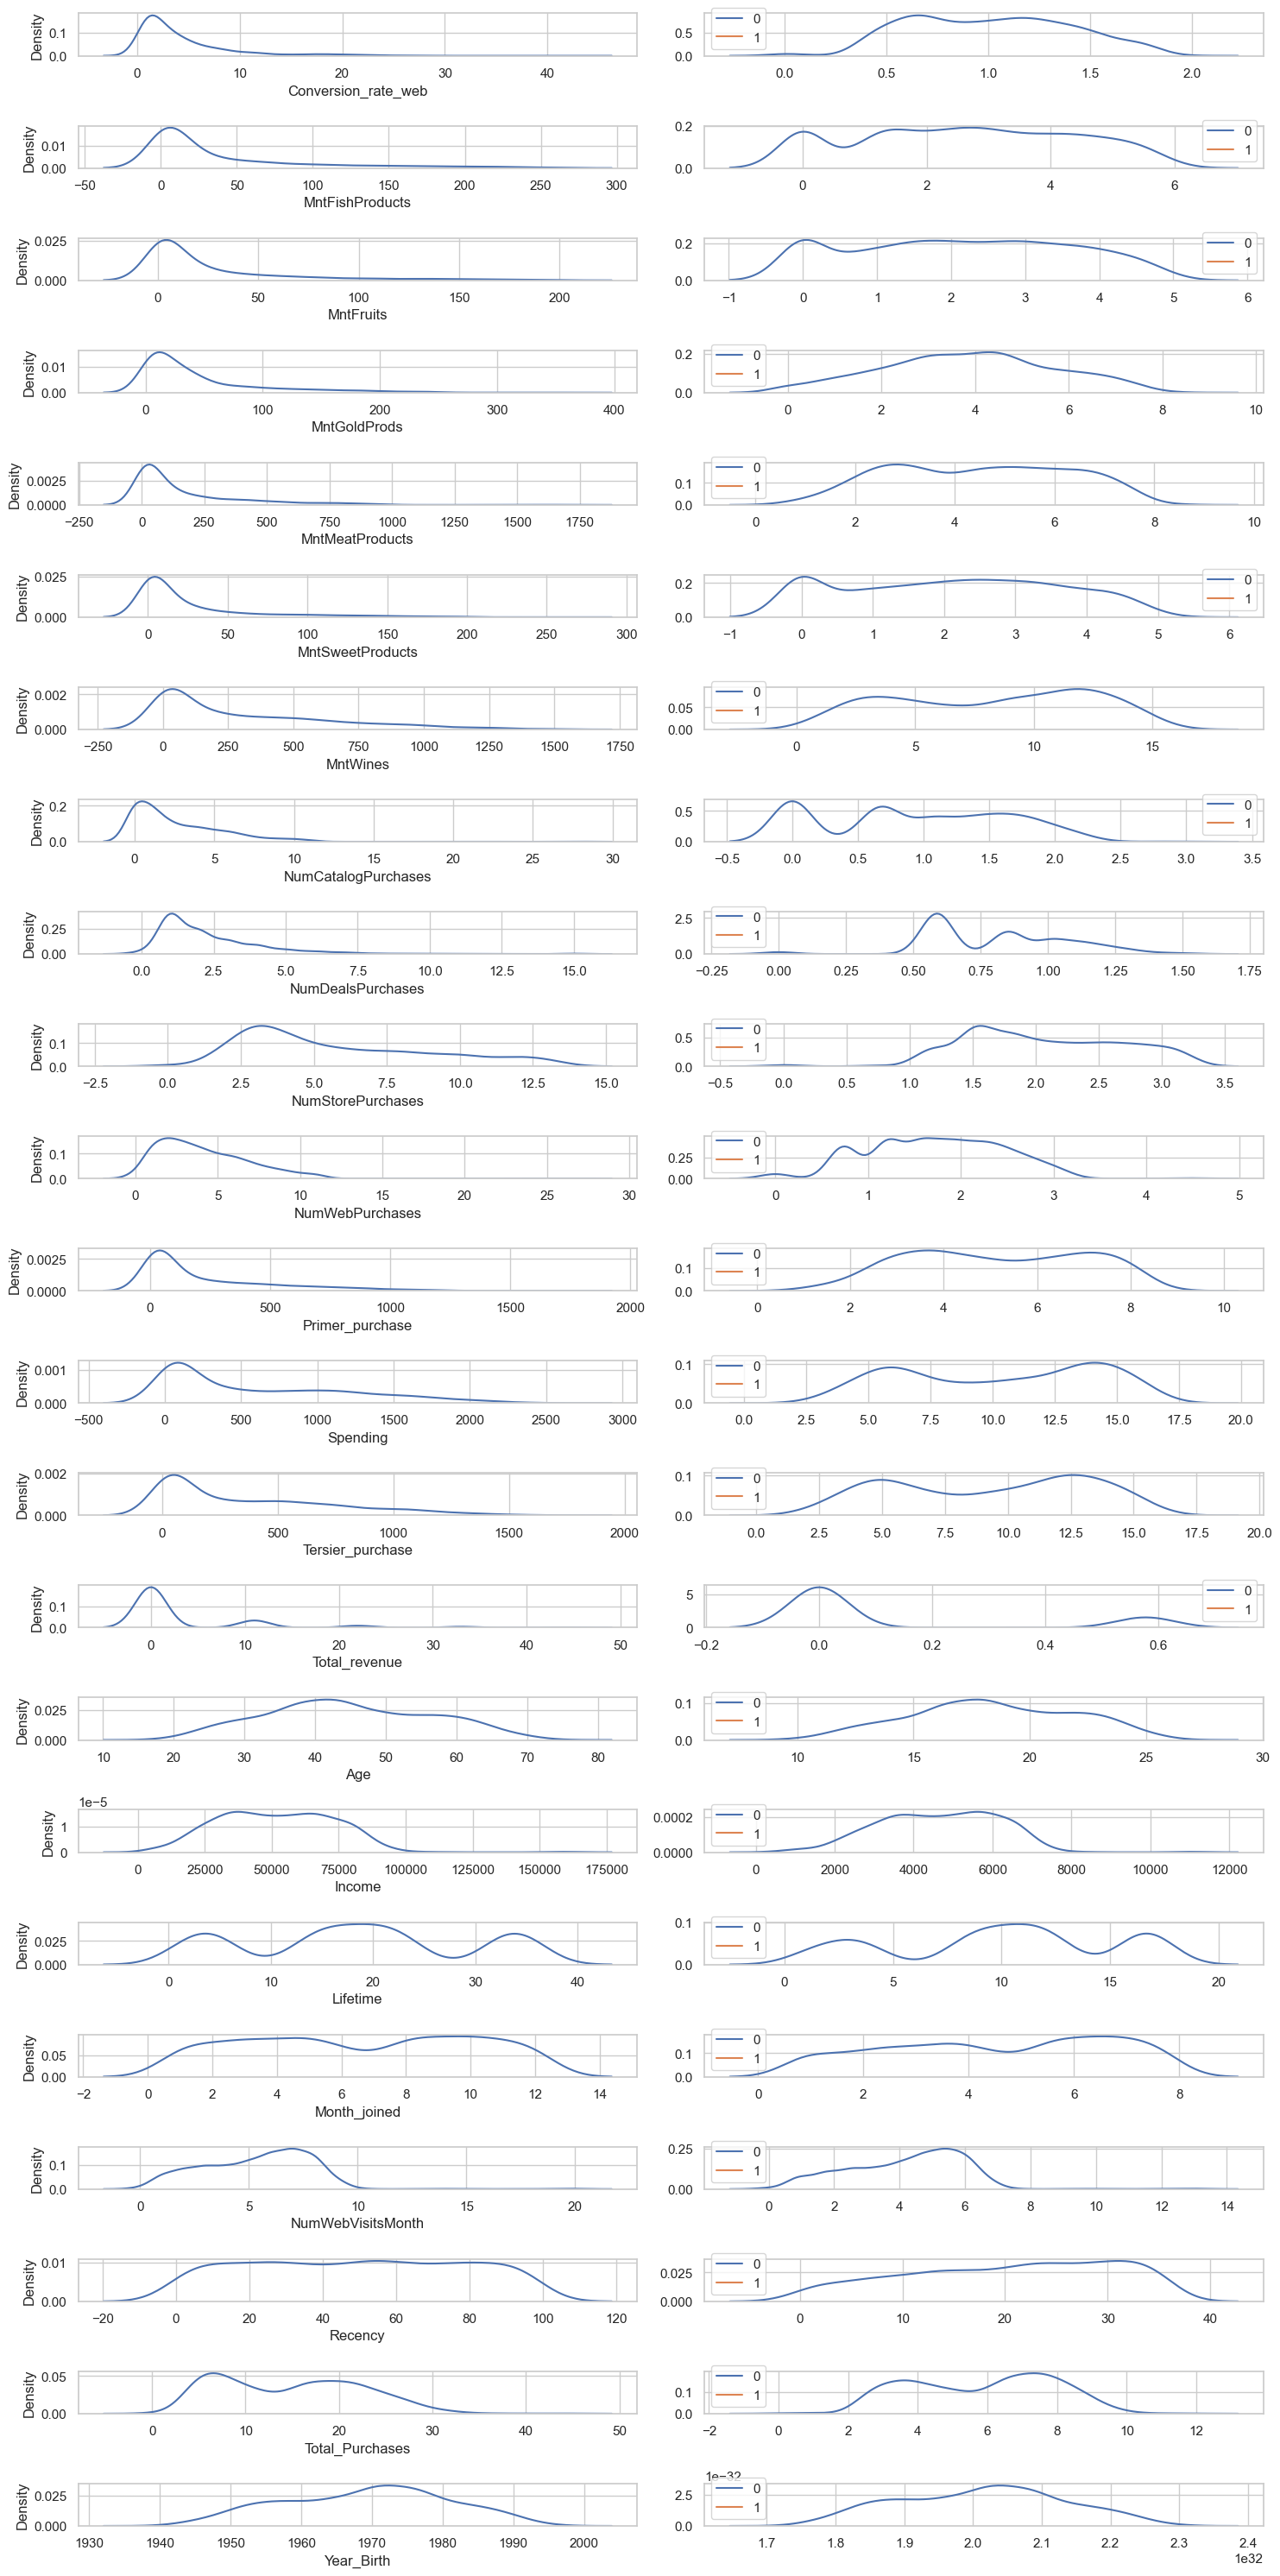

In [86]:
from scipy.stats import boxcox
fig, ax = plt.subplots(len(log_cols),2,figsize=(15,30))
for i in range(0,len(log_cols)):
    kde1 = sns.kdeplot(df_train[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(boxcox(df_train[log_cols[i]]+1), warn_singular=False, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [87]:
# # Train
# for i in log_cols:
#     df_train[i], parameters = boxcox(df_train[i]+1)

# df_train[log_cols].describe()

In [88]:
# # Test
# for i in log_cols:
#     df_test[i], parameters = boxcox(df_test[i]+1)

# df_test[log_cols].describe()

- **with Sklearn**

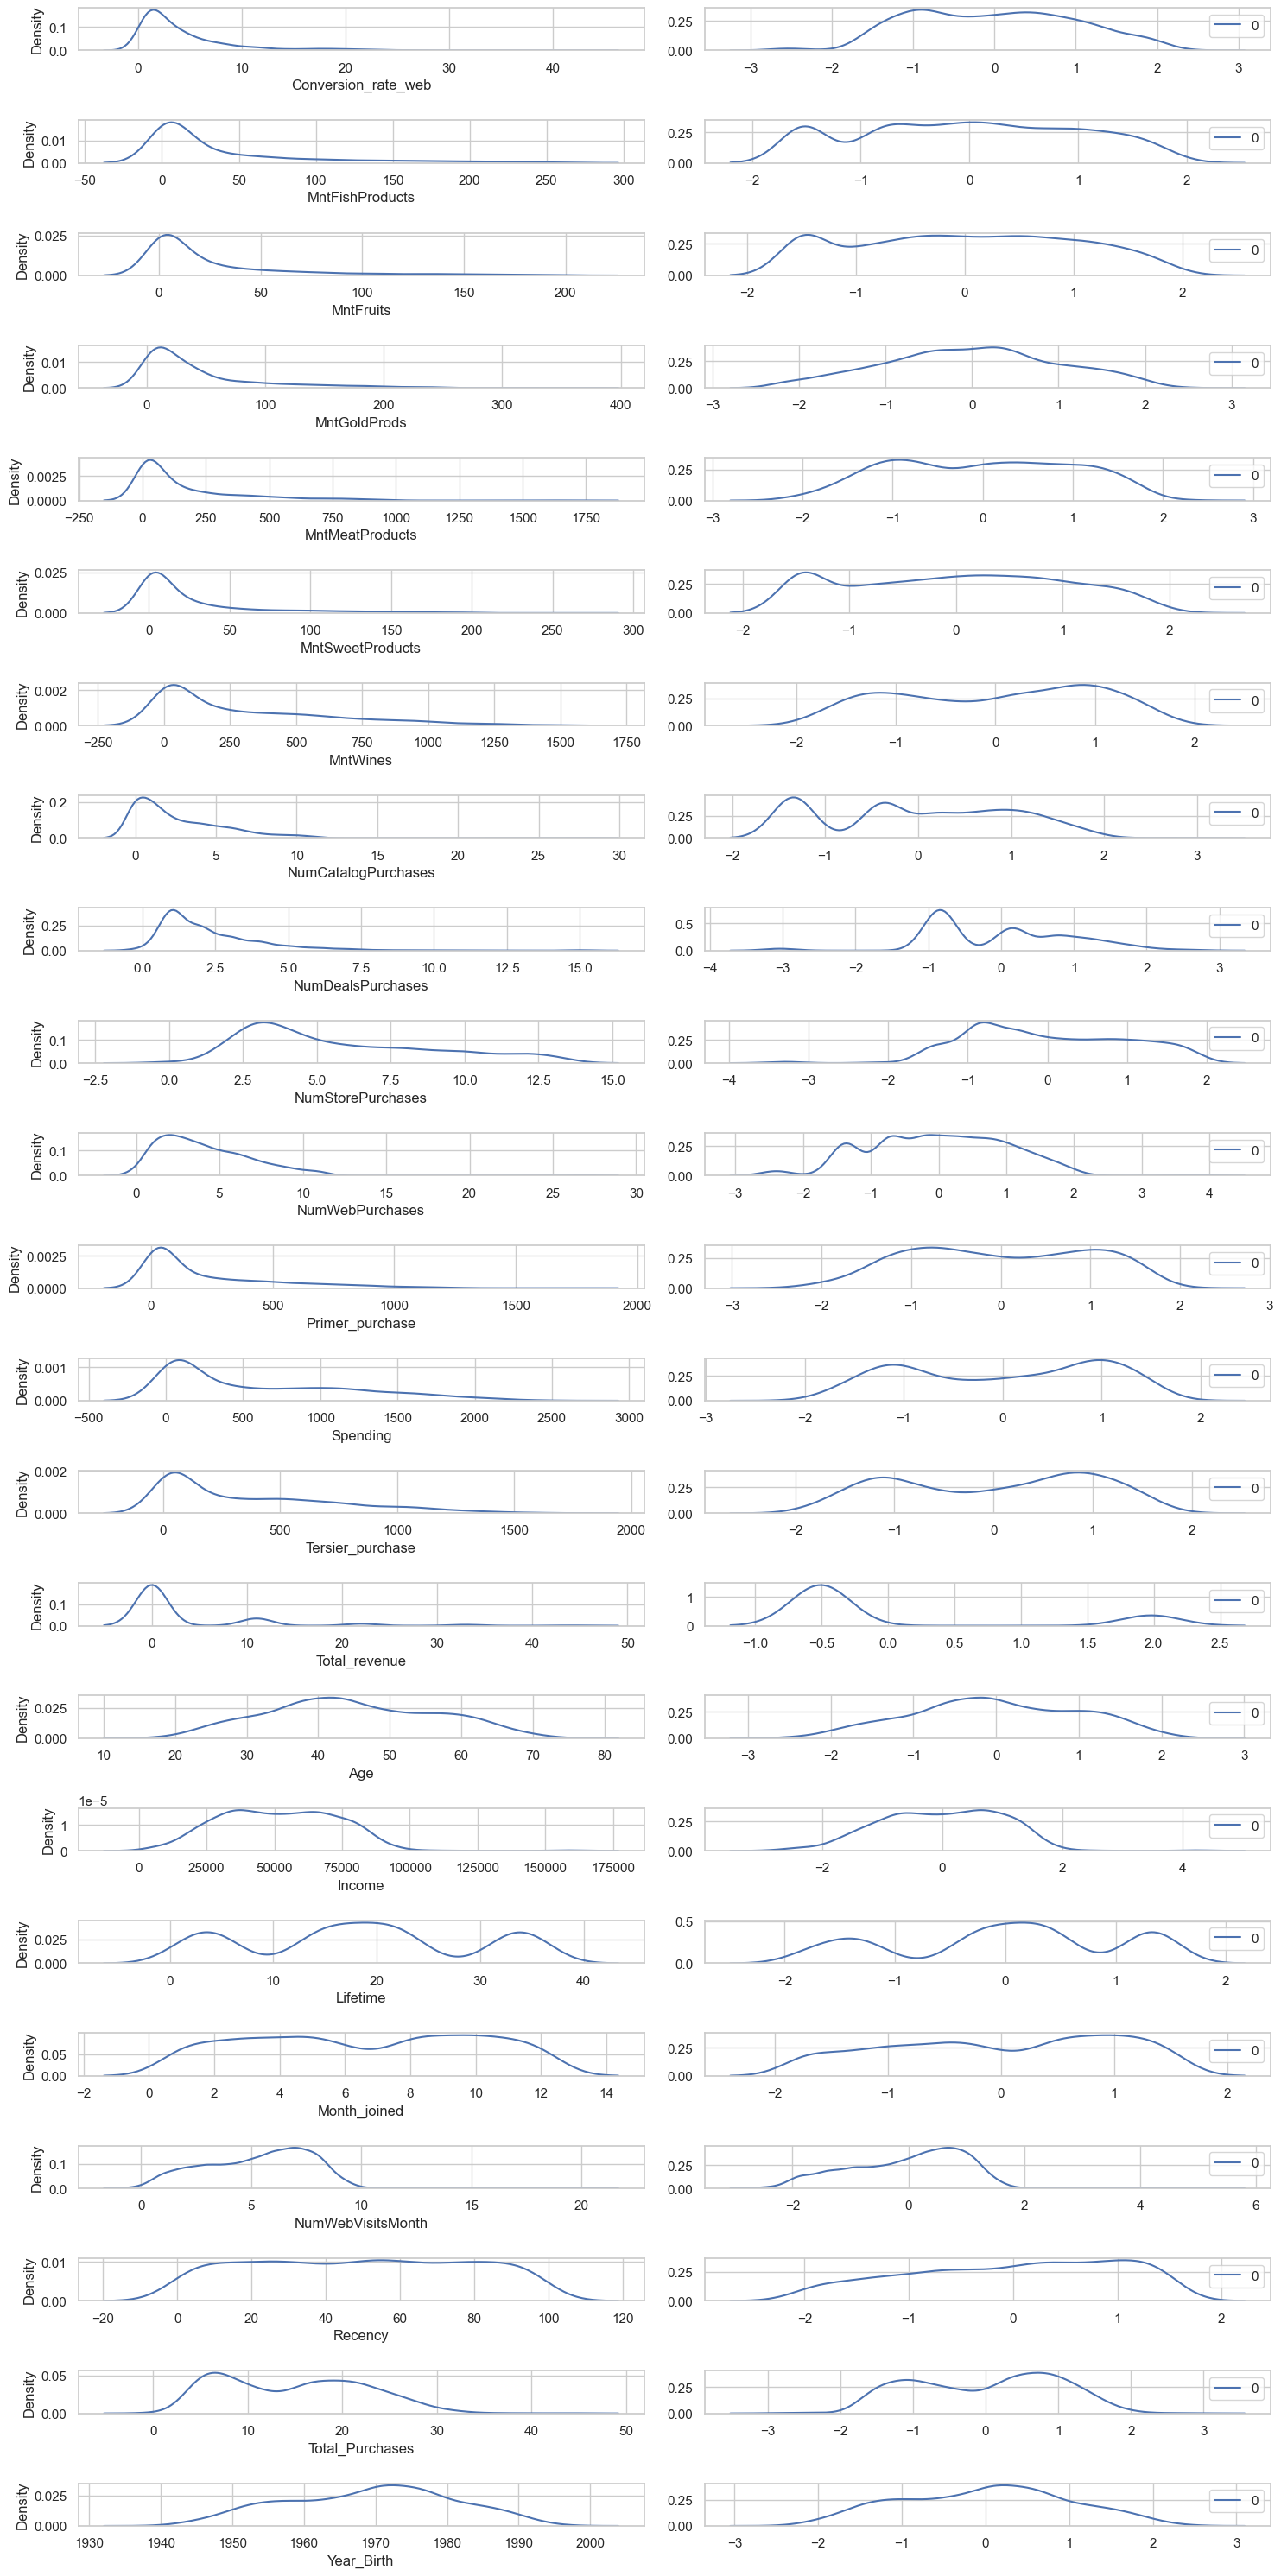

In [89]:
from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,30))
for i in range(0,len(log_cols)):
    pt = PowerTransformer(method='box-cox')
    data = pt.fit_transform(df_train[[log_cols[i]]]+1)
    kde1 = sns.kdeplot(df_train[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [90]:
# # Train
# pt = PowerTransformer(method='box-cox')
# df_train[log_cols] = pt.fit_transform(df_train[log_cols]+1)
# df_train[log_cols].describe()

In [91]:
# # Test
# df_test[log_cols] = pt.transform(df_test[log_cols]+1)
# df_test[log_cols].describe()

### **Yeo-Johnson Transformation**

- The advantage of the Yeo-Johnson transformation over the box-cox transformation is that, by default, the input (or parameter) of the Yeo-Johnson transformation can be a negative value. Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive.

- This is a huge advantage over the box-cox transformation since we don’t have to generate strictly positive values before applying the transformation.

- It supports zero values and negative values. This means we can apply it to our dataset without scaling it first.

<img src="https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/assets/54845293/93654477-b936-48a0-be29-94d7d6c71764"  width="300" height="100">

References :
- https://statisticaloddsandends.wordpress.com/2021/02/19/the-box-cox-and-yeo-johnson-transformations-for-continuous-variables/
- https://www.stat.umn.edu/arc/yjpower.pdf

- **with scipy**

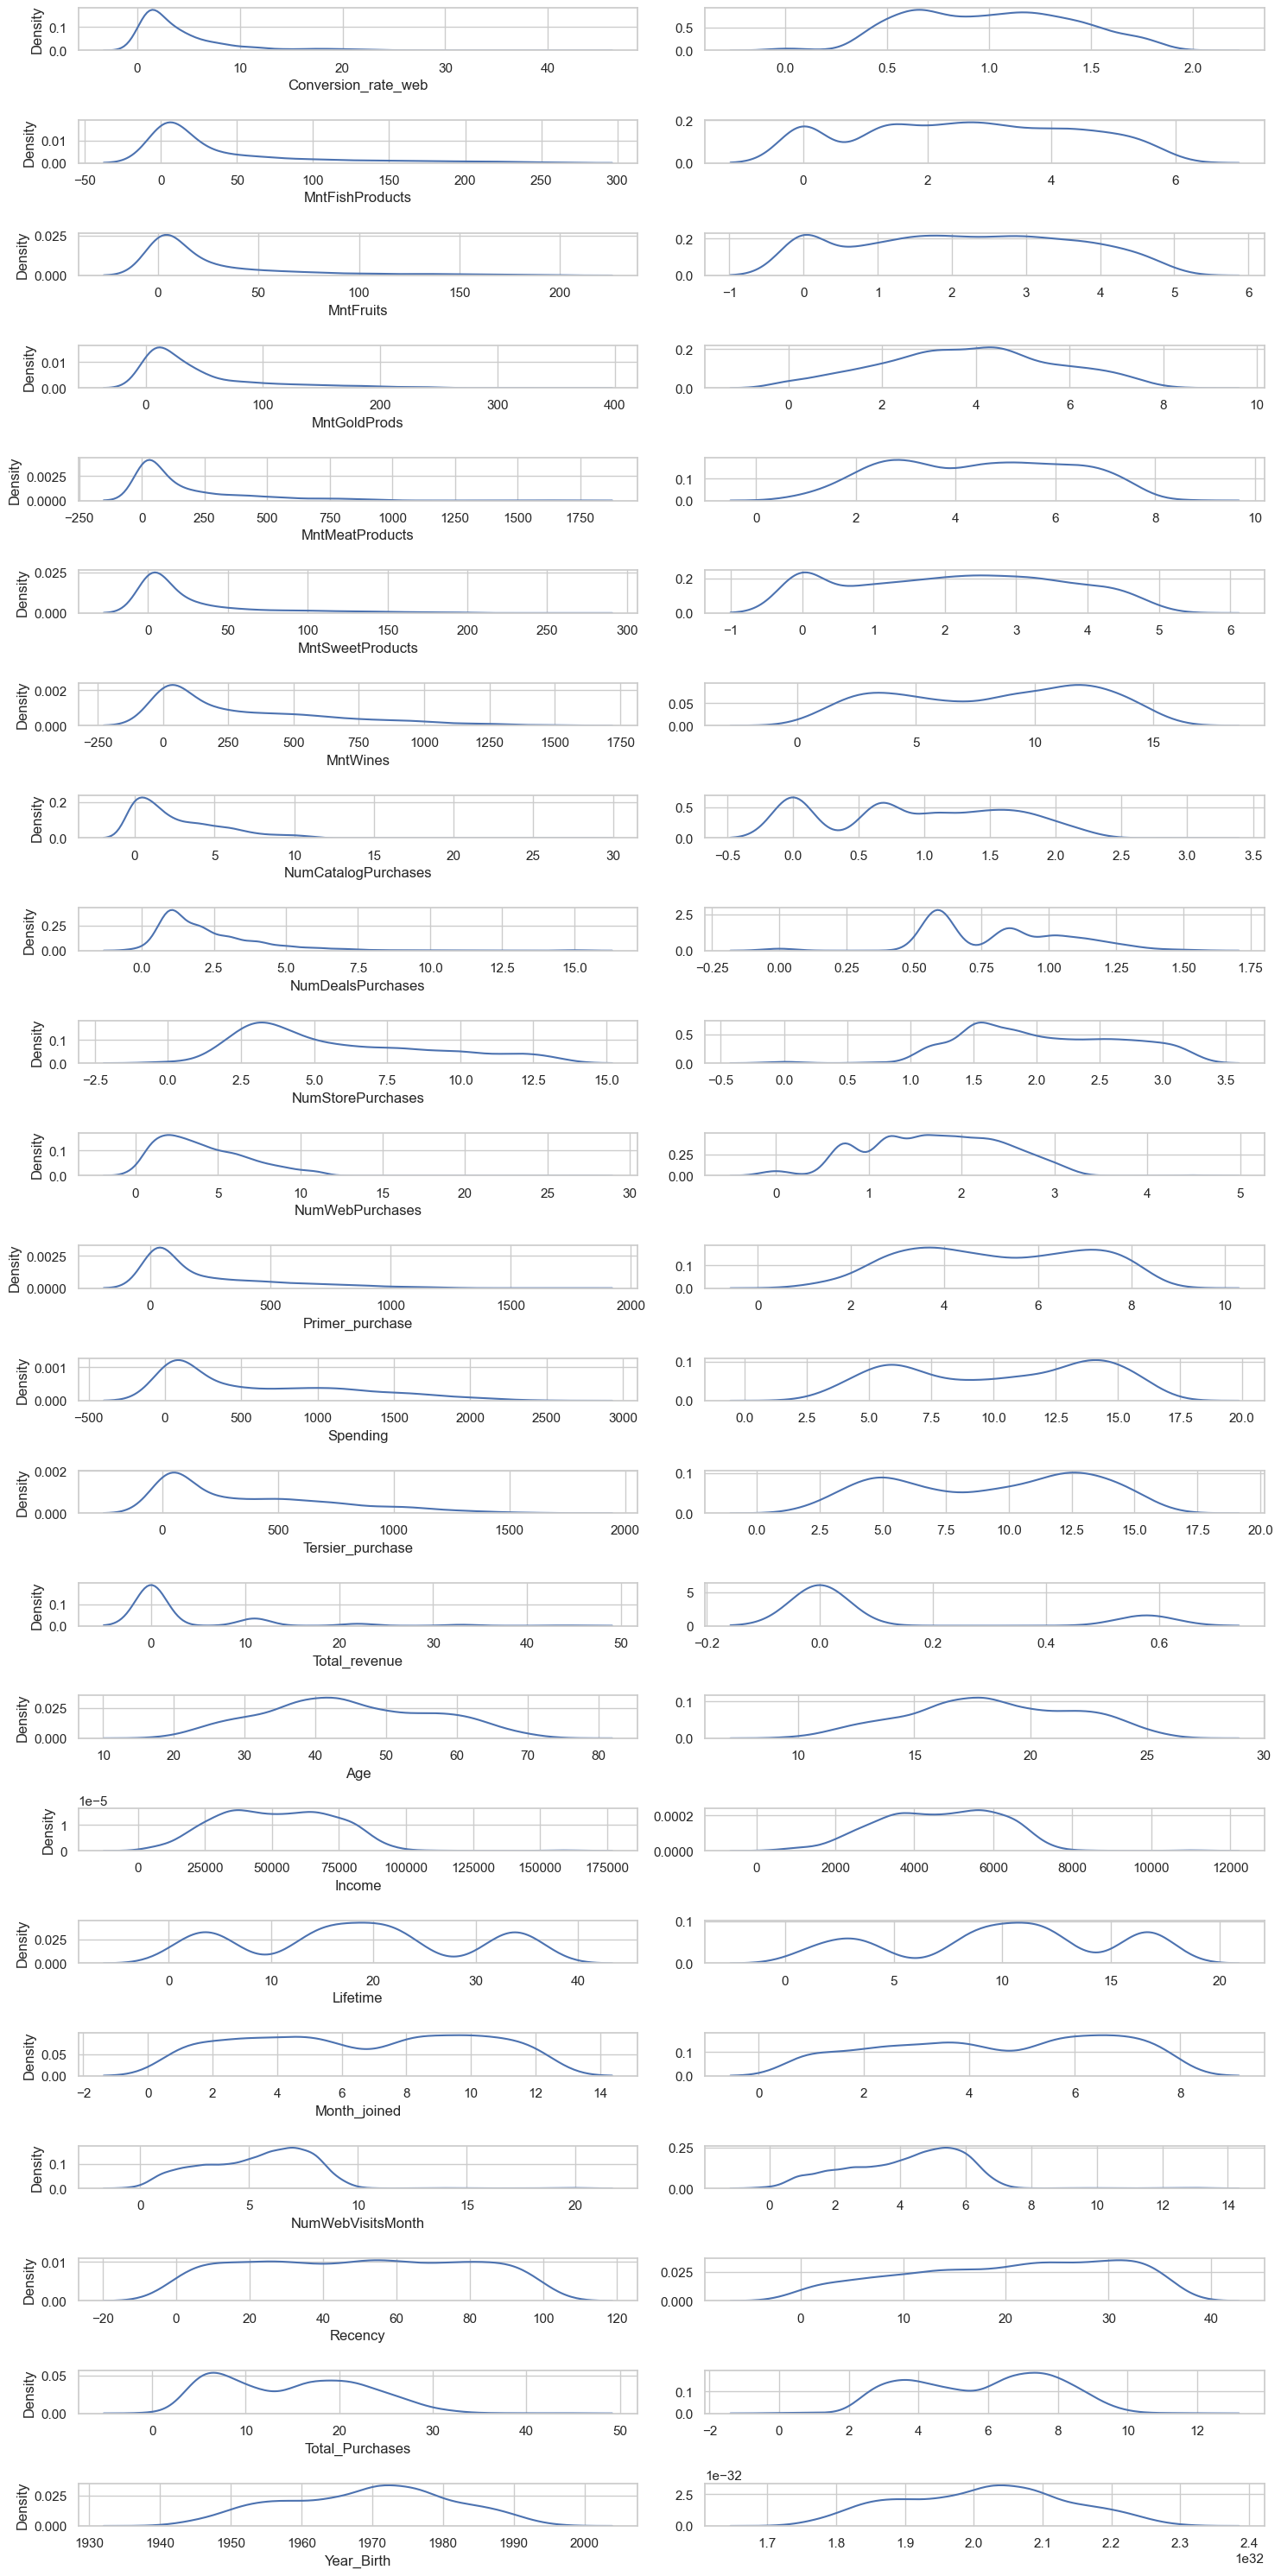

In [92]:
from scipy.stats import yeojohnson

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,30))
for i in range(0,len(log_cols)):
    data, fitted_lambda = yeojohnson(df_train[log_cols[i]],lmbda=None)
    kde1 = sns.kdeplot(df_train[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [93]:
# # Train
# for i in log_cols:
#     df_train[i], fitted_lambda = yeojohnson(df_train[i], lmbda=None)
    
# df_train[log_cols].describe()

In [94]:
# # Test
# for i in log_cols:
#     df_test[i], fitted_lambda = yeojohnson(df_test[i], lmbda=None)
    
# df_test[log_cols].describe()

- **with sklearn**

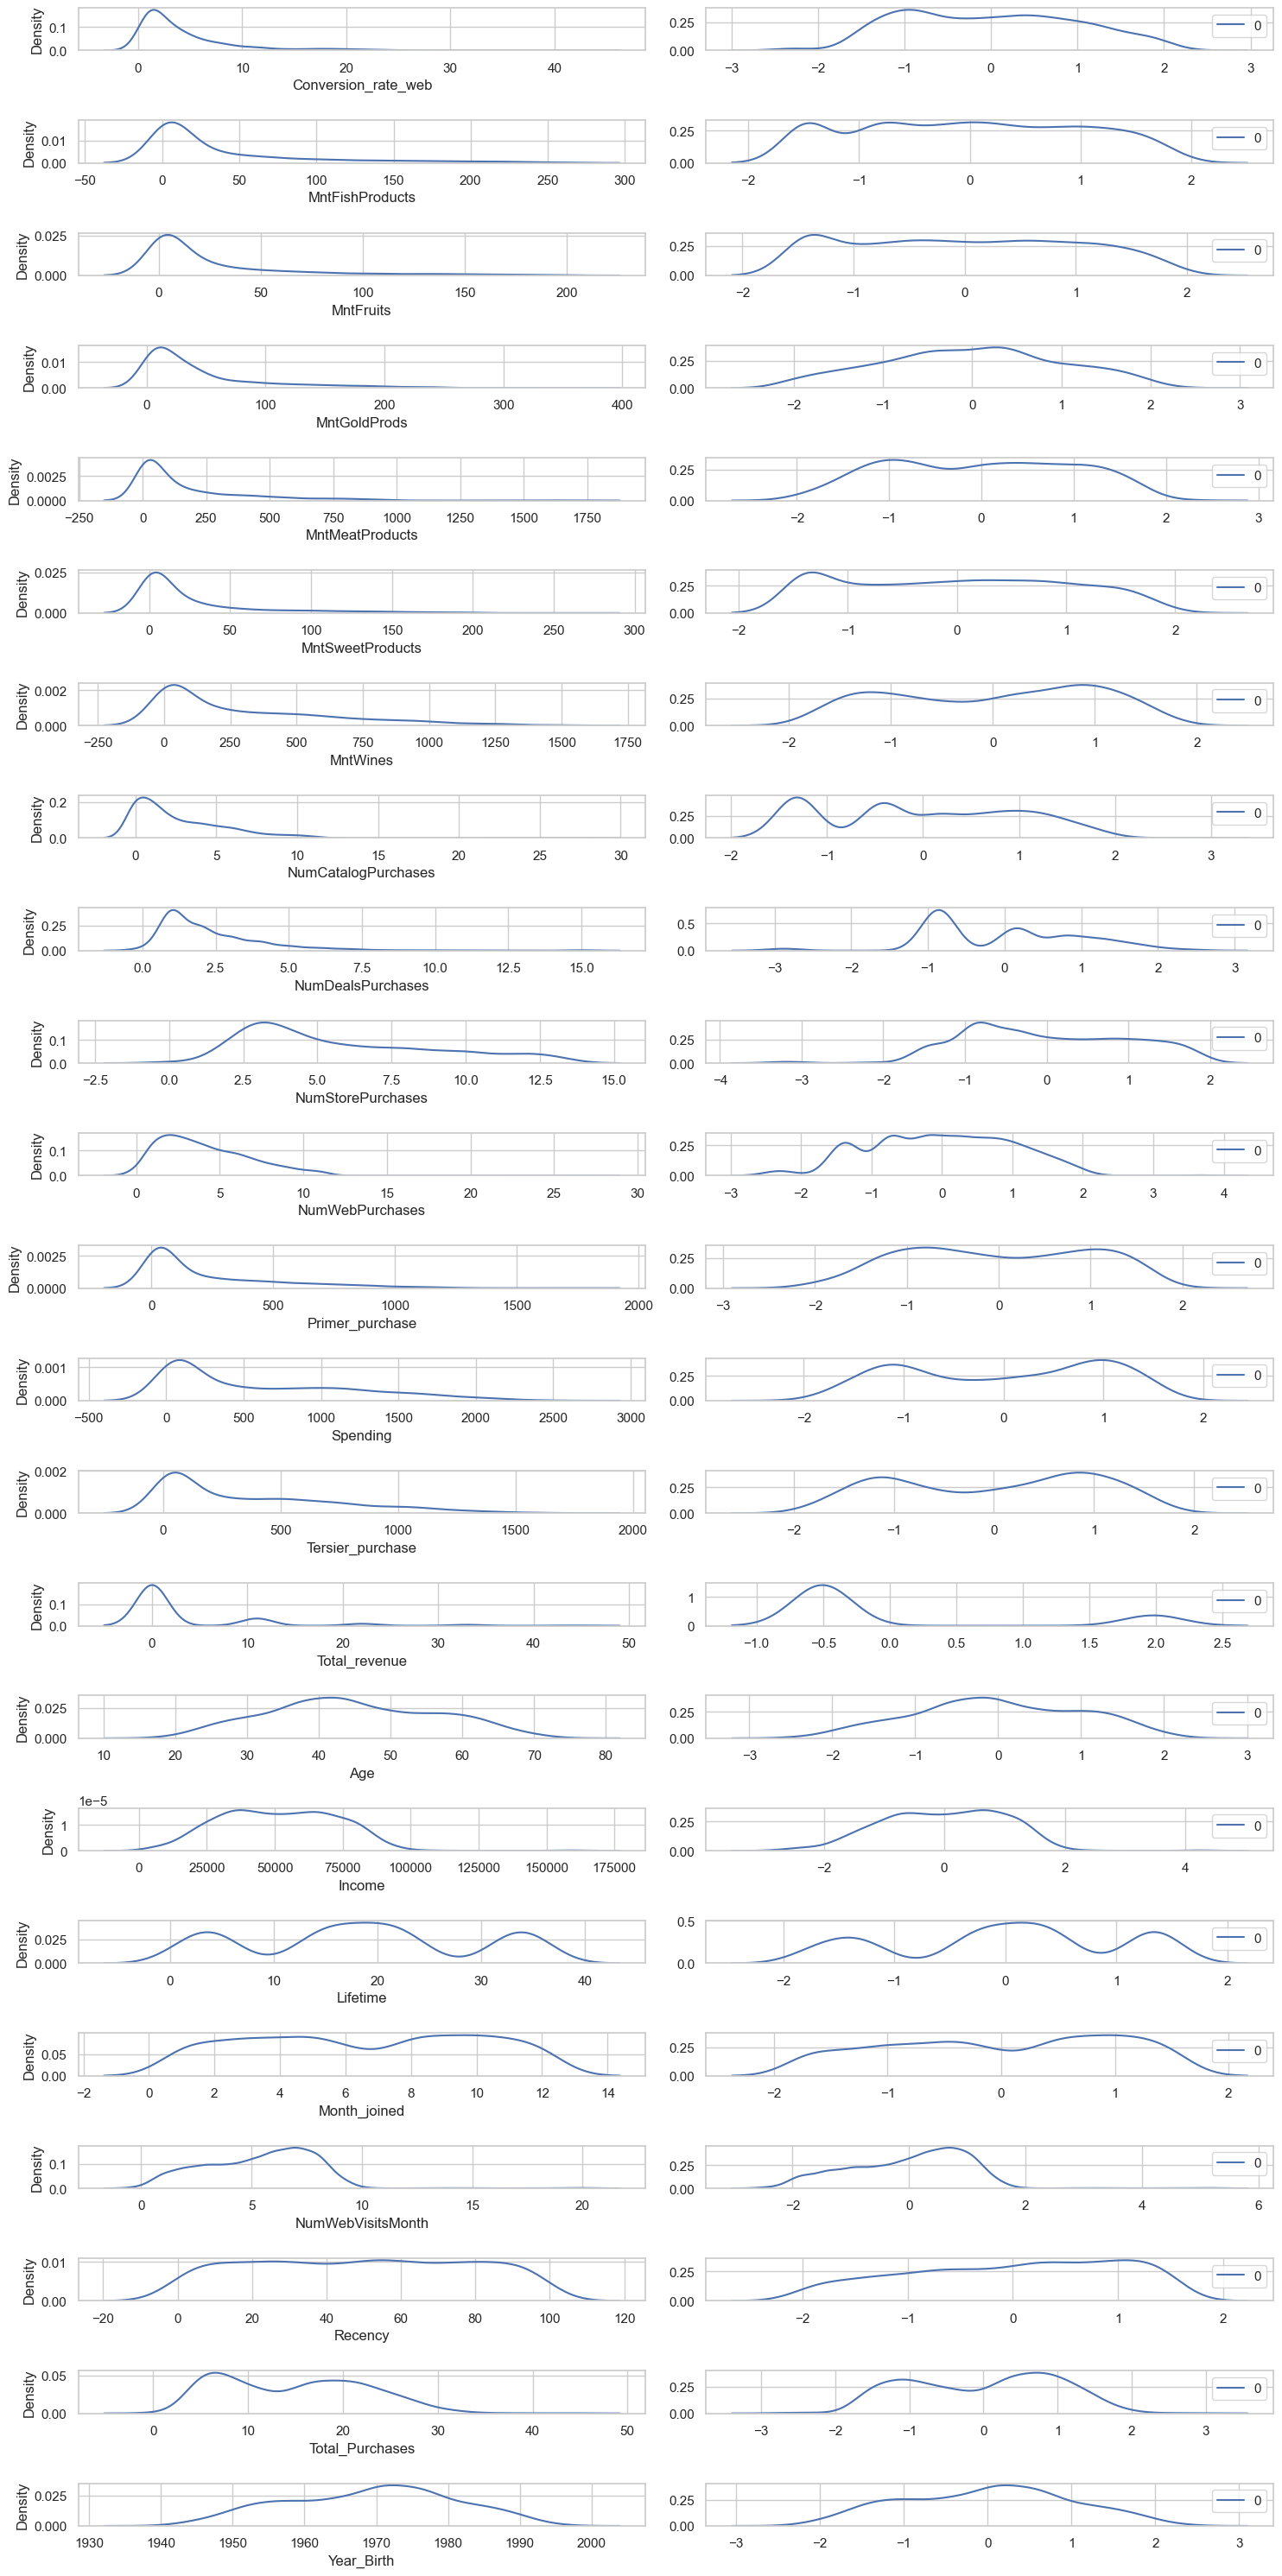

In [95]:
from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,30))
for i in range(0,len(log_cols)):
    pt = PowerTransformer(method='yeo-johnson')
    data = pt.fit_transform(df_train[[log_cols[i]]]+1)
    kde1 = sns.kdeplot(df_train[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [96]:
# Train
pt = PowerTransformer(method='yeo-johnson')
df_train[log_cols] = pt.fit_transform(df_train[log_cols])
df_train[log_cols].describe()

Conversion_rate_web  MntFishProducts  MntFruits  MntGoldProds  \
count                 1679             1679       1679          1679   
mean                -0.000           -0.000      0.000        -0.000   
std                  1.000            1.000      1.000         1.000   
min                 -2.568           -1.520     -1.472        -2.117   
25%                 -0.843           -0.710     -0.728        -0.676   
50%                 -0.022           -0.005     -0.009         0.011   
75%                  0.762            0.831      0.829         0.676   
max                  2.397            1.854      1.893         2.474   

       MntMeatProducts  MntSweetProducts  MntWines  NumCatalogPurchases  \
count             1679              1679      1679                 1679   
mean             0.000             0.000    -0.000                0.000   
std              1.000             1.000     1.000                1.000   
min             -2.122            -1.435    -1.981               -1.340   
25%             -0.850            -0.971    -0.913               -1.340   
50%              0.033             0.002     0.125                0.158   
75%              0.851             0.806     0.878                0.808   
max              2.228             2.027     1.821                2.834   

       NumDealsPurchases  NumStorePurchases  NumWebPurchases  Primer_purchase  \
count               1679               1679             1679             1679   
mean               0.000             -0.000            0.000            0.000   
std                1.000              1.000            1.000            1.000   
min               -3.040             -3.302           -2.394           -2.339   
25%               -0.837             -0.854           -0.717           -0.823   
50%                0.148             -0.045            0.177           -0.046   
75%                0.738              0.810            0.810            0.891   
max                2.668              1.798            3.842            2.043   

       Spending  Tersier_purchase  Total_revenue    Age  Income  Lifetime  \
count      1679              1679           1679   1679    1679      1679   
mean     -0.000            -0.000          0.000  0.000   0.000    -0.000   
std       1.000             1.000          1.000  1.000   1.000     1.000   
min      -2.071            -1.975         -0.505 -2.534  -2.845    -1.812   
25%      -0.975            -0.978         -0.505 -0.732  -0.751    -0.408   
50%       0.126             0.124         -0.505 -0.027   0.034     0.052   
75%       0.921             0.874         -0.505  0.801   0.791     0.562   
max       1.765             1.855          2.005  2.326   4.353     1.491   

       Month_joined  NumWebVisitsMonth  Recency  Total_Purchases  Year_Birth  
count          1679               1679     1679             1679        1679  
mean          0.000             -0.000   -0.000            0.000      -0.000  
std           1.000              1.000    1.000            1.000       1.000  
min          -1.715             -2.393   -2.033           -2.834      -2.370  
25%          -1.002             -0.936   -0.788           -0.861      -0.800  
50%          -0.090              0.297    0.128            0.141       0.042  
75%           0.979              0.682    0.854            0.837       0.743  
max           1.474              5.127    1.542            2.885       2.420

In [97]:
# Test
df_test[log_cols] = pt.transform(df_test[log_cols])
df_test[log_cols].describe()

Conversion_rate_web  MntFishProducts  MntFruits  MntGoldProds  \
count                  560              560        560           560   
mean                 0.032           -0.034     -0.026         0.025   
std                  1.000            1.002      1.032         0.970   
min                 -2.568           -1.520     -1.472        -2.117   
25%                 -0.778           -0.710     -0.999        -0.676   
50%                 -0.018           -0.029     -0.009         0.026   
75%                  0.749            0.780      0.810         0.725   
max                  2.141            1.852      1.887         2.085   

       MntMeatProducts  MntSweetProducts  MntWines  NumCatalogPurchases  \
count              560               560       560                  560   
mean            -0.036             0.015     0.002                0.014   
std              1.012             1.019     1.021                1.033   
min             -2.515            -1.435    -1.981               -1.340   
25%             -0.887            -0.971    -0.931               -1.340   
50%              0.005             0.002     0.139                0.158   
75%              0.791             0.926     0.888                0.808   
max              2.228             1.860     1.801                2.834   

       NumDealsPurchases  NumStorePurchases  NumWebPurchases  Primer_purchase  \
count                560                560              560              560   
mean              -0.046              0.030           -0.053           -0.034   
std                1.027              0.989            0.988            1.019   
min               -3.040             -3.302           -2.394           -2.339   
25%               -0.837             -0.854           -0.717           -0.871   
50%                0.148             -0.045           -0.223           -0.046   
75%                0.738              0.810            0.810            0.877   
max                2.533              1.798            1.904            2.043   

       Spending  Tersier_purchase  Total_revenue    Age  Income  Lifetime  \
count       560               560            560    560     560       560   
mean     -0.012             0.003          0.037  0.121   0.076    -0.100   
std       1.017             1.018          1.027  1.045   1.259     0.972   
min      -1.923            -1.975         -0.505 -2.423  -2.354    -1.812   
25%      -1.035            -0.978         -0.505 -0.552  -0.658    -1.141   
50%       0.131             0.158         -0.505  0.058   0.045     0.052   
75%       0.906             0.863         -0.505  0.960   0.807     0.480   
max       1.765             1.841          2.005  5.477  18.479     1.491   

       Month_joined  NumWebVisitsMonth  Recency  Total_Purchases  Year_Birth  
count           560                560      560              560         560  
mean         -0.096             -0.052    0.000           -0.005      -0.122  
std           1.002              0.932    0.976            1.025       1.048  
min          -1.715             -2.393   -2.033           -2.834      -5.526  
25%          -1.002             -0.510   -0.749           -1.032      -0.964  
50%          -0.090              0.297    0.095            0.141      -0.044  
75%           0.723              0.682    0.854            0.837       0.566  
max           1.474              1.427    1.542            2.079       2.323

In [98]:
df_train.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0   387       0.566       Basic        Married  -2.354        0         0   
1  3537       1.013  Graduation        Married  -0.947        1         0   
2  3075       0.215         PhD        Married   0.425        0         0   
3  4220       0.042         PhD        Married   0.421        0         1   
4  4472       0.042         PhD       Divorced  -0.713        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-11-13    0.410    -1.414      0.396           -1.063           -0.054   
1  2012-08-17    0.348    -0.802     -0.537           -0.456           -0.880   
2  2013-09-11    0.030    -0.052      0.772            0.620            0.286   
3  2013-11-02   -0.710    -0.380     -1.472           -0.969           -1.520   
4  2014-06-27   -0.413    -0.931     -1.472           -1.238           -0.377   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0            -0.971        -0.287             -0.837           -0.717   
1             0.002        -1.150              0.738           -0.223   
2             0.842        -2.117             -0.837           -0.223   
3            -0.971        -2.117             -0.837           -0.717   
4            -0.704        -0.202             -0.837           -1.373   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0               -1.340             -0.854              1.059             0   
1               -1.340             -0.414              1.059             0   
2                0.808              0.557             -1.863             0   
3               -0.378             -0.854             -0.936             0   
4               -0.378             -0.854             -1.384             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue    Age Age_group  Has_child  Dependents  Lifetime  \
0              3         11 -0.552     Adult          0           0     1.417   
1              3         11 -1.009     Adult          1           1     1.192   
2              3         11 -0.199     Adult          0           0     0.312   
3              3         11 -0.027     Adult          1           1     0.480   
4              3         11 -0.027     Adult          1           1    -1.141   

   Spending  Primer_purchase  Tersier_purchase  Total_Purchases  Total_Cmp  \
0    -1.052           -0.593            -1.258           -1.214          0   
1    -0.913           -0.626            -0.954           -0.545          0   
2     0.100            0.546            -0.154            0.141          0   
3    -0.859           -1.224            -0.656           -1.032          0   
4    -1.087           -1.183            -0.954           -1.214          0   

   Ever_Accept  Total_revenue Income_sgmt  Conversion_rate_web  Month_joined  \
0            0         -0.505         Low               -1.296         1.229   
1            0         -0.505         Low               -0.810         0.460   
2            0         -0.505      Medium                1.694         0.723   
3            0         -0.505      Medium               -0.143         1.229   
4            0         -0.505      Medium                0.135        -0.090   

   Recency_sgmt  Response  
0             2         0  
1             2         0  
2             2         0  
3             3         0  
4             3         0

### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan transformation sebelumnya, dapat diketahui bahwa keseluruhan nilai skewnessnya sudah memiliki rentang yang lebih seragam (tidak jauh dan tidak terlalu bervariasi). Sehingga dapat disimpulkan bahwa teknik fitur transformation yang telah kami lakukan sudah valid.

## **📌 Feature Encoding (Categoric)**


Mengecek feature categorical yang masih memiliki nilai betype string/object

In [99]:
#cek unique value
for x in cat_str: 
    unq = list(df_all[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== Education =====
['Basic', 'Graduation', 'PhD', 'Master']

===== Marital_Status =====
['Married', 'Divorced', 'Single']

===== Age_group =====
['Adult', 'Senior Adult', 'Young Adult']

===== Income_sgmt =====
['Low', 'Medium', 'High']



In [100]:
cat_str

['Education', 'Marital_Status', 'Age_group', 'Income_sgmt']

Dari hasil temuan, kita dapat menentukan beberapa encoding yang akan kita lakukan :
- **Label Encoding :**
    - LabelEncoder
    - Manually Mapped
    
    **Adapun daftar column yang akan kita proses :**
    - `Education` - Basic (0), Graduation (1), Master (2), PhD (3)
    - `Age_group` - Young Adult (0), Adult (1), Senior Adult (2)
    - `Income_sgmt` - Low (0), Medium (1), High (2)
    
- **One Hot Encoding :**
    - get_dummies
    - OneHotEncoder
    
    **Adapun daftar column yang akan kita proses :**
    - `Marital_Status` - Single, Married, Divorced

**Choice Determination:**

- Pada proses `Label Encoding` ini kita menggunakan `Manually Mapped`, karena kita bisa menentukan secara fleksible urutan/order dari categorical feature
- Pada proses `One Hot Encoding` ini kita menggunakan `OneHotEncoder`, karena hasil encodingnya lebih rapi dan lebih mudah untuk dilakukan adjust

### **Label Encoding**

1. Menggunakan `LabelEncoder`

In [101]:
# from sklearn.preprocessing import LabelEncoder

# cat = cat_str.copy()
# cat.remove("Marital_Status")

# le = LabelEncoder()

# for i in cat_str:
#     le.fit(df_train[i])
#     df_train[i] = le.transform(df_train[i])
#     df_test[i] = le.transform(df_test[i])
#     print(le.classes_)

2. Menggunakan Metode `Mapping`

In [102]:
map_edu = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3
}

df_train['Education'] = df_train['Education'].map(map_edu)
print("Education (Train) = ", np.sort(df_train['Education'].unique()))

df_test['Education'] = df_test['Education'].map(map_edu)
print("Education (Test) = ", np.sort(df_test['Education'].unique()))

Education (Train) =  [0 1 2 3]
Education (Test) =  [0 1 2 3]


In [103]:
map_age = {
    'Young Adult' : 0,
    'Adult' : 1,
    'Senior Adult' : 2
}

df_train['Age_group'] = df_train['Age_group'].map(map_age)
print("Age_group (Train) = ", np.sort(df_train['Age_group'].unique()))

df_test['Age_group'] = df_test['Age_group'].map(map_age)
print("Age_group (Test) = ", np.sort(df_test['Age_group'].unique()))

Age_group (Train) =  [0 1 2]
Age_group (Test) =  [0 1 2]


In [104]:
map_income = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}

df_train['Income_sgmt'] = df_train['Income_sgmt'].map(map_income)
print("Income_sgmt (Train) = ", np.sort(df_train['Income_sgmt'].unique()))

df_test['Income_sgmt'] = df_test['Income_sgmt'].map(map_income)
print("Income_sgmt (Test) = ", np.sort(df_test['Income_sgmt'].unique()))

Income_sgmt (Train) =  [0 1 2]
Income_sgmt (Test) =  [0 1 2]


In [105]:
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation        Married   71613        0         0   
3  6182        1984  Graduation        Married   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

### **One Hot Encoding**

1. Menggunakan `get_dummies`

In [106]:
# df_train["Marital_Status"].unique()

In [107]:
# # TRAIN
# #Not Auto Drop Columns
# ohe = pd.get_dummies(df_train["Marital_Status"])
# df_train.drop("Marital_Status", axis=1, inplace=True)
# df_train = df_train.join(ohe)

# # cara 2 : Auto drop Column
# # df_train = pd.get_dummies(data=df_train, columns=["Marital_Status"])

# df_train.head()

In [108]:
# df_test["Marital_Status"].unique()

In [109]:
# # TEST
# #Not Auto Drop Columns
# ohe = pd.get_dummies(df_test["Marital_Status"])
# df_test.drop("Marital_Status", axis=1, inplace=True)
# df_test = df_test.join(ohe)

# # cara 2 : Auto drop Column
# # df_test = pd.get_dummies(data=df_test, columns=["Marital_Status"])

# df_test.head()

2. Menggunakan `OneHotEncoder`

In [110]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
df_ohe_train = pd.DataFrame(
    oh.fit_transform(df_train[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)
print(oh.categories_[0])

df_train.drop("Marital_Status", axis=1, inplace=True)

df_train = pd.concat([df_train, df_ohe_train], axis=1)

['Divorced' 'Married' 'Single']


In [111]:
from sklearn.preprocessing import OneHotEncoder

df_ohe_test = pd.DataFrame(
    oh.transform(df_test[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)

df_test.drop("Marital_Status", axis=1, inplace=True)

df_test = pd.concat([df_test, df_ohe_test], axis=1)

In [112]:
df_train.head()

ID  Year_Birth  Education  Income  Kidhome  Teenhome Dt_Customer  \
0   387       0.566          0  -2.354        0         0  2012-11-13   
1  3537       1.013          1  -0.947        1         0  2012-08-17   
2  3075       0.215          3   0.425        0         0  2013-09-11   
3  4220       0.042          3   0.421        0         1  2013-11-02   
4  4472       0.042          3  -0.713        1         0  2014-06-27   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    0.410    -1.414      0.396           -1.063           -0.054   
1    0.348    -0.802     -0.537           -0.456           -0.880   
2    0.030    -0.052      0.772            0.620            0.286   
3   -0.710    -0.380     -1.472           -0.969           -1.520   
4   -0.413    -0.931     -1.472           -1.238           -0.377   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0            -0.971        -0.287             -0.837           -0.717   
1             0.002        -1.150              0.738           -0.223   
2             0.842        -2.117             -0.837           -0.223   
3            -0.971        -2.117             -0.837           -0.717   
4            -0.704        -0.202             -0.837           -1.373   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0               -1.340             -0.854              1.059             0   
1               -1.340             -0.414              1.059             0   
2                0.808              0.557             -1.863             0   
3               -0.378             -0.854             -0.936             0   
4               -0.378             -0.854             -1.384             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue    Age  Age_group  Has_child  Dependents  \
0              3         11 -0.552          1          0           0   
1              3         11 -1.009          1          1           1   
2              3         11 -0.199          1          0           0   
3              3         11 -0.027          1          1           1   
4              3         11 -0.027          1          1           1   

   Lifetime  Spending  Primer_purchase  Tersier_purchase  Total_Purchases  \
0     1.417    -1.052           -0.593            -1.258           -1.214   
1     1.192    -0.913           -0.626            -0.954           -0.545   
2     0.312     0.100            0.546            -0.154            0.141   
3     0.480    -0.859           -1.224            -0.656           -1.032   
4    -1.141    -1.087           -1.183            -0.954           -1.214   

   Total_Cmp  Ever_Accept  Total_revenue  Income_sgmt  Conversion_rate_web  \
0          0            0         -0.505            0               -1.296   
1          0            0         -0.505            0               -0.810   
2          0            0         -0.505            1                1.694   
3          0            0         -0.505            1               -0.143   
4          0            0         -0.505            1                0.135   

   Month_joined  Recency_sgmt  Response  Divorced  Married  Single  
0         1.229             2         0         0        1       0  
1         0.460             2         0         0        1       0  
2         0.723             2         0         0        1       0  
3         1.229             3         0         0        1       0  
4        -0.090             3         0         1        0       0

In [113]:
df_test.head()

ID  Year_Birth  Education  Income  Kidhome  Teenhome Dt_Customer  \
0  10146       0.215          3  -0.554        1         0  2014-03-02   
1      1      -0.718          1   0.297        0         0  2014-06-15   
2   7875      -1.682          1   0.944        0         0  2014-04-29   
3   7807       0.389          1  -0.259        0         1  2012-09-12   
4   4268      -0.882          1   0.119        0         1  2014-06-09   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0   -1.077    -0.896     -0.999           -0.969           -1.520   
1   -2.033     0.815     -0.271           -0.005           -0.297   
2   -0.002     1.421     -1.472            1.502            0.740   
3   -0.710    -0.217     -1.472            0.319            0.819   
4    0.128    -0.057     -1.472           -0.691           -1.520   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0            -1.435        -1.295             -0.837           -1.373   
1            -1.435         0.349             -0.837            1.072   
2             1.068        -2.117             -0.837            0.177   
3             0.128         1.257              1.442            0.516   
4            -0.971        -0.832             -0.837           -0.223   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0               -1.340             -0.854              0.682             0   
1                0.528              0.557             -0.100             0   
2                1.520              1.798             -1.384             0   
3               -0.378             -0.045              0.297             0   
4               -0.378             -0.414             -0.510             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             1         0   
2             1             1             1             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue    Age  Age_group  Has_child  Dependents  \
0              3         11 -0.199          1          1           1   
1              3         11  0.720          2          0           0   
2              3         11  1.658          2          0           0   
3              3         11 -0.374          1          1           1   
4              3         11  0.881          2          1           1   

   Lifetime  Spending  Primer_purchase  Tersier_purchase  Total_Purchases  \
0    -1.516    -1.241           -1.183            -1.167           -1.409   
1    -1.141     0.416           -0.155             0.695            0.502   
2    -1.384     1.355            1.328             1.338            1.348   
3     1.267     0.074            0.314             0.032            0.265   
4    -1.141    -0.504           -0.950            -0.275           -0.699   

   Total_Cmp  Ever_Accept  Total_revenue  Income_sgmt  Conversion_rate_web  \
0          0            0         -0.505            1               -1.343   
1          1            1          1.973            1                0.334   
2          3            1          2.002            2                1.579   
3          0            0         -0.505            1                0.007   
4          0            0         -0.505            1               -0.181   

   Month_joined  Recency_sgmt  Response  Divorced  Married  Single  
0        -1.002             4         0         0        1       0  
1        -0.090             4         1         0        0       1  
2        -0.683             2         1         0        1       0  
3         0.723             3         0         0        1       0  
4        -0.090             2         0         0        1       0

### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan encoding sebelumnya, dapat diketahui bahwa keseluruhan nilai telah beripe numeric sesuai dengan nilai yang kita assign. Sehingga dapat disimpulkan bahwa teknik fitur encoding yang telah kami lakukan sudah valid dan kami.

## **📌 Feature Selection**

### **1. Drop Unnecessary Feature**

- Drop kolom `ID` karena memiliki banyak kategori dan tidak berguna untuk pemodelan
- Drop kolom `Year_Birth` karena sudah dilakukan Feature extraction untuk mengambil data Umur/Age pada range tahun saat ini 2014 (sesuai pada data)
- Drop kolom `Dt_Customer` karena tidak terlalu berpengaruh pada model prediksi, selain itu juga telah di lakukan extraction
- Drop kolom `Z_CostContact` (3) dan `Z_Revenue` (11) karena  hanya memiliki satu nilai, tidak memberikan informasi yang signifikan terhadap model prediksi

In [114]:
df_train.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)
df_test.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

### **2. Univariate Selection**

In [115]:
# define X and y
X_train = df_train.drop(['Response'], axis=1) #features
y_train = df_train['Response'] #target

- #### **ANOVA F-value**

`ANOVA F-value` estimates the degree of linearity between the input feature (i.e., independent features) and the output feature (i.e., dependent feature). A high F-value indicates a high degree of linearity and a low F-value indicates a low degree of linearity.

Scikit-learn provides two functions to calculate F-value:

1. `sklearn.feature_selection.f_regression` for regression problems
2. `sklearn.feature_selection.f_classif` for classification problems

Disadvantage:

ANOVA F-value only captures the linear relationships between input and output feature.

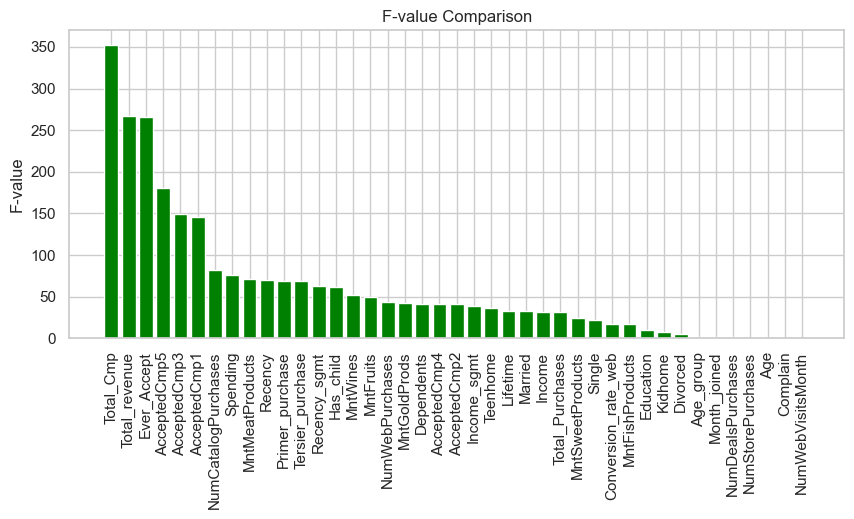

In [116]:
from sklearn.feature_selection import f_classif
feature_names = X_train.columns

# create f_classif object
f_value = f_classif(X_train, y_train)

# print the name and F-value of each feature
# for feature in zip(feature_names, f_value[0]):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "f_value":f_value[0]
}).sort_values("f_value", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="f_value", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("F-value")
plt.title("F-value Comparison")
plt.show()

Mengambil 20 top feature

In [117]:
feature_importance = []
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Primer_purchase',
 'Tersier_purchase',
 'Recency_sgmt',
 'Has_child',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp4']

- #### **Variance Threshold**

Variance Threshold removes the features whose variance is below the pre-defined `threshold` value. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

Advantage:

This can be used for unsupervised learning.

Disadvantage:

Variance Threshold only considers the relationship among the features but not the relationship between input features with the output feature.

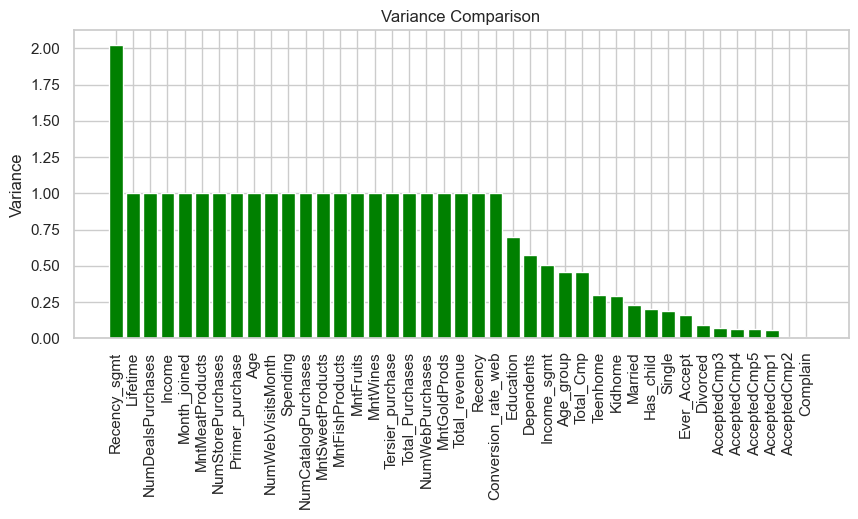

In [118]:
# import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
# create VarianceThreshold object
selector = VarianceThreshold(threshold=0.0)
# train and transform
selector.fit_transform(X_train)
# print the name and variance of each feature
# for feature in zip(feature_names, selector.variances_):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "variances":selector.variances_
}).sort_values("variances", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="variances", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Variance")
plt.title("Variance Comparison")
plt.show()

Mengambil 20 top feature

In [119]:
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Primer_purchase',
 'Tersier_purchase',
 'Recency_sgmt',
 'Has_child',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp4',
 'Lifetime',
 'NumDealsPurchases',
 'Income',
 'Month_joined',
 'NumStorePurchases',
 'Age',
 'NumWebVisitsMonth',
 'MntSweetProducts',
 'MntFishProducts',
 'Total_Purchases']

- #### **Mutual information**

Mutual information (MI) measures the dependence of one variable to another by quantifying the amount of information obtained about one feature, through the other feature. MI is symmetric and non-negative and is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Scikit-learn provides two functions to calculate F-value:

- `sklearn.feature_selection.mutual_info_regression` for regression problems
- `sklearn.feature_selection.mutual_info_classif` for classification problems

Advantage:

MI can capture non-linear relationships between input and output feature.

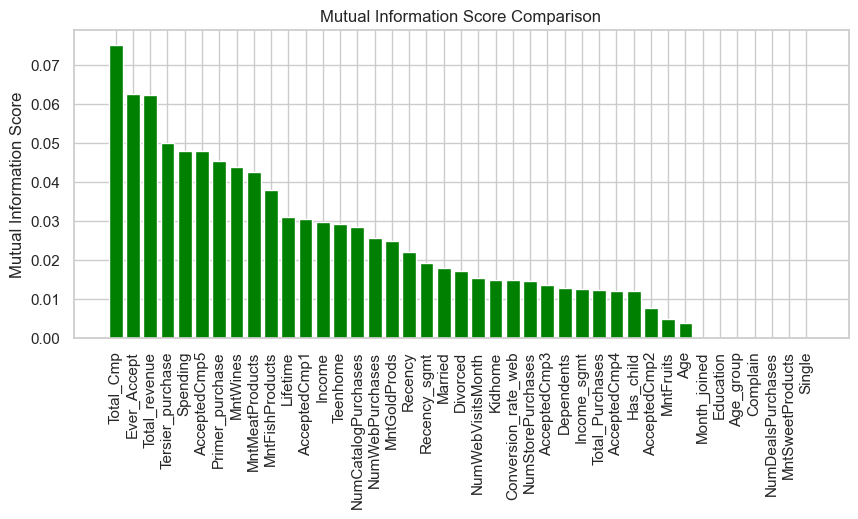

In [120]:
# import mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
# create mutual_info_classif object
MI_score = mutual_info_classif(X_train, y_train, random_state=0)
# Print the name and mutual information score of each feature
# for feature in zip(feature_names, MI_score):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "MI_score":MI_score
}).sort_values("MI_score", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="MI_score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Score Comparison")
plt.show()

Mengambil 20 top feature

In [121]:
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Primer_purchase',
 'Tersier_purchase',
 'Recency_sgmt',
 'Has_child',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp4',
 'Lifetime',
 'NumDealsPurchases',
 'Income',
 'Month_joined',
 'NumStorePurchases',
 'Age',
 'NumWebVisitsMonth',
 'MntSweetProducts',
 'MntFishProducts',
 'Total_Purchases',
 'Teenhome',
 'Married']

- #### **Scikit-learn’s SelectKBest**

SelectKBest selects the features using a function (in this case ANOVA F-value) and then "removes all but the k highest scoring features".

Statistical tests can be used to select those features that have the strongest relationship with the output variable. `Mutual information, ANOVA F-test and chi square` are some of the most popular methods of univariate feature selection.

---

ERROR :

`Input X must be non-negative`

The error message you got that:

Tells that: Pearson's chi-square test (goodness of fit) does not apply to negative values. It occurred because the chi-square test assumes frequencies distribution and a frequency can't be a negative number. But, `sklearn.feature_selection.chi2` asserts the input as non-negative.

If data transformation is for some reason not possible (e.g. a negative value is an important factor), then you should pick another statistic to score your features:

```
sklearn.feature_selection.f_classif computes ANOVA f-value
sklearn.feature_selection.mutual_info_classif
```

In [122]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, f_classif, mutual_info_classif

# apply SelectKBest class to extract top 10 best features

# computes chi2
# semuanya harus positif
# bestfeatures = SelectKBest(score_func=chi2, k=10)

# computes ANOVA f-value
bestfeatures = SelectKBest(score_func=f_classif, k=10)

fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values('Score', ascending=False, inplace=True)
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs   Score
31            Total_Cmp 352.317
33        Total_revenue 267.068
32          Ever_Accept 265.349
18         AcceptedCmp5 180.364
16         AcceptedCmp3 149.377
19         AcceptedCmp1 145.703
13  NumCatalogPurchases  82.078
27             Spending  75.841
7       MntMeatProducts  71.821
4               Recency  70.215


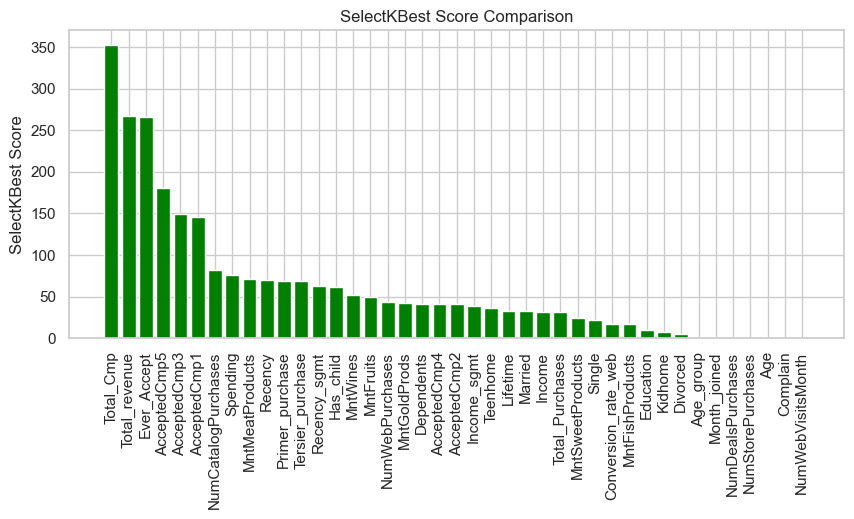

In [123]:
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=featureScores, x="Specs", height="Score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("SelectKBest Score")
plt.title("SelectKBest Score Comparison")
plt.show()

Mengambil 20 top feature

In [124]:
for i in featureScores["Specs"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Primer_purchase',
 'Tersier_purchase',
 'Recency_sgmt',
 'Has_child',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp4',
 'Lifetime',
 'NumDealsPurchases',
 'Income',
 'Month_joined',
 'NumStorePurchases',
 'Age',
 'NumWebVisitsMonth',
 'MntSweetProducts',
 'MntFishProducts',
 'Total_Purchases',
 'Teenhome',
 'Married']

### **3. Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.02769471 0.02659871 0.01066353 0.01408251 0.04521131 0.02790929
 0.02699872 0.0304283  0.02436297 0.02691497 0.02859967 0.02276383
 0.02361247 0.02854692 0.03103648 0.02973373 0.02703623 0.00695727
 0.02445734 0.01833209 0.00384132 0.00181759 0.02556565 0.01944038
 0.01038063 0.01475501 0.03842559 0.02845528 0.02751384 0.02664702
 0.0223887  0.02934431 0.03923235 0.05009586 0.01439761 0.02504082
 0.02420269 0.04341561 0.01107359 0.02529742 0.01672765]


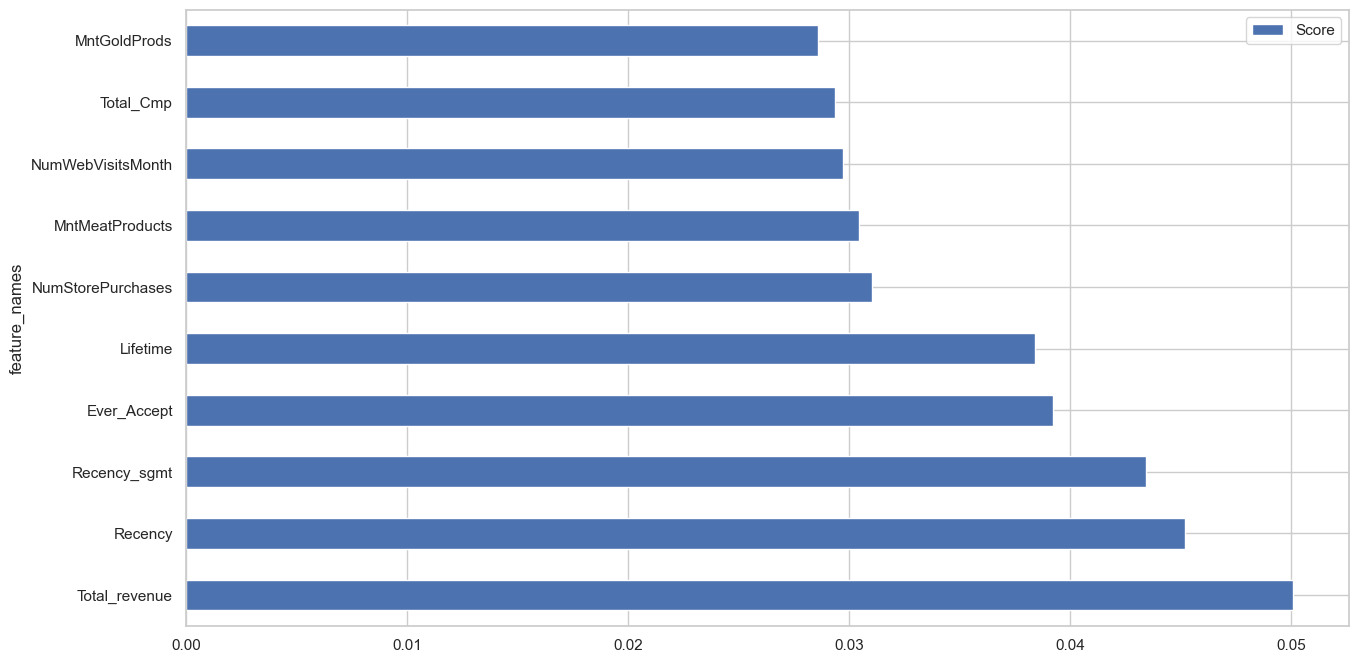

In [125]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = pd.DataFrame(feat_importances).reset_index(names="feature_names") \
    .rename(columns={0:"Score"}) \
    .sort_values("Score", ascending=False).reset_index(drop=True)
feat_importances.nlargest(10, "Score").plot(x="feature_names", y="Score", kind='barh')
plt.show()

Mengambil 20 top feature

In [126]:
for i in feat_importances["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Primer_purchase',
 'Tersier_purchase',
 'Recency_sgmt',
 'Has_child',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp4',
 'Lifetime',
 'NumDealsPurchases',
 'Income',
 'Month_joined',
 'NumStorePurchases',
 'Age',
 'NumWebVisitsMonth',
 'MntSweetProducts',
 'MntFishProducts',
 'Total_Purchases',
 'Teenhome',
 'Married',
 'Education']

### **4. Correlation Matrix with Heatmap**

- Correlation states how the features are related to each other or the target variable.

- Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

- Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

- Cek Feature Redundan pada korelasi Antar Feature, Drop salah satunya, yang rendah korelsinya dengan Response (target)

<Axes: >

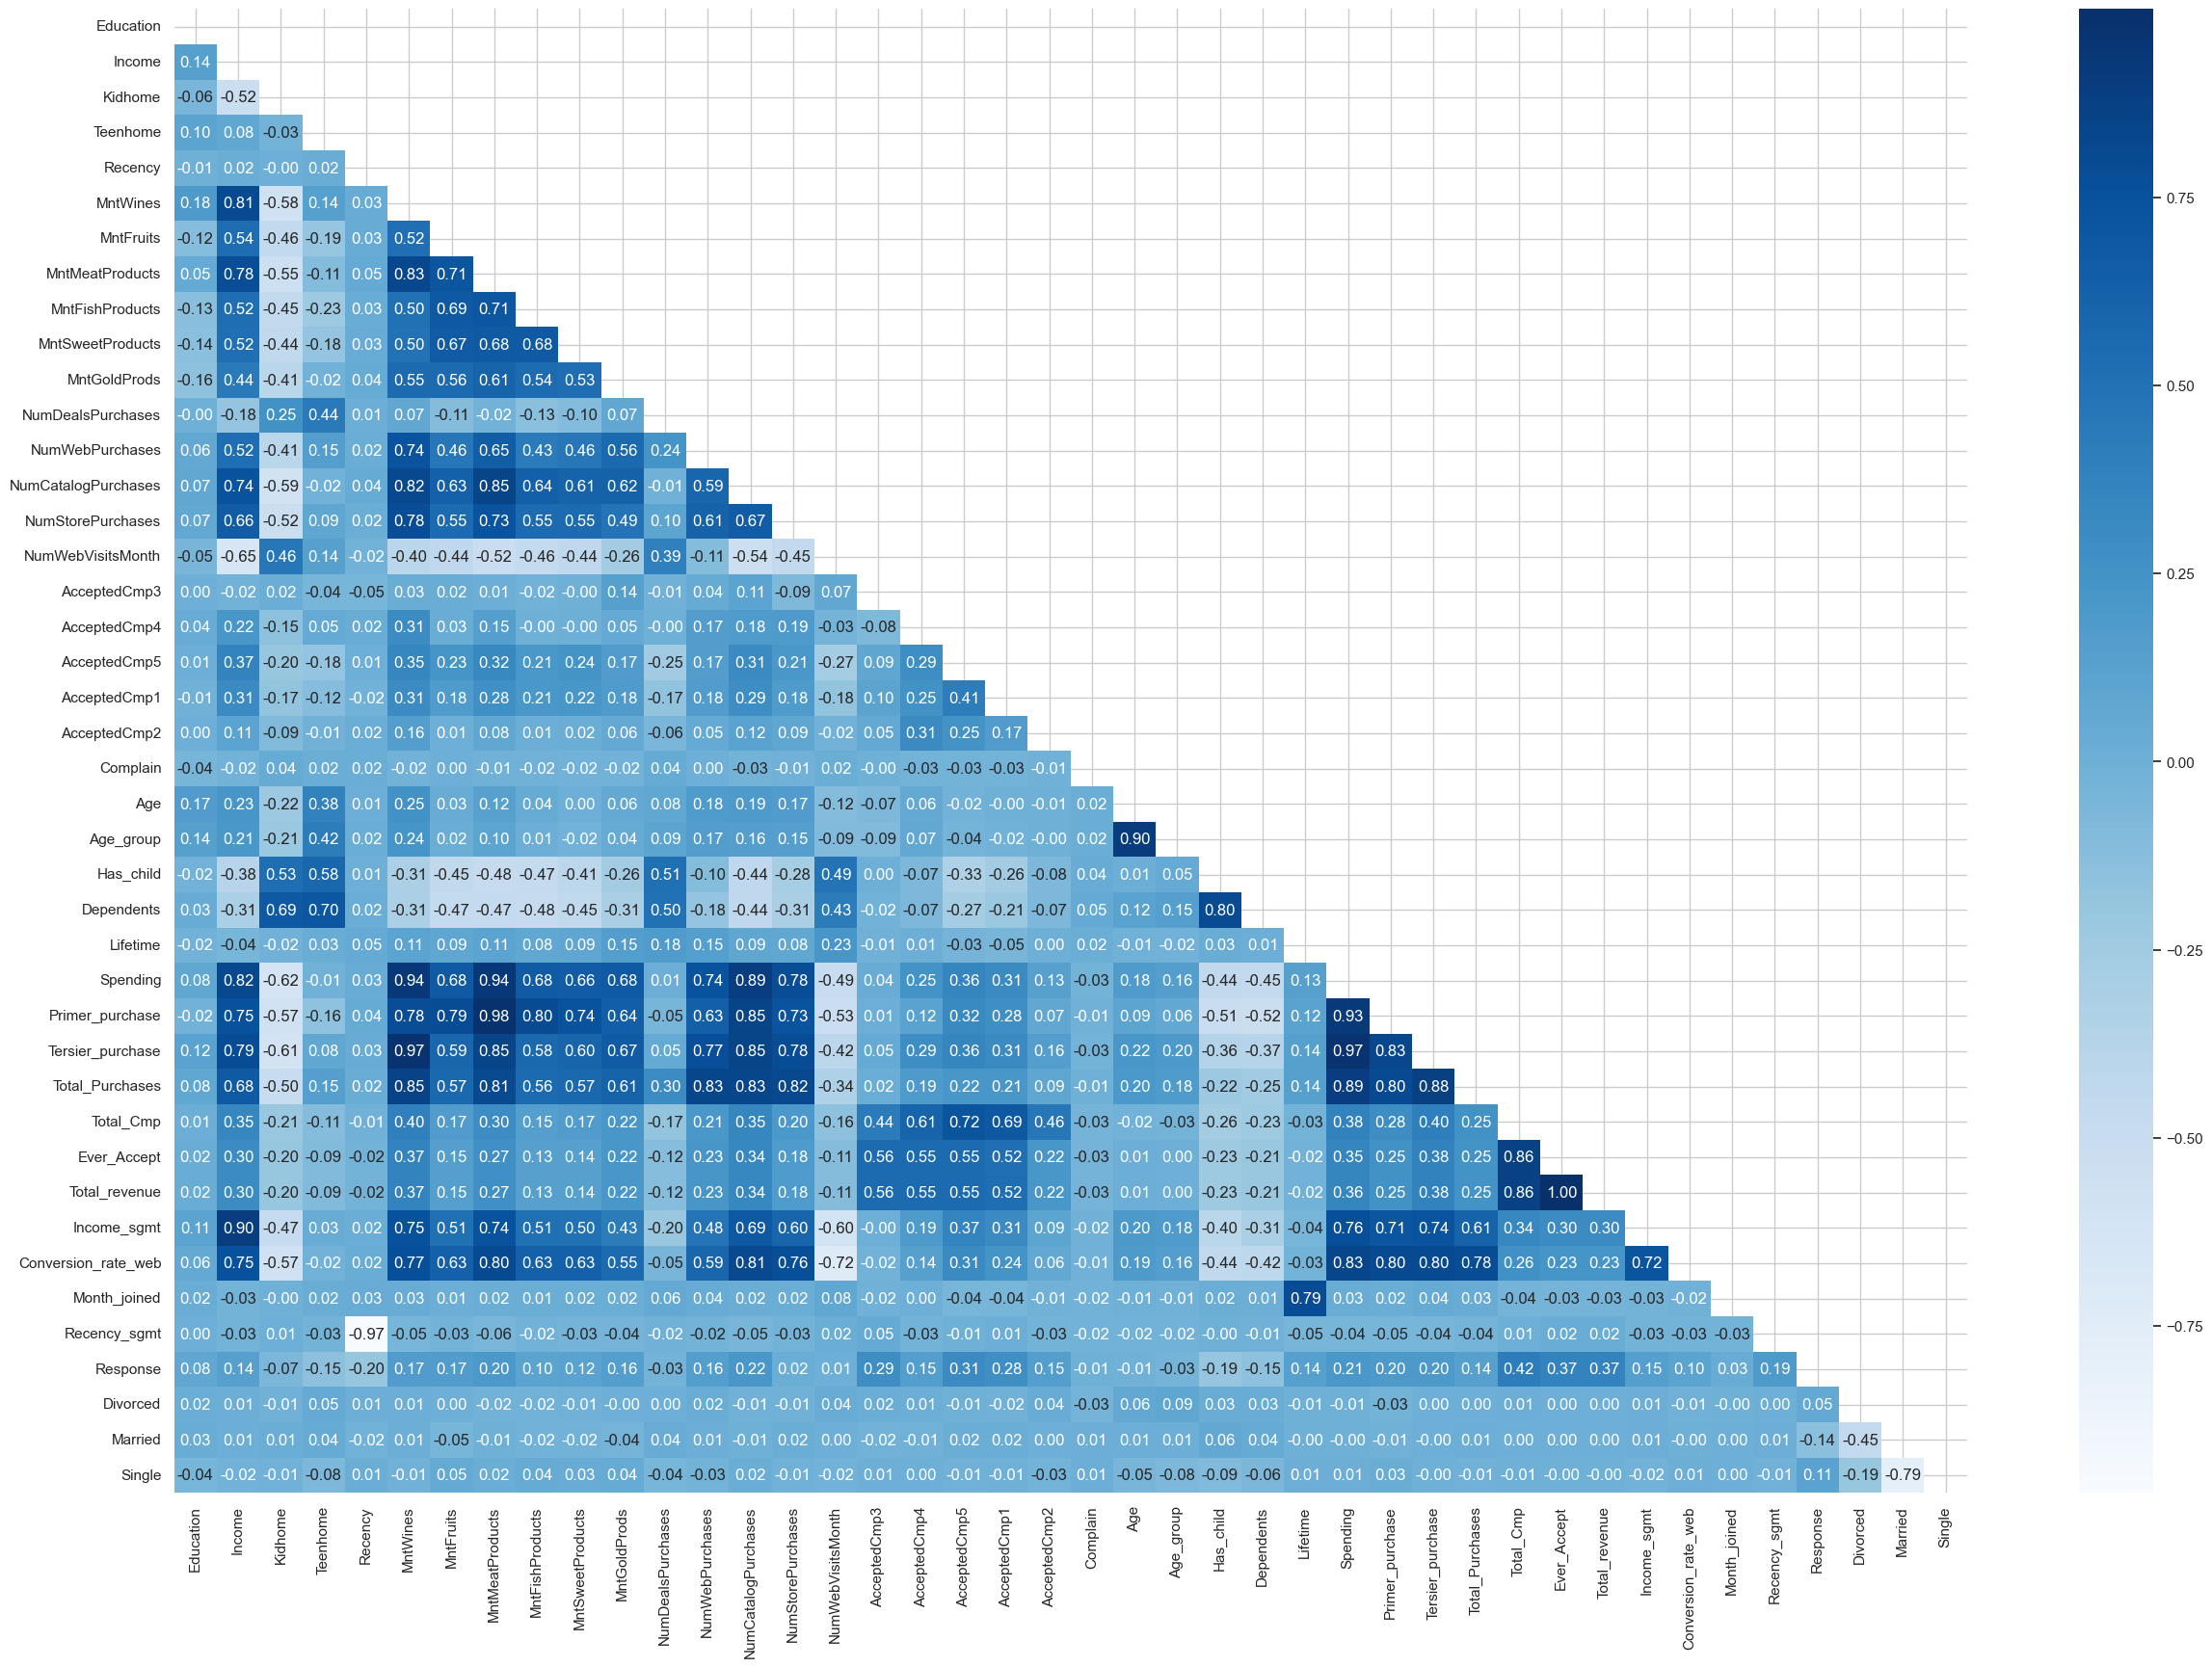

In [127]:
plt.figure(figsize=(30,20))
corr = df_train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

**Checking Correlation with Target (Response)**

In [128]:
corr = df_train.corrwith(df_train["Response"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr = corr.sort_values('corr value', ascending=False, ignore_index=True)
corr.head(10)

index  corr value Corr Type
0             Response           1   Positif
1            Total_Cmp       0.417   Positif
2        Total_revenue       0.371   Positif
3          Ever_Accept       0.370   Positif
4         AcceptedCmp5       0.312   Positif
5         AcceptedCmp3       0.286   Positif
6         AcceptedCmp1       0.283   Positif
7  NumCatalogPurchases       0.216   Positif
8             Spending       0.208   Positif
9      MntMeatProducts       0.203   Positif

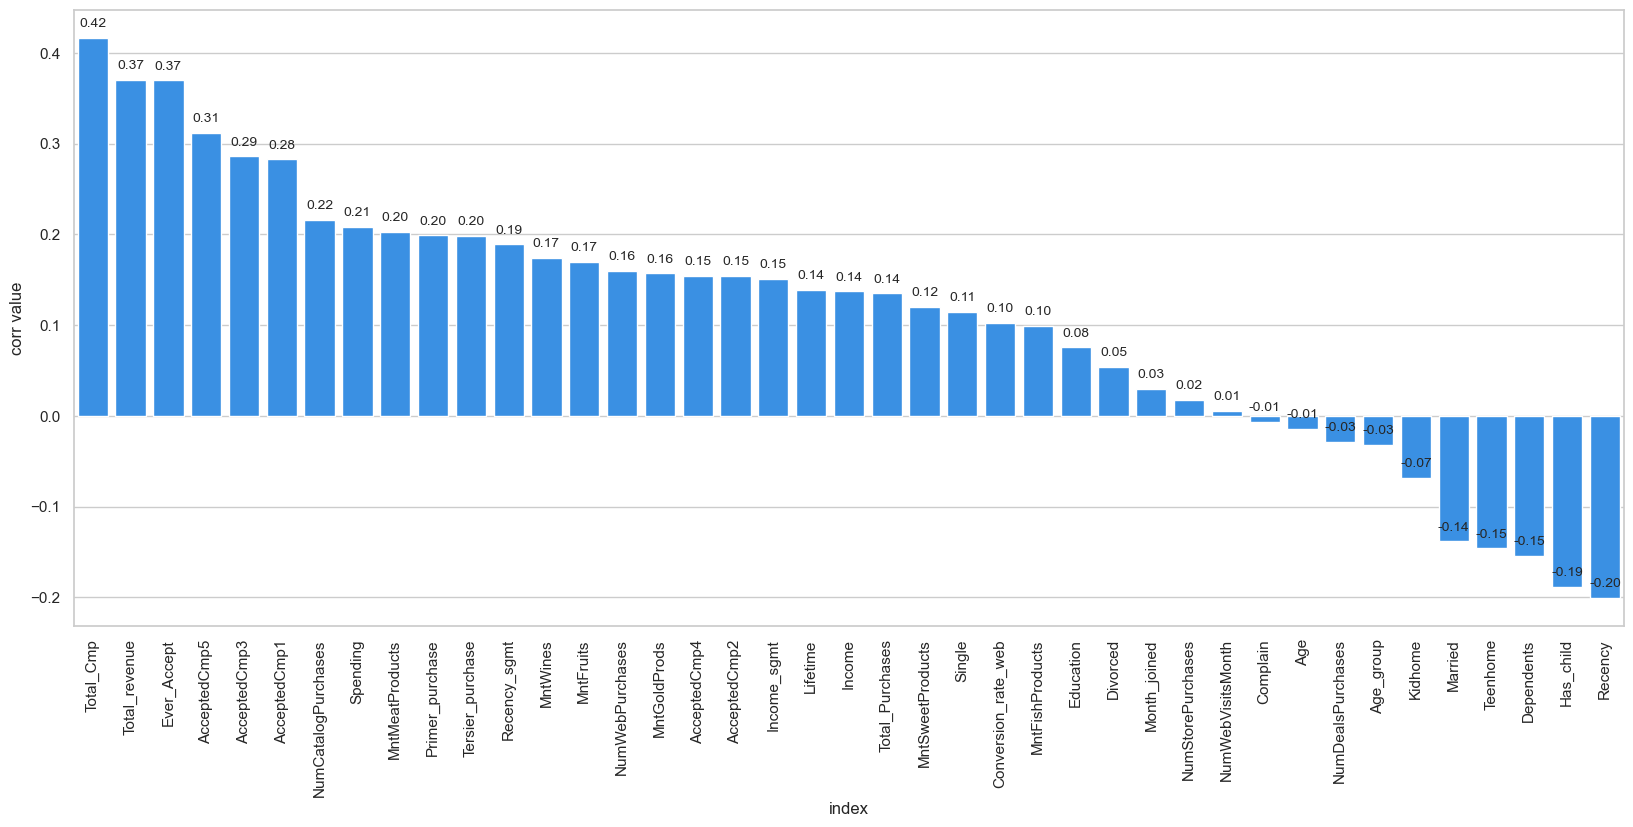

In [129]:
corr = df_train.corrwith(df_train["Response"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(20, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='dodgerblue')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 10), 
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

In [130]:
target = "Response"
high_corr_cols = [i for i in list(corr[corr["corr value"] > 0.15]["index"].values) if i != target]
print(high_corr_cols)

['Total_Cmp', 'Total_revenue', 'Ever_Accept', 'AcceptedCmp5', 'AcceptedCmp3', 'AcceptedCmp1', 'NumCatalogPurchases', 'Spending', 'MntMeatProducts', 'Primer_purchase', 'Tersier_purchase', 'Recency_sgmt', 'MntWines', 'MntFruits', 'NumWebPurchases', 'MntGoldProds', 'AcceptedCmp4', 'AcceptedCmp2', 'Income_sgmt']


Mengambil 20 top feature

In [131]:
for i in corr["index"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Recency',
 'Primer_purchase',
 'Tersier_purchase',
 'Recency_sgmt',
 'Has_child',
 'MntWines',
 'MntFruits',
 'NumWebPurchases',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp4',
 'Lifetime',
 'NumDealsPurchases',
 'Income',
 'Month_joined',
 'NumStorePurchases',
 'Age',
 'NumWebVisitsMonth',
 'MntSweetProducts',
 'MntFishProducts',
 'Total_Purchases',
 'Teenhome',
 'Married',
 'Education',
 'AcceptedCmp2',
 'Income_sgmt']

### **5. Multicollinearity Check (Drop Redundancy)**

- Multicollinearity means independent variables in a model are correlated.
- Multicollinearity among independent variables can reduce the performance of the model.
- Multicollinearity reduces the statistical significance of the independent variables.

Dari feature yang telah kita pilih dari gabungan Top 20 akan di lakukan pengecekan kembali melalui `redudansi antar feature`. Pada proses ini kita memilih antar feature yang memiliki korelasi diatas `threshold > 0.70`, yang kemudian akan di `bandingkan korelasinya dengan Target` untuk `drop salah satu feature`

#### **1. Correlation Coefficient**

<Axes: >

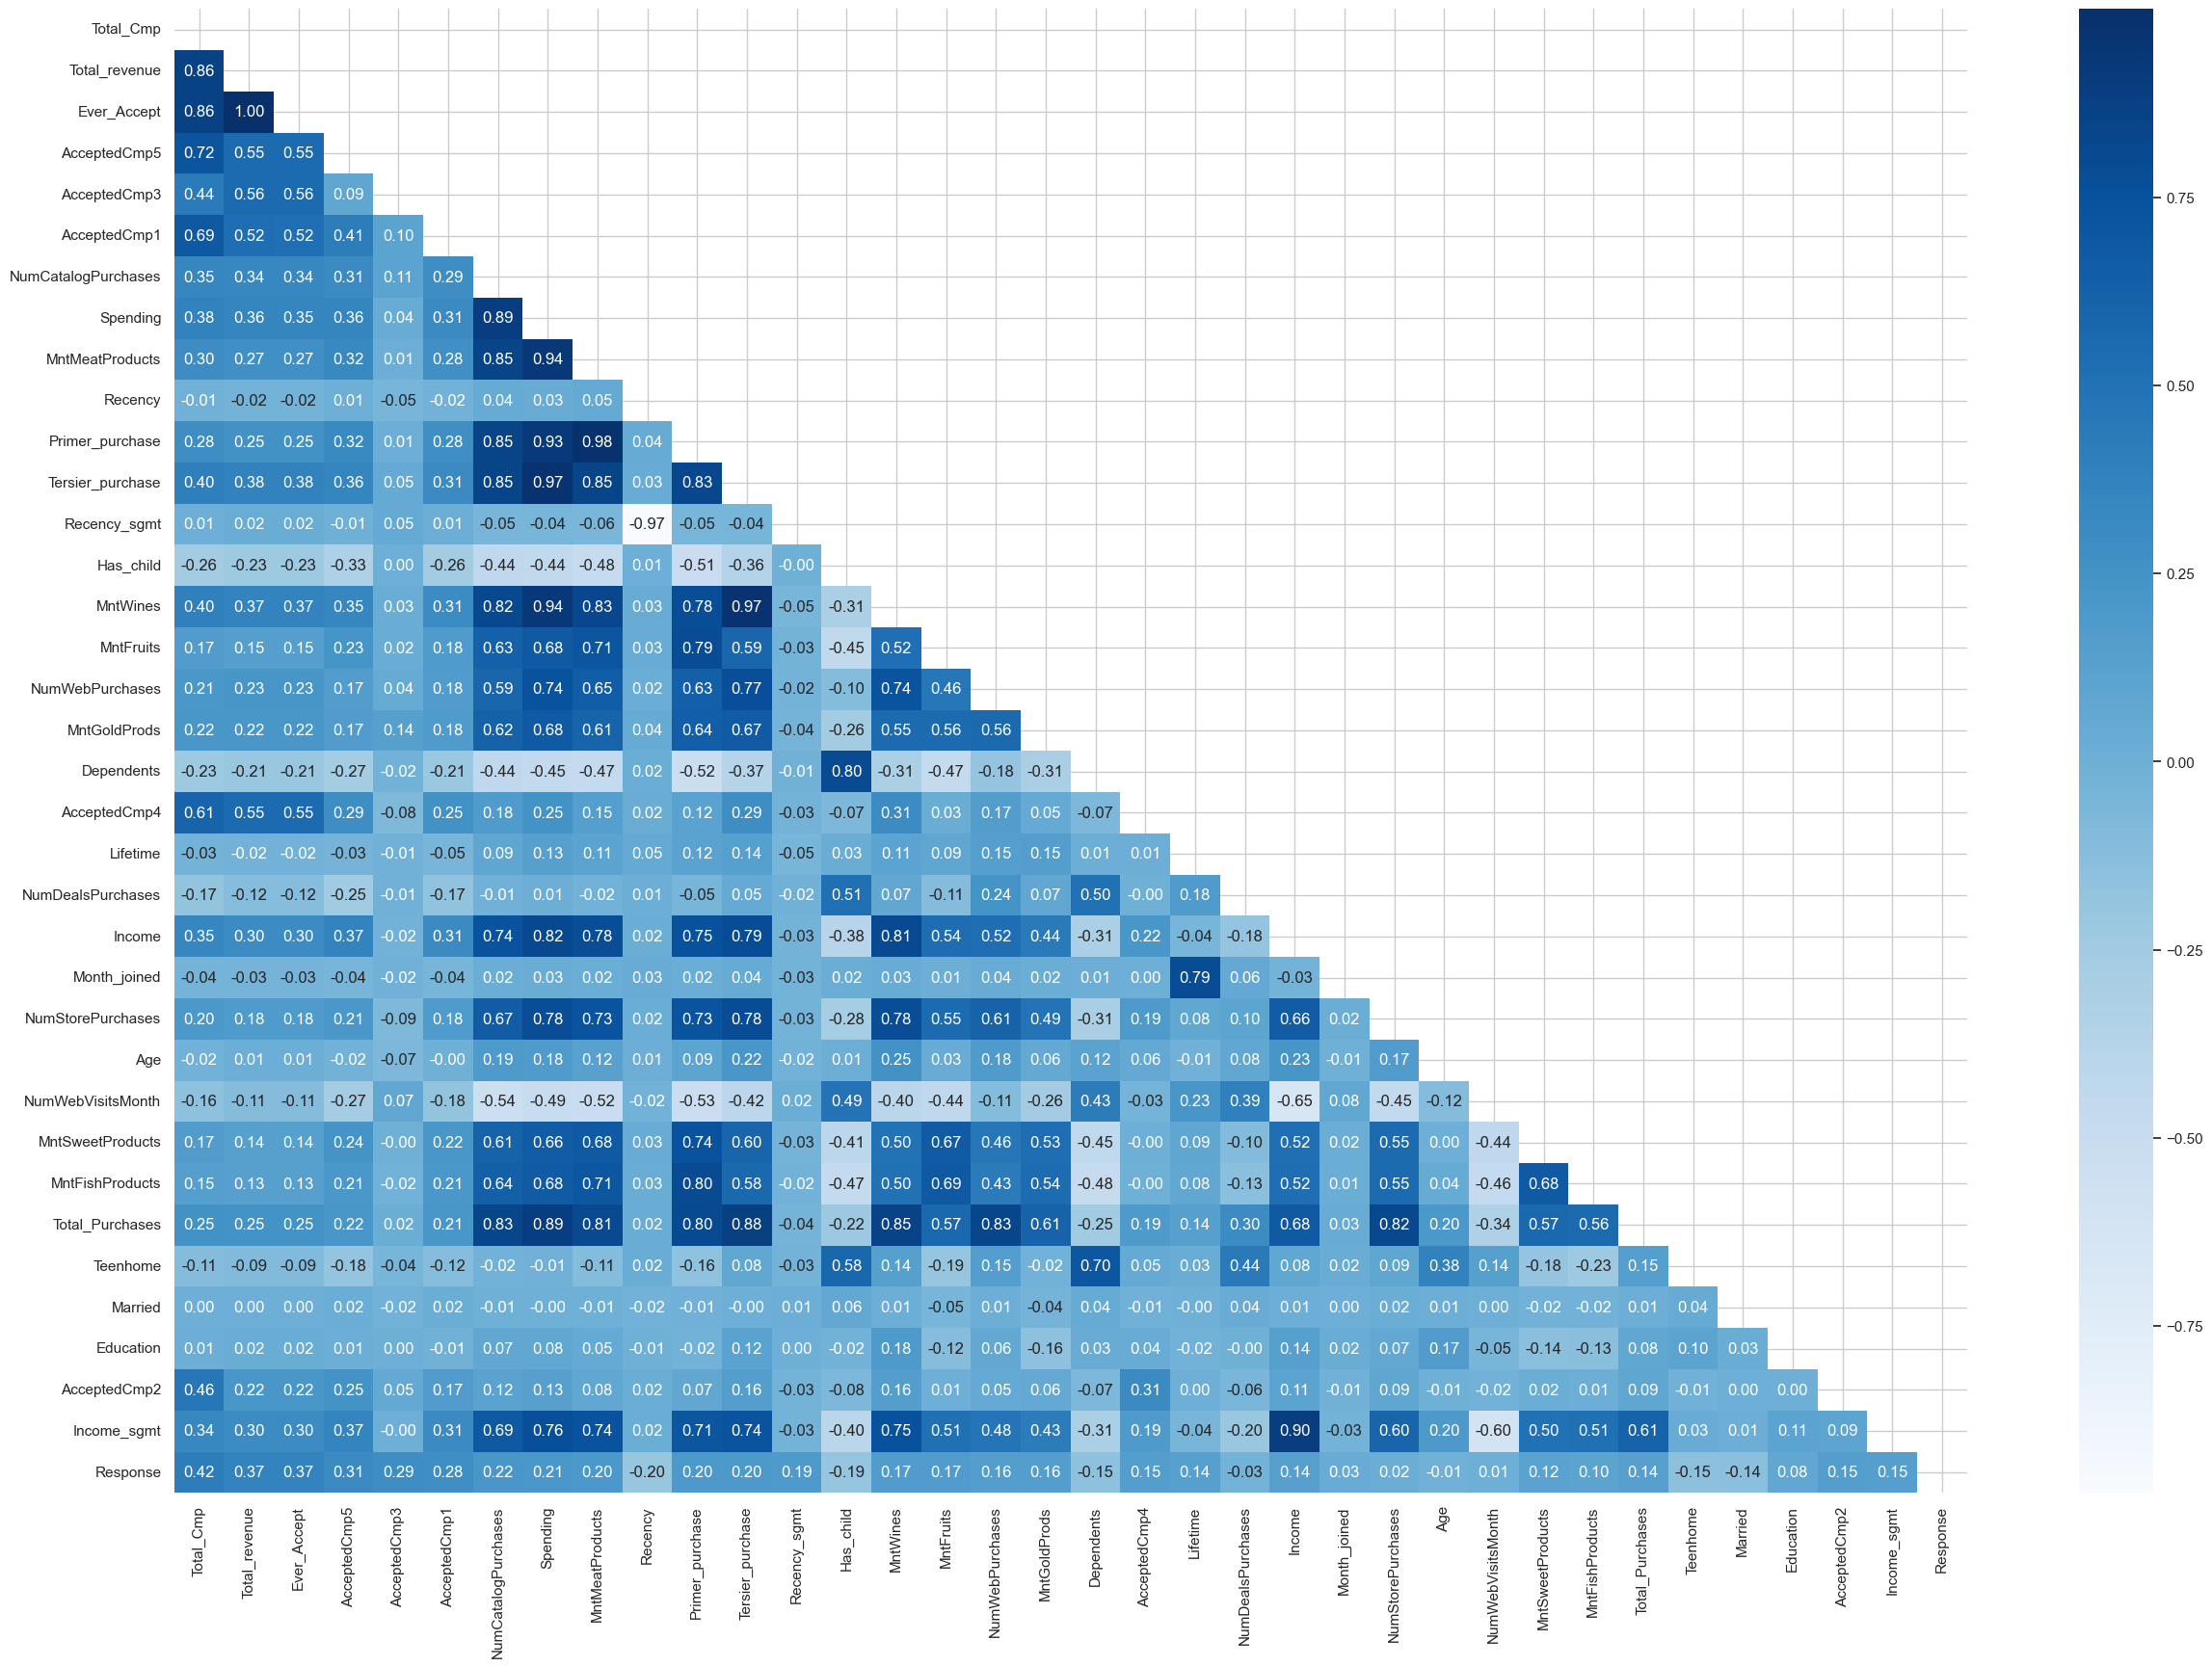

In [132]:
plt.figure(figsize=(30,20))
corr = df_train[feature_importance+["Response"]].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

**Manampilkan Korelasi Feature > Threshold 0.70**

Akan ada info mengenai Feature apa saja yang perlu di drop

In [133]:
def corrtarget(x):
    target = "Response"
    return df_train[x].corr(df_train[target])

def corrresp(x):
    target = "Response"
    col1 = x["A"]
    col2 = x["B"]
    
    cor1 = df_train[col1].corr(df_train[target])
    cor2 = df_train[col2].corr(df_train[target])
    
    if cor1 < cor2:
        return col1
    else:
        return col2
    return col1

In [134]:
corr_matrix = df_train[feature_importance].corr()
target = "Response"

# Flatten correlation matrix.
flat_cm = corr_matrix.stack().reset_index()
flat_cm.columns = ['A', 'B', 'correlation']    
flat_cm = flat_cm.loc[flat_cm.correlation < 1, :]
flat_cm = flat_cm.sort_values("correlation", ascending=False)
redundan = flat_cm[flat_cm["correlation"] >= 0.7].reset_index(drop=True)
redundan['A vs Target'] = redundan['A'].apply(lambda x: corrtarget(x))
redundan['B vs Target'] = redundan['B'].apply(lambda x: corrtarget(x))
redundan = redundan.drop_duplicates(subset=["correlation"])
redundan["drop"] = redundan.apply(corrresp, axis=1)
redundan

A                    B  correlation  A vs Target  \
0          Total_revenue          Ever_Accept        1.000        0.371   
2        MntMeatProducts      Primer_purchase        0.978        0.203   
4       Tersier_purchase             MntWines        0.975        0.199   
6               Spending     Tersier_purchase        0.970        0.208   
8               Spending      MntMeatProducts        0.938        0.208   
10              MntWines             Spending        0.935        0.174   
12       Primer_purchase             Spending        0.930        0.199   
14           Income_sgmt               Income        0.898        0.151   
16              Spending  NumCatalogPurchases        0.891        0.208   
18              Spending      Total_Purchases        0.890        0.208   
20      Tersier_purchase      Total_Purchases        0.880        0.199   
22         Total_revenue            Total_Cmp        0.865        0.371   
24             Total_Cmp          Ever_Accept        0.862        0.417   
26       Total_Purchases             MntWines        0.854        0.135   
28      Tersier_purchase  NumCatalogPurchases        0.852        0.199   
30       MntMeatProducts     Tersier_purchase        0.851        0.203   
32   NumCatalogPurchases      MntMeatProducts        0.847        0.216   
34   NumCatalogPurchases      Primer_purchase        0.846        0.216   
36       Total_Purchases      NumWebPurchases        0.834        0.135   
38   NumCatalogPurchases      Total_Purchases        0.831        0.216   
40       Primer_purchase     Tersier_purchase        0.830        0.199   
42       MntMeatProducts             MntWines        0.825        0.203   
44     NumStorePurchases      Total_Purchases        0.820        0.018   
46              Spending               Income        0.819        0.208   
48              MntWines  NumCatalogPurchases        0.818        0.174   
50       Total_Purchases      MntMeatProducts        0.815        0.135   
52              MntWines               Income        0.806        0.174   
54       Primer_purchase      Total_Purchases        0.803        0.199   
56       Primer_purchase      MntFishProducts        0.799        0.199   
58            Dependents            Has_child        0.797       -0.155   
60              Lifetime         Month_joined        0.791        0.139   
62                Income     Tersier_purchase        0.791        0.137   
64       Primer_purchase            MntFruits        0.790        0.199   
66      Tersier_purchase    NumStorePurchases        0.785        0.199   
68              MntWines    NumStorePurchases        0.784        0.174   
70     NumStorePurchases             Spending        0.784        0.018   
72       MntMeatProducts               Income        0.781        0.203   
74              MntWines      Primer_purchase        0.780        0.174   
76      Tersier_purchase      NumWebPurchases        0.771        0.199   
78              Spending          Income_sgmt        0.765        0.208   
80                Income      Primer_purchase        0.750        0.137   
82              MntWines          Income_sgmt        0.746        0.174   
84   NumCatalogPurchases               Income        0.741        0.216   
86       NumWebPurchases             Spending        0.740        0.160   
88       MntMeatProducts          Income_sgmt        0.739        0.203   
90      MntSweetProducts      Primer_purchase        0.738        0.120   
92      Tersier_purchase          Income_sgmt        0.738        0.199   
94              MntWines      NumWebPurchases        0.736        0.174   
96       MntMeatProducts    NumStorePurchases        0.734        0.203   
98     NumStorePurchases      Primer_purchase        0.731        0.018   
100         AcceptedCmp5            Total_Cmp        0.719        0.312   
102      Primer_purchase          Income_sgmt        0.711        0.199   
104            MntFruits      MntMeatProducts   

#### **2. VIF (Variance Inflation Factor)**

How do we calculate Multi-collinearity ?

This is where VIF (Variance Inflation Factor) come into the picture. The variance inflation factor (VIF) identifies the strength of correlation among the predictors (features).

Multicollinearity reduces the statistical significance of the independent variables. VIF is used to detect these variables. A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

<img src="https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/assets/54845293/31840298-732d-41dd-b9e8-1f07c31e0c7d"  width="200" height="50">

VIF value will always be greater than 1. Here are some rules for VIF

- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.

If all the independent variables are orthogonal to each other, then VIF = 1.0. If there is perfect correlation, then VIF = infinity.

In [135]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(df_train[feature_importance])

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df['vif_score'] = round(vif_df['vif_score'], 4)
vif_df.sort_values("vif_score", ascending=False, inplace=True)
vif_df

feature  vif_score
1             Total_Cmp        inf
5          AcceptedCmp3        inf
34         AcceptedCmp2        inf
6          AcceptedCmp1        inf
20         AcceptedCmp4        inf
4          AcceptedCmp5        inf
2         Total_revenue 329945.657
3           Ever_Accept 323924.544
8              Spending    188.426
12     Tersier_purchase    152.886
11      Primer_purchase    144.308
9       MntMeatProducts     70.694
15             MntWines     62.794
30      Total_Purchases     28.100
13         Recency_sgmt     18.331
10              Recency     18.306
7   NumCatalogPurchases      9.925
23               Income      9.171
17      NumWebPurchases      6.785
25    NumStorePurchases      6.755
35          Income_sgmt      5.570
19           Dependents      5.426
29      MntFishProducts      5.242
16            MntFruits      4.121
18         MntGoldProds      3.660
21             Lifetime      3.604
14            Has_child      3.564
31             Teenhome      3.540
22    NumDealsPurchases      3.439
27    NumWebVisitsMonth      3.266
28     MntSweetProducts      3.219
24         Month_joined      3.073
26                  Age      1.340
33            Education      1.261
32              Married      1.019

**Drop Redundant Features**

In [136]:
hold = ["Income"]
for i in list(redundan["drop"].unique()):
    if i not in hold:
        feature_importance.remove(i)
    
feature_importance = sorted(feature_importance)
feature_importance

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'Age',
 'Education',
 'Income',
 'Lifetime',
 'Married',
 'MntGoldProds',
 'NumCatalogPurchases',
 'NumDealsPurchases',
 'NumWebVisitsMonth',
 'Recency',
 'Recency_sgmt',
 'Teenhome',
 'Total_Cmp']

### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan feature selection :
- Drop Unnecessary Feature
- Univariate Selection
    - Anova F-value
    - Variance Threshold
    - Mutual Information
    - SelectKBest
- Feature Importance
- Pearson Correlation
- Multicollinearity Check (Drop Redundancy)

Maka telah didapatkan feature yang akan digunakan pada proses modelling sebagai berikut :

In [137]:
df_train[feature_importance].head()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4    Age  Education  \
0             0             0             0             0 -0.552          0   
1             0             0             0             0 -1.009          1   
2             0             0             0             0 -0.199          3   
3             0             0             0             0 -0.027          3   
4             0             0             0             0 -0.027          3   

   Income  Lifetime  Married  MntGoldProds  NumCatalogPurchases  \
0  -2.354     1.417        1        -0.287               -1.340   
1  -0.947     1.192        1        -1.150               -1.340   
2   0.425     0.312        1        -2.117                0.808   
3   0.421     0.480        1        -2.117               -0.378   
4  -0.713    -1.141        0        -0.202               -0.378   

   NumDealsPurchases  NumWebVisitsMonth  Recency  Recency_sgmt  Teenhome  \
0             -0.837              1.059    0.410             2         0   
1              0.738              1.059    0.348             2         0   
2             -0.837             -1.863    0.030             2         0   
3             -0.837             -0.936   -0.710             3         1   
4             -0.837             -1.384   -0.413             3         0   

   Total_Cmp  
0          0  
1          0  
2          0  
3          0  
4          0

## **📌 Handling Imbalanced Data**

Status risiko highly imbalanced, dengan 15% Response dan 85% No Response. Itu sebabnya diperlukan resampling.

**Note**: Saat menerapkan  machine learning algorithms dengan data yang tidak seimbang, model yang diperoleh akan lebih condong ke kelas mayoritas. Artinya model akan memprediksi kelas mayoritas bukan kelas minoritas.

Jika kita ingin melakukan klasifikasi, maka seharusnya melakukan `stratified train_test_split` terlebih dahulu untuk menjaga ketidakseimbangannya (imbalance). Sehingga dataset test dan train memiliki distribusi yang sama, kemudian jangan pernah menyentuh test set lagi. Kemudian lakukan pengambilan sampel ulang hanya pada data train.

**Summary** : You must apply `SMOTE` after splitting into `training and test`, not before. Doing SMOTE before is bogus and defeats the purpose of having a separate test set.

**Separate Dataset Xy Train Test**

In [138]:
X_train = df_train.drop(['Response'], axis=1)[feature_importance].reset_index(drop=True) #features
y_train = df_train['Response'].reset_index(drop=True) #target
print(X_train.shape, y_train.shape)

(1679, 17) (1679,)


In [139]:
X_test = df_test.drop(['Response'], axis=1)[feature_importance].reset_index(drop=True) #features
y_test = df_test['Response'].reset_index(drop=True) #target
print(X_test.shape, y_test.shape)

(560, 17) (560,)


In [140]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

In [141]:
X.shape

(2239, 17)

In [142]:
y.shape

(2239,)

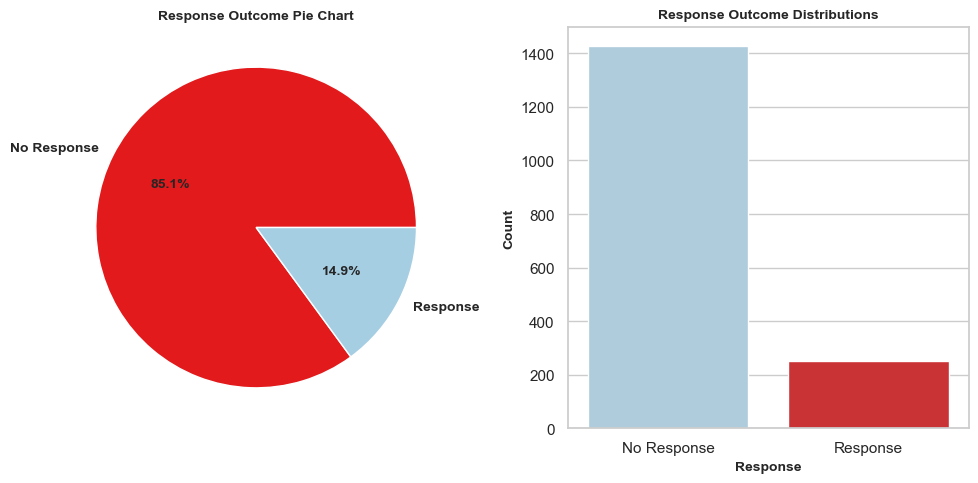

In [143]:
fig = plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.pie(y_train.value_counts(),
        labels = ['No Response', 'Response'], 
        autopct = '%.1f%%', 
        radius = 1, 
        colors=["#e31a1c", "#a6cee3"],
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Response Outcome Pie Chart', fontsize = 10, fontweight = 'bold')

plt.subplot(122)
resp = y_train.apply(lambda x: "No Response" if x == 0 else "Response")
t = sns.countplot(x=resp, palette=["#a6cee3", "#e31a1c"])
t.set_xlabel('Response', fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)

plt.title('Response Outcome Distributions', fontsize = 10, fontweight = 'bold')
plt.tight_layout()

In [144]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # Response
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # No Response

# Undersampling
# us = RandomUnderSampler(sampling_strategy = 0.5)
# X_balanced_res, y_balanced_res = us.fit_resample(X_train,y_train)

# Oversampling
# os = RandomOverSampler(sampling_strategy = 0.5)
# X_balanced_res, y_balanced_res = os.fit_resample(X_train,y_train)

# Oversampling SMOTE
sm = SMOTE(sampling_strategy=0.5, random_state = 2)
X_balanced_res, y_balanced_res = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_balanced_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_balanced_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced_res == 0)))

X_train = X_balanced_res
y_train = y_balanced_res

Before OverSampling, the shape of X_train: (1679, 17)
Before OverSampling, the shape of y_train: (1679,) 

Before OverSampling, counts of label '1': 251
Before OverSampling, counts of label '0': 1428 

After OverSampling, the shape of X_train: (2142, 17)
After OverSampling, the shape of y_train: (2142,) 

After OverSampling, counts of label '1': 714
After OverSampling, counts of label '0': 1428


# **====== STAGE 3 ======**
`Stage 3 (ML Modelling & Evaluation)`

# **🔥 Modelling & Evaluation 🔥**

## **📌 Machine Learning Techniques**

Here are some algorithms that will be tested to determine the best model to predict customer response in Marketing Campign:
1. Decision Tree
2. Random Forest
3. Logistic Regression
4. Gaussian Naive Bayes
5. K-Nearest Neighbor
6. MLP Classifier (Neural Network)
7. Adaboost Classifier
8. XGBoost Classifier
9. Gradient Boosting Classifier
10. Support Vector Machine

**Target Explanation**

> * `True Positive (TP)`, when a case was positive and predicted positive
> * `False Positive (FP)`, when a case was negative but predicted positive
> * `True Negative (TN)`, when a case was negative and predicted negative
> * `False Negative (FN)`, when a case was positive but predicted negative

> * `Positive / 1` = Customer yang Response
> * `Negative / 0` = Customer yang tidak Response

> * `False Negative` = Customer yang Response tetapi diprediksi tidak Response
> * `False Positive` = Customer yang tidak Response tetapi diprediksi Response

**Parameter Evaluasi Model**

- `Precision` as Primary Parameter Evaluation

    - Meningkatkan Response Rate dan Cost Marketing
    - Mereduksi False Positif (Customer yang diprediksi akan merespon, namun kenyataannya tidak)

- `Recall` as Secondary Parameter Evaluation

    - Mengoptimalkan Revenue Rate
    - Mereduksi False Negative (Customer yang diprediksi tidak mengikuti campaign, namun pada kenyataannya berkeinginan ikut campaign)
    
- `F1 Score` for check positif and negative score (Imbalance Data). Sama pentingnya untuk masalah kita, kita membutuhkan trade-off antara Precision dan Recall, oleh karena itu, kami menggunakan skor f1 sebagai metrik. Skor f1 didefinisikan sebagai rata-rata harmonik dari Precision dan Recall.

**Interpretation**

- `Precision` – What percent of your predictions were correct? :

    Dari test data yang diprediksi positif (Response), berarti x% yg sesungguhnya positif (Response)

- `Recall` – What percent of the positive cases did we catch? :

    Dari semua yang sebenarnya positif (Response), yang berhasil diprediksi positif (Response) x%

**`Target Metrics` =  `Precision` / `Recall` & `F1 Score`**

- `Precision` adalah rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf. Pilih algoritma yang memiliki `Precision` tinggi, jika skenario yang dipilih adalah `False Negative lebih baik terjadi daripada False Positif`.

    `Precission = (TP) / (TP+FP)`

- `Recall` adalah rasio kasus dengan prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Pilih algoritma yang memiliki `Recall` tinggi, jika skenario yang dipilih adalah `False Positive lebih baik terjadi daripada False Negative`.
    
    `Recall = (TP) / (TP + FN)`

- `F1-Score` atau dikenal juga dengan nama F-Measure didapatkan dari perbandingan rata-rata presisi dengan recall yang dibobotkan

    `F1 Score = 2 * (Recall*Precission) / (Recall + Precission)`


**Description Classification Report :**

It is a python method under sklearn metrics API, useful when we need class-wise metrics alongside global metrics. It provides precision, recall, and F1 score at individual and global levels. 

* The `precision` will be "how many are correctly classified among that class" ( Percentage of correct positive predictions relative to total positive predictions.)

* The `recall` means "how many of this class you find over the whole number of element of this class". (Percentage of correct positive predictions relative to total actual positives.)

* The `f1-score` is the harmonic mean between precision & recall. The closer to 1, the better the model.

* The `support` is the number of occurence of the given class in dataset. These values simply tell us how many players belonged to each class in the test dataset. (to check balanced dataset/Proportion)

* `Accuracy` is The sum of the true positives and true negatives over the total number of samples.

* `Macro Average` is The mean average of the precision/recall/F1-score of all the classes.

* `Weighted Average` is Calculates the scores for each class independent of one another but when it adds them together it takes into account the number of true classifications of each class.


**References**

- https://rey1024.medium.com/mengenal-accuracy-precission-recall-dan-specificity-serta-yang-diprioritaskan-b79ff4d77de8
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- https://www.statology.org/sklearn-classification-report/
- https://muthu.co/understanding-the-classification-report-in-sklearn/#:~:text=A%20Classification%20report%20is%20used,classification%20report%20as%20shown%20below.

In [145]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.svm import SVC # Support Vector Machine/Classifier
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting
from xgboost import XGBClassifier #xgboost
from sklearn.ensemble import AdaBoostClassifier #Adaboost

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve #roc score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
import shap

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

import re
import warnings
warnings.filterwarnings('ignore')

## **📌 Function for Model Evaluation**

In [146]:
train_classifier_list = []
train_modelname_list = []
train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_score_list= [] 
train_roc_auc_score_list = []
train_cross_val_f1_list = []
train_cross_val_rocauc_list = []

test_classifier_list = []
test_modelname_list = []
test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_score_list= [] 
test_roc_auc_score_list = []
test_cross_val_f1_list = []
test_cross_val_rocauc_list = []

In [147]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
X_s, y_s = shuffle(X, y, random_state=42)
kf = KFold(10, shuffle=True, random_state=0)

- Function Evaluation for Recap Classification

In [148]:
def eval_classification(model, model_name, save=True):
    # predict train
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)
    
    # predict test
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)
    
    # cross validation
    cv_score_f1 = cross_validate(model, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    cv_score_rocauc = cross_validate(model, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    
    
    accuracy_train = round(accuracy_score(y_train, y_train_pred), 3)
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    f1_s_train = round(f1_score(y_train, y_train_pred), 3)
    csf_score_train = round(cv_score_f1['train_score'].mean(), 3)
    rocauc_score_train = round(roc_auc_score(y_train, y_train_pred_prob[:, 1]), 3)
    csr_score_train = round(cv_score_rocauc['train_score'].mean(), 3)
    
    accuracy_test = round(accuracy_score(y_test, y_test_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
    f1_s_test = round(f1_score(y_test, y_test_pred), 3)
    csf_score_test = round(cv_score_f1['test_score'].mean(), 3)
    rocauc_score_test = round(roc_auc_score(y_test, y_test_pred_prob[:, 1]), 3)
    csr_score_test = round(cv_score_rocauc['test_score'].mean(), 3)
    
    if save :
    
        # save report detail train
        train_classifier_list.append(model)
        train_modelname_list.append(model_name)
        train_accuracy_list.append(accuracy_train)
        train_precision_list.append(precision_train)
        train_recall_list.append(recall_train)
        train_f1_score_list.append(f1_s_train)
        train_cross_val_f1_list.append(csf_score_train)
        train_roc_auc_score_list.append(rocauc_score_train)
        train_cross_val_rocauc_list.append(csr_score_train)

        # save report detail test
        test_classifier_list.append(model)
        test_modelname_list.append(model_name)
        test_accuracy_list.append(accuracy_test)
        test_precision_list.append(precision_test)
        test_recall_list.append(recall_test)
        test_f1_score_list.append(f1_s_test)
        test_cross_val_f1_list.append(csf_score_test)
        test_roc_auc_score_list.append(rocauc_score_test)
        test_cross_val_rocauc_list.append(csr_score_test)
    
    
    metrics_summary = pd.DataFrame({
        'Evaluation Metrics' : ["Accuracy", "Precision", "Recall", "F1 Score", "F1 Score (crossval)", "ROC AUC", "ROC AUC (crossval)"],
        'Train' : [accuracy_train, precision_train, recall_train, f1_s_train, csf_score_train, rocauc_score_train, csr_score_train],
        'Test' : [accuracy_test, precision_test, recall_test, f1_s_test, csf_score_test, rocauc_score_test, csr_score_test]})
    
    metrics_summary["Diff Range"] = metrics_summary['Train'] - metrics_summary['Test']
    return metrics_summary.reset_index(drop = True).style.background_gradient(cmap='Purples')
    
# define function to see the best tuning hyperparameter 
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

- Function Evaluation for Training

In [149]:
def model_eval_train(classifier, model_name, X_train, y_train):
    # predict data train
    y_train_pred = classifier.predict(X_train)
    y_train_pred_prob = classifier.predict_proba(X_train)

    # print classification report
    print('Classification Report Training Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_train, y_train_pred), 3)
    precision = round(precision_score(y_train, y_train_pred), 3)
    recall = round(recall_score(y_train, y_train_pred), 3)
    f1_s = round(f1_score(y_train, y_train_pred), 3)
    rocauc_score = round(roc_auc_score(y_train, y_train_pred_prob[:, 1]), 3)
    
    # c_val_score = round(cross_val_score(classifier, X_s, y_s, cv=kf, scoring='roc_auc').mean()  , 3)
    cv_score_f1 = cross_validate(classifier, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['train_score'].mean(), 3)
    
    cv_score_rocauc = cross_validate(classifier, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['train_score'].mean(), 3)
    
    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')

    print(classification_report(y_train, y_train_pred))

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Response', 'Response'), ('No Response', 'Response'))
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

    print("==== Actual Data (Train) =====")
    print("Total =", len(y_train))
    print("No Response =", len(y_train[y_train == 0]))
    print("Response =", len(y_train[y_train == 1]))
    print("==== Predicted Data (Train) =====")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])
    
    c_matrix = confusion_matrix(y_train, y_train_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Greens')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Training Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_train, y_train_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Customer Purchase Deposit')
    plt.legend(loc="lower right")
    plt.show()

- Function Evaluation for Testing

In [150]:
def model_eval_test(classifier, model_name, X_test, y_test):

     # predict data test
    y_test_pred = classifier.predict(X_test)
    y_test_pred_prob = classifier.predict_proba(X_test)
    

    # print classification report
    print('Classification Report Testing Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_test, y_test_pred), 3)
    precision = round(precision_score(y_test, y_test_pred), 3)
    recall = round(recall_score(y_test, y_test_pred), 3)
    f1_s = round(f1_score(y_test, y_test_pred), 3)
    rocauc_score = round(roc_auc_score(y_test, y_test_pred_prob[:, 1]), 3)
    
    # c_val_score = round(cross_val_score(classifier, X_s, y_s , cv=kf , scoring='roc_auc').mean()  , 3)
    cv_score_f1 = cross_validate(classifier, X_s, y_s, cv=kf, scoring='f1', return_train_score=True)
    csf_score = round(cv_score_f1['test_score'].mean(), 3)
    
    cv_score_rocauc = cross_validate(classifier, X_s, y_s, cv=kf, scoring='roc_auc', return_train_score=True)
    csr_score = round(cv_score_rocauc['test_score'].mean(), 3)
    
    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F1 Score = {f1_s}')
    print(f'Cross Val F1 (k=5) = {csf_score}')
    print(f'ROC AUC = {rocauc_score}')
    print(f'Cross Val ROC AUC (k=5) = {csr_score}\n')
    
    print(classification_report(y_test, y_test_pred))

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Response', 'Response'), ('No Response', 'Response'))
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

    print("==== Actual Data (Test) =====")
    print("Total =", len(y_test))
    print("No Response =", len(y_test[y_test == 0]))
    print("Response =", len(y_test[y_test == 1]))
    print("==== Predicted Data (Test) =====")
    print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])
    
    c_matrix = confusion_matrix(y_test, y_test_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Oranges')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Testing Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('Actual Label', fontsize=13)
    plt.xlabel('\nPredicted Label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob[:, 1])
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Customer Purchase Deposit')
    plt.legend(loc="lower right")
    plt.show()

- Function Plotting Feature Importance

In [151]:
def feature_importance_plot(classifier, model_name, X_train=None):
    
    model_name = re.sub('\s*\(\w*\)\s*', '', model_name)
    
    # important features
    # K-Nearest Neighbors/MLP Classifier = No Function/Method to Check Feature Importance
    if model_name == "Logistic Regression":
        # Logistic Regression
        imp = pd.DataFrame(data={
            'Attribute': X_train.columns,
            'Importance': log_model.coef_[0]
        })
        imp = imp.sort_values(by='Importance', ascending=False).set_index("Attribute")
        ft_imp = imp["Importance"]
    elif model_name in ["Naive Bayes", "K-Nearest Neighbors", "MLP Classifier", "Support Vector Machine"]:
        imp = pd.DataFrame(data={
            'Attribute': X_train.columns,
            'Importance': permutation_importance(classifier, X_test, y_test).importances_mean
        })
        imp = imp.sort_values(by='Importance', ascending=False).set_index("Attribute")
        ft_imp = imp["Importance"]
    else: 
        # Decision Tree
        # Random Forest
        # XGBoost Classifier
        # Gradient Boosting Classifier
        ft_imp = classifier.feature_importances_

    importances = pd.Series(ft_imp, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(10,7))
    fig = importances.plot(kind ='barh', color='#7faadb', width=0.8)
    plt.title('Features Importance Plot '+model_name+'\n', fontsize=14)

    # Annotate every single Bar with its value, based on it's width   
    N = len(importances)
    thickness = range(1, N+1)
    thick_sum = sum(thickness) 
    barmax = max(importances) 
    for i, p in enumerate(fig.patches):
            fig.annotate("%.2f" % (p.get_width()),
                        (p.get_x() + p.get_width(), p.get_y() + 1),
                        xytext=(5, 15), textcoords='offset points')
            fig.set_ylim(N, -1)
            fig.set_xlim(0,barmax*1.4)

    fig.figure.tight_layout()
    plt.show()

- Function Plotting SHAP

In [152]:
def shap_plot(model, model_name, data=None):
    
    model_name = re.sub('\s*\(\w*\)\s*', '', model_name)
    
    tree = ["Decision Tree", "Random Forest", 
            "XGBoost Classifier", "Gradient Boosting Classifier"]

    shap.initjs()
    
    if model_name in tree:
        
        if model_name in ["XGBoost Classifier", "Gradient Boosting Classifier"] :
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(data)
            expected = explainer.expected_value
        else:
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(data)[1]
            expected = explainer.expected_value[1]
        

        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        shap.summary_plot(shap_values, data, show = False) 
        ax1 = fig.add_subplot(122)
        shap.summary_plot(shap_values, data, plot_type='bar', show = False, cmap = "plasma")
        plt.gcf().set_size_inches(20,8)
        plt.tight_layout() 
        plt.show()

        return shap.force_plot(expected, shap_values[0], data.iloc[0,:], plot_cmap = "PkYg", show = False)

    else :
        explainer = shap.Explainer(model.predict, data)
        shap_values = explainer(data)

        fig = plt.figure()
        ax0 = fig.add_subplot(121)
        shap.summary_plot(shap_values.values, data, show = False) 
        ax1 = fig.add_subplot(122)
        shap.summary_plot(shap_values.values, data, plot_type='bar', show = False, cmap = "plasma")
        plt.gcf().set_size_inches(20,8)
        plt.tight_layout() 
        plt.show()

        return shap.force_plot(shap_values.base_values[0], shap_values.values[0], data.iloc[0,:], plot_cmap = "PkYg", show = False)

## **📌 Modelling**

Pada tahap awal modelling ini, kami  menggunakan beberapa algoritma Machine Learning. Harapannya agar output model comparison yang dihasilkan lebih kaya dan decision yang dipilih lebih akurat.

### **1. Decision Tree**

Decision tree membagi data berdasarkan serangkaian keputusan yang dibuat pada fitur-fitur. Setiap node internal pada pohon keputusan mewakili keputusan berdasarkan fitur-fitur tersebut, sedangkan daun pohon mewakili label atau kelas hasil klasifikasi.

In [153]:
# train the model
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
print(dt_model)
eval_classification(dt_model, "Decision Tree")

DecisionTreeClassifier(random_state=42)


**Observation:** 
- Precision dan Recall memiliki gap cukup besar >0.40
- F1 Score test dengan gap cukup besar > 0.50

#### **Performance of Training Model**

Classification Report Training Model (Decision Tree):

Accuracy = 0.997
Precision = 1.0
Recall = 0.99
F1 Score = 0.995
Cross Val F1 (k=5) = 0.972
ROC AUC = 1.0
Cross Val ROC AUC (k=5) = 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1428
           1       1.00      0.99      1.00       714

    accuracy                           1.00      2142
   macro avg       1.00      1.00      1.00      2142
weighted avg       1.00      1.00      1.00      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 707, FP = 0, TN = 1428, FN = 7
Predictly Correct = 2135
Predictly Wrong = 7 



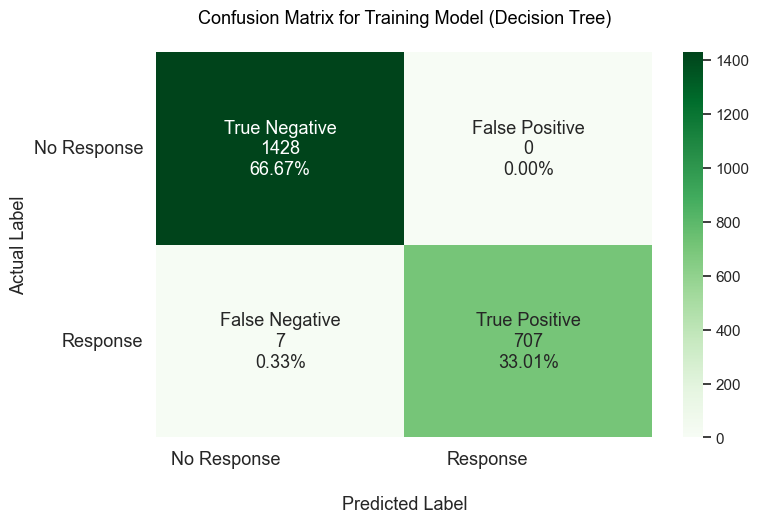

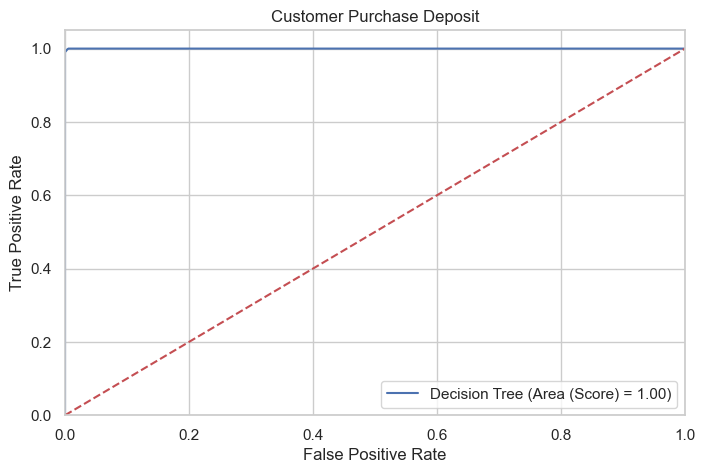

In [154]:
model_eval_train(dt_model, "Decision Tree", X_train, y_train)

#### **Performance of Testing Model**

Classification Report Testing Model (Decision Tree):

Accuracy = 0.838
Precision = 0.456
Recall = 0.494
F1 Score = 0.474
Cross Val F1 (k=5) = 0.488
ROC AUC = 0.699
Cross Val ROC AUC (k=5) = 0.718

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       477
           1       0.46      0.49      0.47        83

    accuracy                           0.84       560
   macro avg       0.68      0.70      0.69       560
weighted avg       0.84      0.84      0.84       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 41, FP = 49, TN = 428, FN = 42
Predictly Correct = 469
Predictly Wrong = 91 



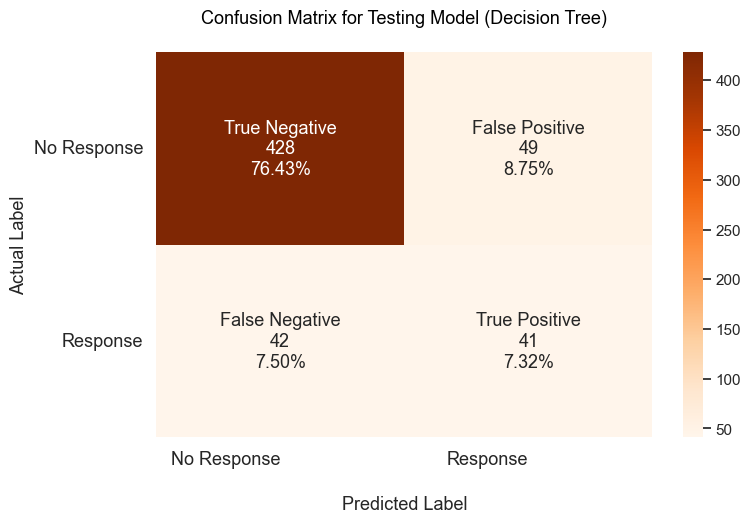

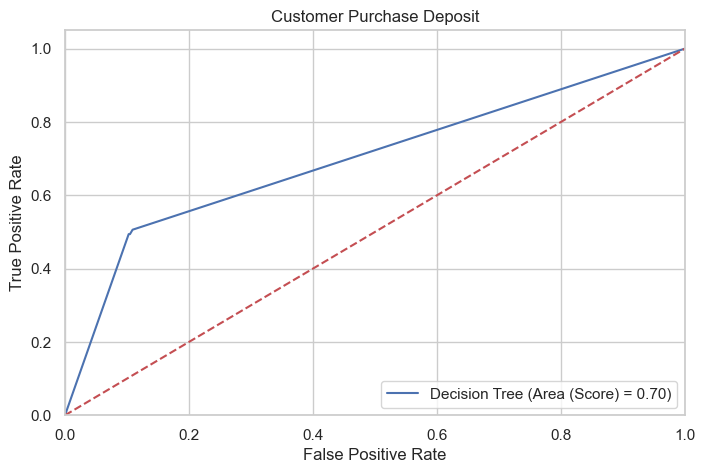

In [155]:
model_eval_test(dt_model, "Decision Tree", X_test, y_test)

In [156]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

Training Accuracy: 99.67 %
Testing Accuracy: 83.75 %


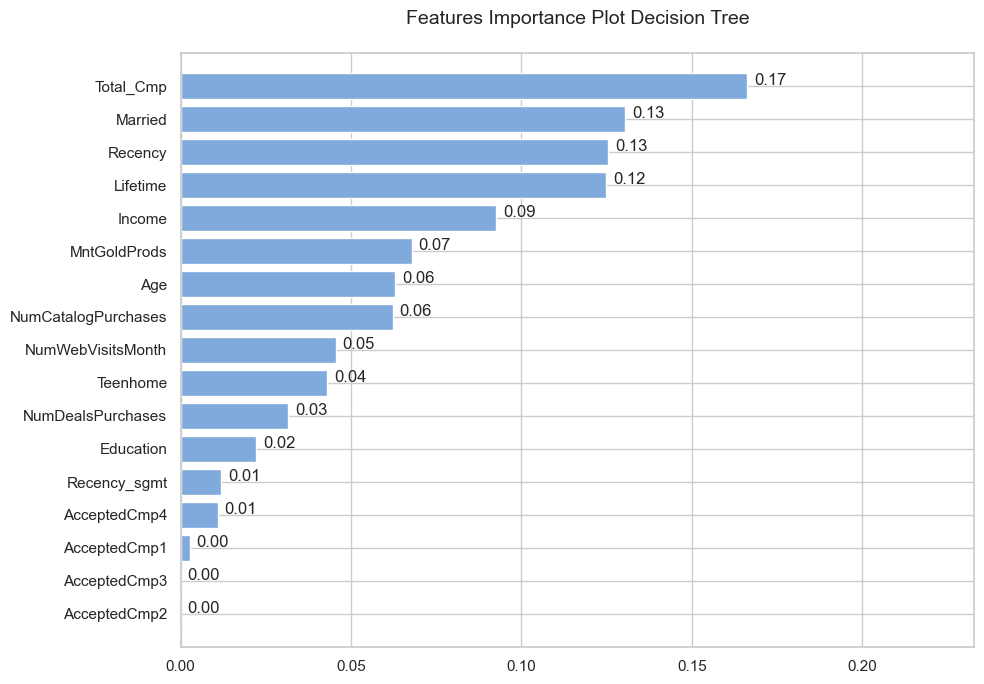

In [157]:
feature_importance_plot(dt_model, "Decision Tree")

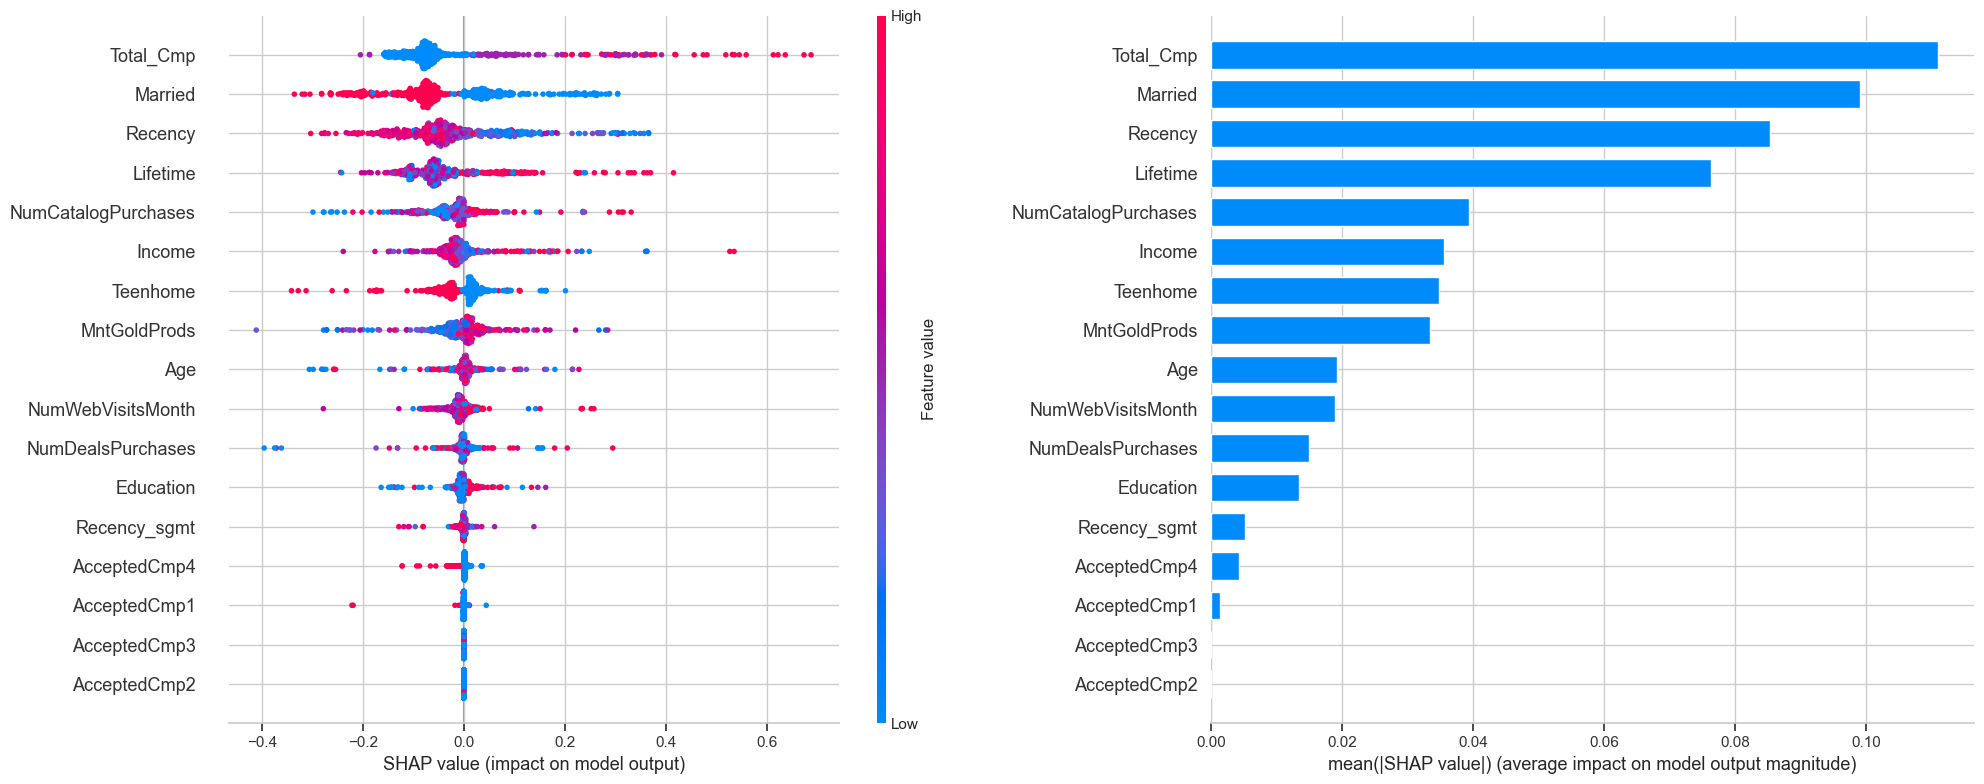

In [158]:
shap_plot(dt_model, "Decision Tree", X_test)

### **2. Random Forest**

Metode ini menggabungkan prediksi dari beberapa decision tree untuk menghasilkan prediksi akhir yang lebih stabil dan akurat.

In [159]:
# train the model
rf_model = RandomForestClassifier(random_state=1).fit(X_train, y_train)
print(rf_model)
eval_classification(rf_model, "Random Forest")

RandomForestClassifier(random_state=8)


**Observation:** 
- Precision memiliki gap lumayan kecil 0.21
- Recall memiliki gap yang agak besar 0.46
- F1 Score memiliki gap lumayan agak kecil 0.36

#### **Performance of Training Model**

Classification Report Training Model (Random Forest):

Accuracy = 0.997
Precision = 0.997
Recall = 0.993
F1 Score = 0.995
Cross Val F1 (k=5) = 0.972
ROC AUC = 1.0
Cross Val ROC AUC (k=5) = 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1428
           1       1.00      0.99      1.00       714

    accuracy                           1.00      2142
   macro avg       1.00      1.00      1.00      2142
weighted avg       1.00      1.00      1.00      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 709, FP = 2, TN = 1426, FN = 5
Predictly Correct = 2135
Predictly Wrong = 7 



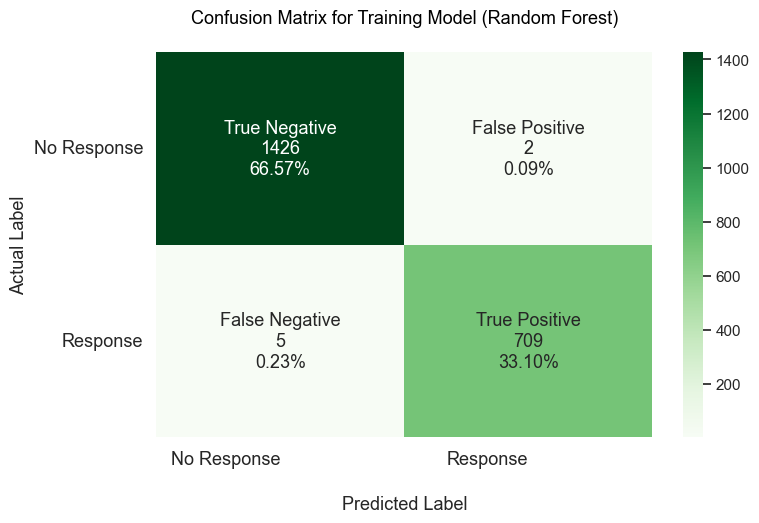

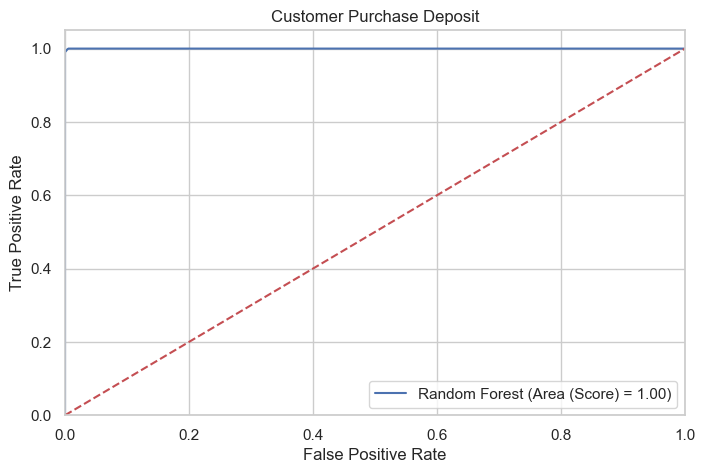

In [160]:
model_eval_train(rf_model, "Random Forest", X_train, y_train)

#### **Performance of Testing Model**

Classification Report Testing Model (Random Forest):

Accuracy = 0.904
Precision = 0.738
Recall = 0.542
F1 Score = 0.625
Cross Val F1 (k=5) = 0.535
ROC AUC = 0.893
Cross Val ROC AUC (k=5) = 0.892

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       477
           1       0.74      0.54      0.62        83

    accuracy                           0.90       560
   macro avg       0.83      0.75      0.78       560
weighted avg       0.90      0.90      0.90       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 45, FP = 16, TN = 461, FN = 38
Predictly Correct = 506
Predictly Wrong = 54 



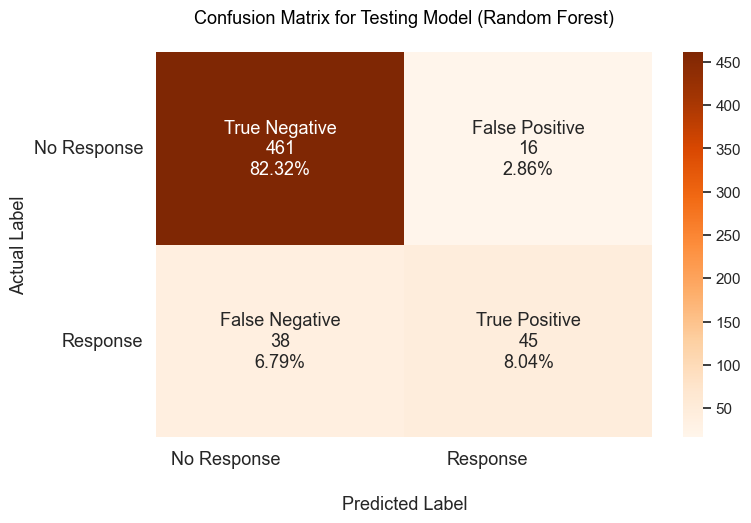

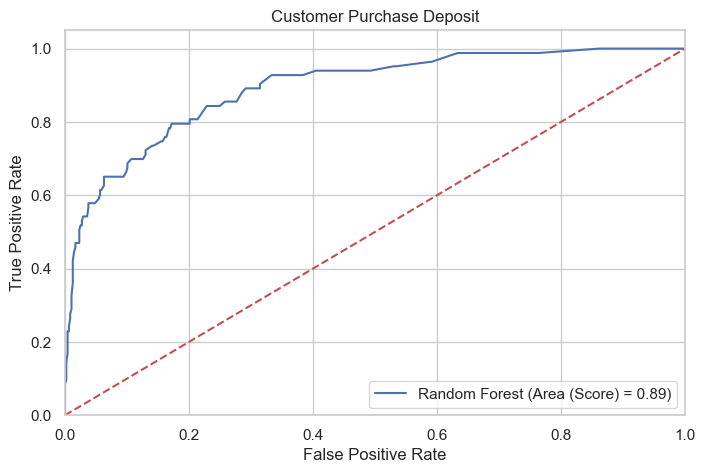

In [161]:
model_eval_test(rf_model, "Random Forest", X_test, y_test)

In [162]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 99.67 %
Test Accuracy: 90.36 %


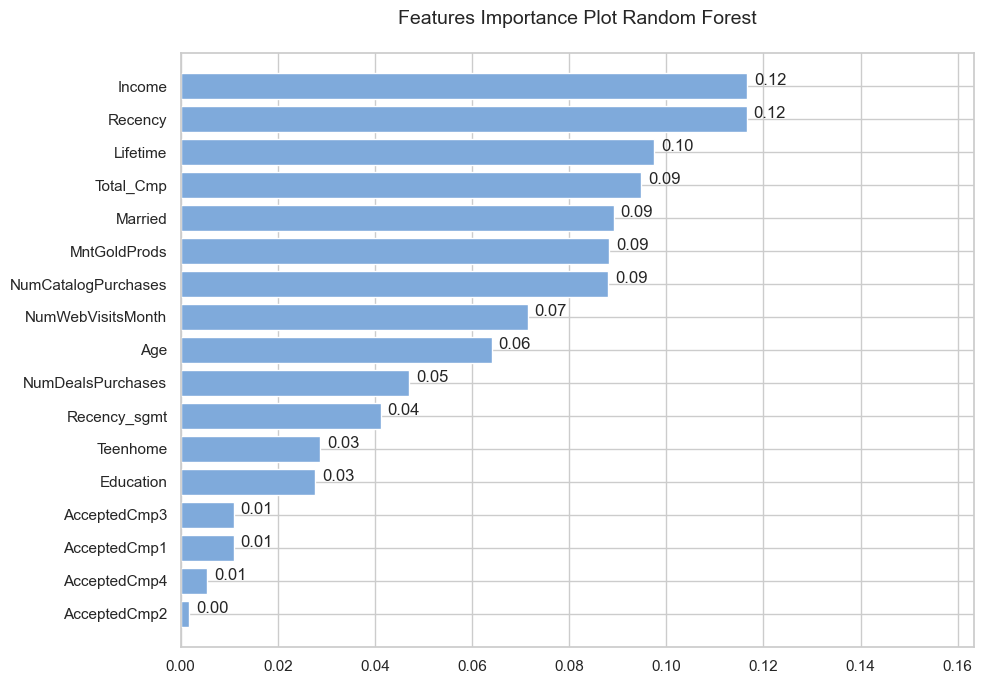

In [163]:
feature_importance_plot(rf_model, "Random Forest")

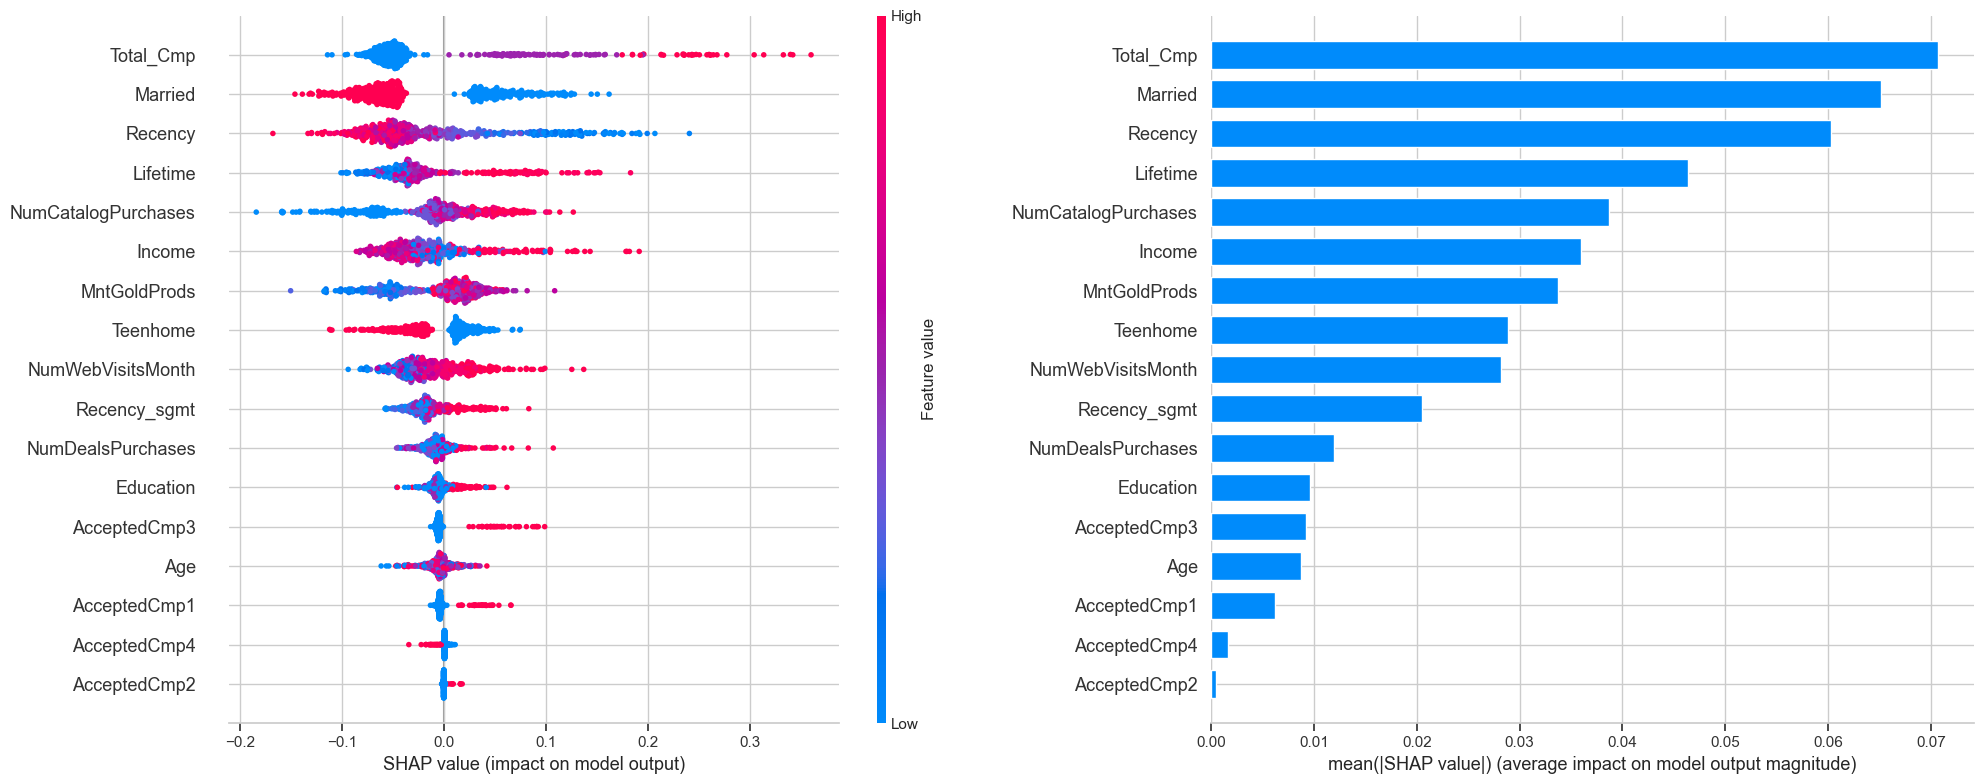

In [164]:
shap_plot(rf_model, "Random Forest", X_test)

### **3. Logistic Regression**

Metode ini digunakan untuk memodelkan hubungan antara variabel independen dan variabel dependen biner atau multi-kategori. Regresi logistik menghasilkan probabilitas kelas sebagai output.

In [165]:
# train the model
log_model = LogisticRegression(solver='lbfgs', max_iter=len(X_train), random_state=42).fit(X_train, y_train)
print(log_model)
eval_classification(log_model, "Logistic Regression")

LogisticRegression(max_iter=2142, random_state=42)


**Observation:** 
- Precision memiliki gap yang luamyan kecil 0.22
- Recall memiliki gap cukup kecil under -0.01
- F1 Score memiliki gap cukup kecil 0.11

#### **Performance of Training Model**

Classification Report Training Model (Logistic Regression):

Accuracy = 0.813
Precision = 0.75
Recall = 0.66
F1 Score = 0.702
Cross Val F1 (k=5) = 0.536
ROC AUC = 0.887
Cross Val ROC AUC (k=5) = 0.891

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1428
           1       0.75      0.66      0.70       714

    accuracy                           0.81      2142
   macro avg       0.79      0.77      0.78      2142
weighted avg       0.81      0.81      0.81      2142

==== Actual Data (Train) =====
Total = 2142
No Response = 1428
Response = 714
==== Predicted Data (Train) =====
TP = 471, FP = 157, TN = 1271, FN = 243
Predictly Correct = 1742
Predictly Wrong = 400 



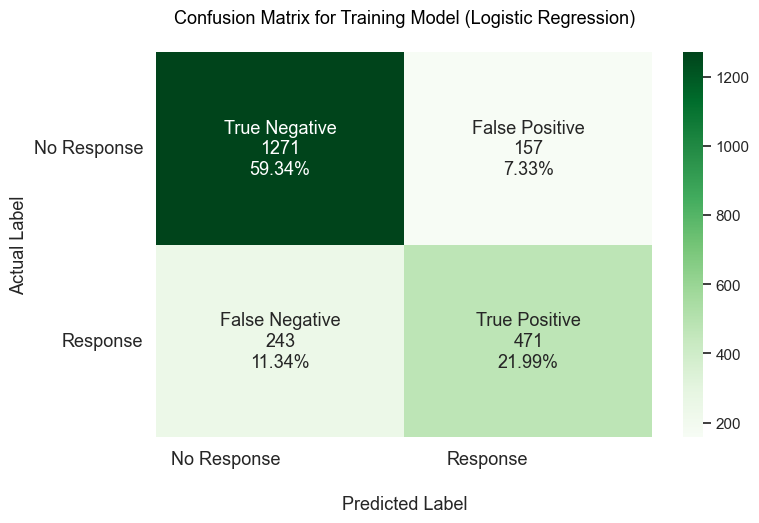

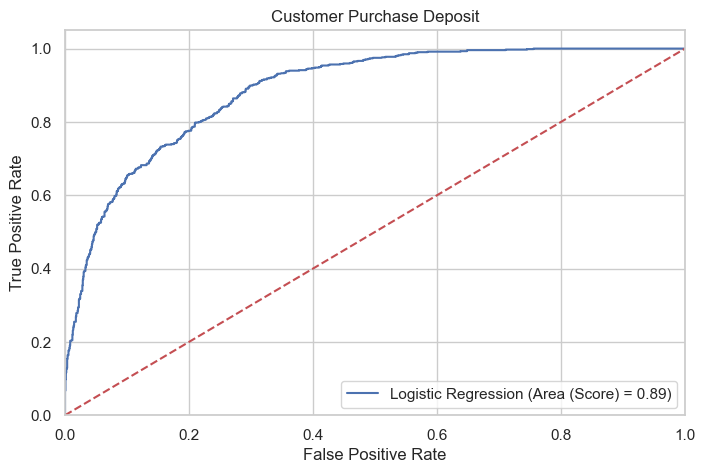

In [166]:
model_eval_train(log_model, "Logistic Regression", X_train, y_train)

#### **Performance of Testing Model**

Classification Report Testing Model (Logistic Regression):

Accuracy = 0.861
Precision = 0.523
Recall = 0.675
F1 Score = 0.589
Cross Val F1 (k=5) = 0.51
ROC AUC = 0.9
Cross Val ROC AUC (k=5) = 0.885

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       477
           1       0.52      0.67      0.59        83

    accuracy                           0.86       560
   macro avg       0.73      0.78      0.75       560
weighted avg       0.88      0.86      0.87       560

==== Actual Data (Test) =====
Total = 560
No Response = 477
Response = 83
==== Predicted Data (Test) =====
TP = 56, FP = 51, TN = 426, FN = 27
Predictly Correct = 482
Predictly Wrong = 78 



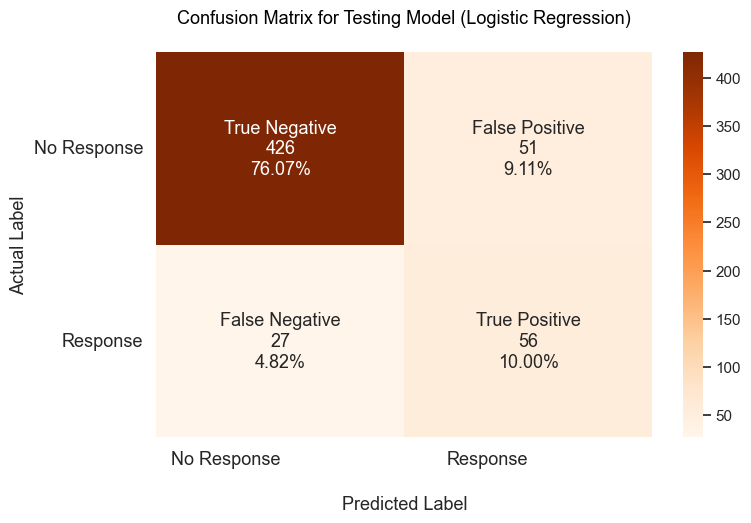

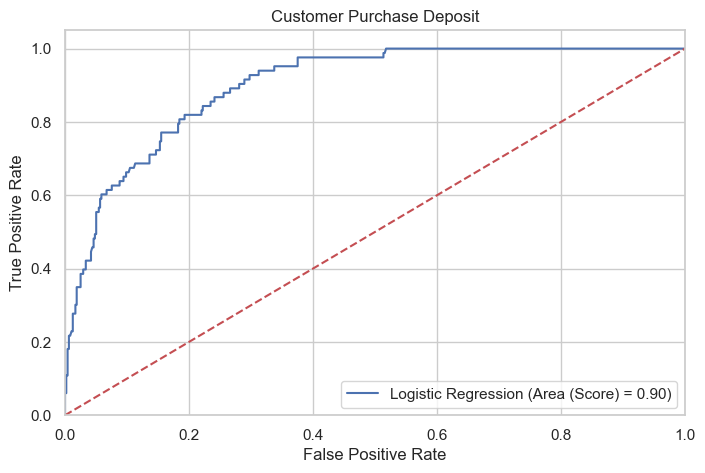

In [167]:
model_eval_test(log_model, "Logistic Regression", X_test, y_test)

In [168]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 81.33 %
Test Accuracy: 86.07 %


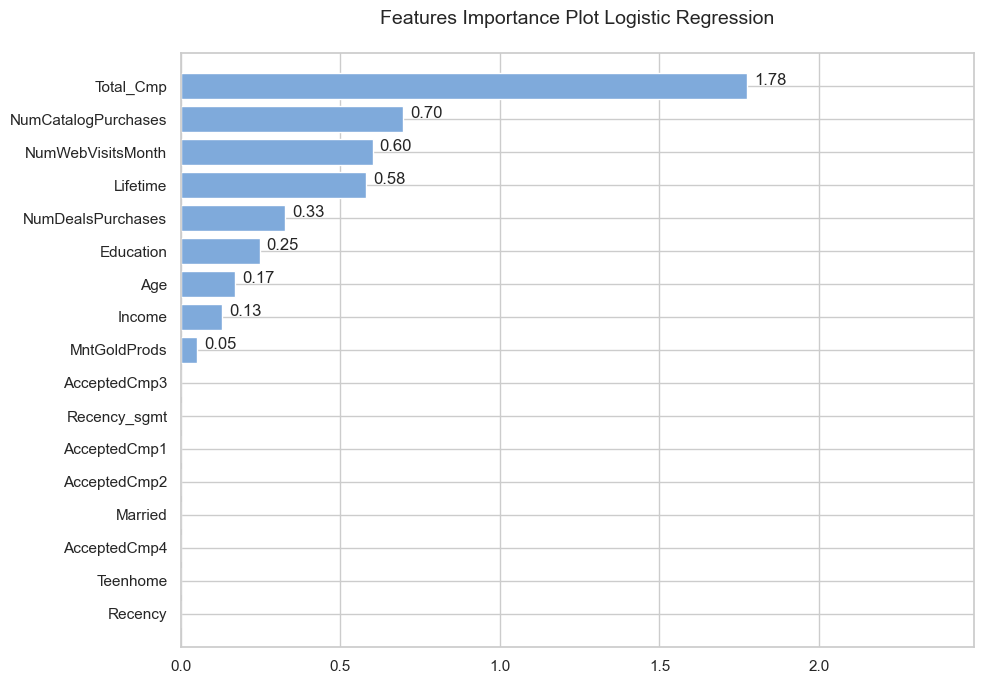

In [169]:
feature_importance_plot(log_model, "Logistic Regression", X_train)

In [170]:
shap_plot(log_model, "Logistic Regression", X_test)

Permutation explainer:  28%|███████████████▉                                         | 157/560 [00:10<04:46,  1.41it/s]


KeyboardInterrupt: 

### **4. Naive Bayes**

Metode ini didasarkan pada Teorema Bayes dan mengasumsikan independensi fitur. Naive Bayes menghitung probabilitas kelas berdasarkan probabilitas fitur dan mengambil keputusan berdasarkan probabilitas tertinggi.

In [ ]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)
eval_classification(gnb_model, "Naive Bayes")

**Observation:** 
- Precision memiliki gap lumayan kecil 0.21
- Recall memiliki gap cukup kecil under -0.11
- F1 Score memiliki gap yang sangat kecil 0.03

#### **Performance of Training Model**

In [ ]:
model_eval_train(gnb_model, "Naive Bayes", X_train, y_train)

#### **Performance of Testing Model**

In [ ]:
model_eval_test(gnb_model, "Naive Bayes", X_test, y_test)

In [ ]:
acc_gnb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gnb_train))
print("Test Accuracy: {} %".format(acc_gnb_test))

In [ ]:
feature_importance_plot(gnb_model, "Naive Bayes", X_train)

In [ ]:
shap_plot(gnb_model, "Naive Bayes", X_test)

### **5. K-Nearest Neighbors**

Memprediksi label data berdasarkan kelas mayoritas dari K tetangga terdekat dalam ruang fitur. K adalah parameter yang menentukan jumlah tetangga yang akan digunakan dalam klasifikasi.

In [ ]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)
eval_classification(knn_model, "K-Nearest Neighbors")

**Observation:** 
- Precision memiliki gap lumayan agak besar 0.33
- Recall memiliki gap lumayan agak besar 0.32
- F1 Score memiliki gap lumayan agak besar 0.33

#### **Performance of Training Model**

In [ ]:
model_eval_train(knn_model, "K-Nearest Neighbors", X_train, y_train)

#### **Performance of Testing Model**

In [ ]:
model_eval_test(knn_model, "K-Nearest Neighbors", X_test, y_test)

In [ ]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_knn_train))
print("Test Accuracy: {} %".format(acc_knn_test))

In [ ]:
feature_importance_plot(knn_model, "K-Nearest Neighbors", X_train)

In [ ]:
# shap_plot(knn_model, "K-Nearest Neighbors", X_test)

### **6. MLP Classifier (Neural Network)**

MLPClassifier adalah singkatan dari Multi-layer Perceptron classifier yang dalam namanya terhubung ke Neural Network. Tidak seperti algoritme klasifikasi lain seperti Support Vectors Machine atau Naive Bayes Classifier, MLPClassifier mengandalkan Neural Network yang mendasari untuk melakukan tugas klasifikasi.

In [ ]:
# train the model
mlp_model = MLPClassifier(random_state=42, max_iter=len(X_train)).fit(X_train, y_train)

eval_classification(mlp_model, "MLP Classifier")

**Observation:** 
- Precision memiliki gap lumayan besar 0.50
- Recall memiliki gap cukup besar 0.47
- F1 Score memiliki gap cukup besar 0.49

#### **Performance of Training Model**

In [ ]:
model_eval_train(mlp_model, "MLP Classifier", X_train, y_train)

#### **Performance of Testing Model**

In [ ]:
model_eval_test(mlp_model, "MLP Classifier", X_test, y_test)

In [ ]:
acc_mlp_train=round(mlp_model.score(X_train,y_train)*100,2)
acc_mlp_test=round(mlp_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_mlp_train))
print("Test Accuracy: {} %".format(acc_mlp_test))

In [ ]:
feature_importance_plot(mlp_model, "MLP Classifier", X_train)

In [ ]:
shap_plot(mlp_model, "MLP Classifier", X_test)

### **7. Adaboost Classifier**

is meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
# train the model
adab_model = AdaBoostClassifier(random_state=42).fit(X_train, y_train)
eval_classification(adab_model, "Adaboost Classifier")

**Observation:** 
- Precision memiliki gap agak besar 0.33
- Recall memiliki gap cukup kecil 0.18
- F1 Score memiliki gap agak kecil 0.25

#### **Performance of Training Model**

In [ ]:
model_eval_train(adab_model, "Adaboost Classifier", X_train, y_train)

#### **Performance of Testing Model**

In [ ]:
model_eval_test(adab_model, "Adaboost Classifier", X_test, y_test)

In [ ]:
acc_adab_train=round(adab_model.score(X_train,y_train)*100,2)
acc_adab_test=round(adab_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_adab_train))
print("Test Accuracy: {} %".format(acc_adab_test))

In [ ]:
feature_importance_plot(adab_model, "Adaboost Classifier")

In [ ]:
shap_plot(adab_model, "Adaboost Classifier", X_test)

### **8. XGBoost Classifier**

XGBoost (Extream Gradient Boosting) merupakan pengembangan dari algoritma Gradient Tree Boosting yang berbasis algoritma ensemble, secara efisien dapat menangani permasalahan machine learning yang berskala besar.

In [ ]:
# train the model
xgb_model = XGBClassifier(random_state=42).fit(X_train, y_train)
eval_classification(xgb_model, "XGBoost Classifier")

**Observation:** 
- Precision memiliki gap agak besar 0.34
- Recall memiliki gap cukup besar 0.45
- F1 Score memiliki gap cukup besar 0.40

#### **Performance of Training Model**

In [ ]:
model_eval_train(xgb_model, "XGBoost Classifier", X_train, y_train)

#### **Performance of Testing Model**

In [ ]:
model_eval_test(xgb_model, "XGBoost Classifier", X_test, y_test)

In [ ]:
acc_xgb_train=round(xgb_model.score(X_train,y_train)*100,2)
acc_xgb_test=round(xgb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_xgb_train))
print("Test Accuracy: {} %".format(acc_xgb_test))

In [ ]:
feature_importance_plot(xgb_model, "XGBoost Classifier")

In [ ]:
shap_plot(xgb_model, "XGBoost Classifier", X_test)

### **9. Gradient Boosting Classifier**

Gradient boosting merupakan algoritma klasifikasi machine learning yang menggunakan ensamble dari decision tree untuk memprediksi nilai. Gradient boosting termasuk supervised learning berbasis decision tree yang dapat digunakan untuk klasifikasi

In [ ]:
# train the model
# gb_model = GradientBoostingClassifier().fit(X_train, y_train)
gb_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400, max_depth=13, random_state=42).fit(X_train, y_train)
eval_classification(gb_model, "Gradient Boosting Classifier")

**Observation:** 
- Precision memiliki gap lumayan besar 0.51
- Recall memiliki gap cukup besar 0.49
- F1 Score memiliki gap cukup besar 0.50

#### **Performance of Training Model**

In [ ]:
model_eval_train(gb_model, "Gradient Boosting Classifier", X_train, y_train)

#### **Performance of Testing Model**

In [ ]:
model_eval_test(gb_model, "Gradient Boosting Classifier", X_test, y_test)

In [ ]:
acc_gb_train=round(gb_model.score(X_train,y_train)*100,2)
acc_gb_test=round(gb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gb_train))
print("Test Accuracy: {} %".format(acc_gb_test))

In [ ]:
feature_importance_plot(gb_model, "Gradient Boosting Classifier")

In [ ]:
shap_plot(gb_model, "Gradient Boosting Classifier", X_test)

### **10. Support Vector Machine**

Support Vector Machine atau SVM adalah algoritme pembelajaran mesin yang diawasi yang dapat digunakan untuk klasifikasi dan regresi. Cara kerja SVM didasarkan pada SRM atau Structural Risk Minimization yang dirancang untuk mengolah data menjadi Hyperplane yang mengklasifikasikan ruang input menjadi dua kelas.

In [ ]:
# train the model
svm_model = SVC(kernel='rbf', probability=True, random_state=42).fit(X_train, y_train)
print(svm_model)
eval_classification(svm_model, "Support Vector Machine")

**Observation:**
- Precision memiliki gap agak besar 0.30
- Recall memiliki gap cukup kecil 0.18
- F1 Score memiliki gap agak besar 0.25

#### **Performance of Training Model**

In [ ]:
model_eval_train(svm_model, "Support Vector Machine", X_train, y_train)

#### **Performance of Testing Model**

In [ ]:
model_eval_test(svm_model, "Support Vector Machine", X_test, y_test)

In [ ]:
acc_svm_train=round(svm_model.score(X_train,y_train)*100,2)
acc_svm_test=round(svm_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_svm_train))
print("Test Accuracy: {} %".format(acc_svm_test))

In [ ]:
feature_importance_plot(svm_model, "Support Vector Machine", X_train)

In [ ]:
# shap_plot(svm_model, "Support Vector Machine", X_test)

### **Summary**

In [ ]:
results_eval = pd.DataFrame({
    "Models" : train_modelname_list,
    "Precision (Train)": train_precision_list, 
    "Precision (Test)": test_precision_list, 
    "Recall (Train)": train_recall_list, 
    "Recall (Test)": test_recall_list, 
    "F1 Score (Train)" : train_f1_score_list,
    "F1 Score (Test)" : test_f1_score_list
})

results_eval.drop_duplicates(inplace = True)

results_eval.sort_values(by=["F1 Score (Test)", "Precision (Test)", "Recall (Test)"], ascending=[False, False, False]).reset_index(drop = True).style.background_gradient(cmap="Purples")

In [ ]:
import pickle
pickle.dump(rf_model, open('save models/rf_best_model.pkl', 'wb'))

In [ ]:
rf_best_model_temp = pickle.load(open('save models/rf_best_model.pkl', 'rb'))

Berdasarkan hasil modelling menggunakan beberapa algoritma di atas, dapat diketahui bahwa nilai precision dan recall pada dataset train dan test yang paling baik dihasilkan oleh Random Forest, XGBoost, dan Logistic Regression dengan masing-masing nilai yang didapatkan sebagai berikut:

* Random Forest: Precision 0.786, Recall 0.53
* XGBoost Classifier: Precision 0.652, Recall 0.542
* Logistic Regression: Precision 0.523, Recall 0.675

## **📌 Hyperparameter Tuning**

Kemudian, pada tahap selanjutnya kami melakukan hyperparameter tuning dari beberapa model. Kemudian akan fokus ke beberapa model yang telah kami pilih berdasarkan nilai precision, recall dan f1 score tertinggi sebelumnya. Hal ini kami lakukan dengan menganalisa output learning curve agar output akhir modelling dari jenis metode tersebut dapat memberikan hasil yang lebih optimal.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_params_()[key])

In [ ]:
from sklearn.metrics import make_scorer
precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"precision": precision_scorer, "recall": "recall", "f1": "f1"}

### **1. Decision Tree**

#### **Tuning CV**

In [ ]:
# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = [None, 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf, 
                       max_features=max_features, 
                       criterion=criterion, 
                       splitter=splitter)

dt = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5)

dt_model_ht = RandomizedSearchCV(dt, hyperparameters, cv=cv, scoring=custom_scoring, refit="f1", random_state=1)
# dt_model_ht = GridSearchCV(dt, hyperparameters, cv=cv, scoring=custom_scoring, refit="f1")

grid_result = dt_model_ht.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_f1']
# stds = grid_result.cv_results_['std_test_f1']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.794643 using {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 53, 'criterion': 'entropy'}

In [ ]:
dt_model_ht = DecisionTreeClassifier(splitter = 'random', min_samples_split = 2, 
                                     min_samples_leaf = 1, max_features = None, 
                                     max_depth = 53, criterion = 'entropy', random_state=42)
dt_model_ht.fit(X_train,y_train)

In [ ]:
eval_classification(dt_model_ht, "Decision Tree (HT)")

#### **Learning Curve**

- **min_samples_leaf**

In [ ]:
def draw_learning_curve(params_values): 
    train_scores = []
    test_scores = []

    for i in params_values: 
        model = DecisionTreeClassifier(random_state = 42, min_samples_leaf=i)
        model.fit(X_train, y_train)

        #Eval on Train 
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        #Eval on Test 
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

        # print('params values: ' + str(i) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
    fig = plt.figure(figsize =(10, 4))
    plt.plot(params_values, train_scores, label='Train', linewidth=2.5, marker ='.', markersize=10)
    plt.plot(params_values, test_scores, label='Test', linewidth=2.5, marker ='.', markersize=10)
    plt.xlabel('min_samples_leaf')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

params_values = [int(x) for x in np.linspace(95, 110, 15)]
draw_learning_curve(params_values) 

Best value for `min_samples_leaf` = 95

- **max_depth**

In [ ]:
def draw_learning_curv(params_values): 
    train_scores = []
    test_scores = []

    for c in params_values: 
        model = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 95, max_depth=c)
        model.fit(X_train, y_train)

        #Eval on Train 
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        #Eval on Test 
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

        # print('params values: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
    fig = plt.figure(figsize =(10, 4))
    plt.plot(params_values, train_scores, label='Train', linewidth=2.5, marker ='.', markersize=10)
    plt.plot(params_values, test_scores, label='Test', linewidth=2.5, marker ='.', markersize=10)
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

params_values = [int(x) for x in np.linspace(1, 10, num=10)]
draw_learning_curv(params_values)

Best value for `max_depth` = 4

- **max_depth**

In [ ]:
def draw_learning_curves(params_values): 
    train_scores = []
    test_scores = []

    for i in params_values: 
        model = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 95, max_depth=4, min_samples_split=i)
        model.fit(X_train, y_train)

        #Eval on Train 
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        #Eval on Test 
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

        # print('param values: ' + str(i) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    fig = plt.figure(figsize =(10, 4))
    plt.plot(params_values, train_scores, label='Train', linewidth=2.5, marker ='.', markersize=10)
    plt.plot(params_values, test_scores, label='Test', linewidth=2.5, marker ='.', markersize=10)
    plt.xlabel('min_samples_split')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

params_values = [int(x) for x in np.linspace(2, 160, 160)]
draw_learning_curves(params_values) 

Best value for `min_sample_split` = 20

#### **Manually Tuning**

Melakukan tuning kembali menggunakan hyperparameter best/optimal sebelumnya untuk melihat perubahan evaluasi model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model_ht2 = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 95, 
                            max_depth=4, min_samples_split=20, 
                            splitter = 'best', criterion = 'gini') 
dt_model_ht2.fit(X_train, y_train)

In [ ]:
eval_classification(dt_model_ht2, "Decision Tree (HT2)")

### **2. Random Forest**

#### **Tuning CV**

In [ ]:
# List of hyperparameter
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5)

rf_model_ht = RandomizedSearchCV(rf, hyperparameters, cv=cv, scoring=custom_scoring, refit="f1", random_state=1)
# rf_model_ht = GridSearchCV(rf, hyperparameters, cv=cv, scoring=custom_scoring, refit="f1")

grid_result = rf_model_ht.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_f1']
# stds = grid_result.cv_results_['std_test_f1']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param


- Best: 0.839675 using {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

In [ ]:
rf_model_ht1 = RandomForestClassifier(max_depth = 15, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300, random_state=42)
rf_model_ht1.fit(X_train,y_train)

In [ ]:
eval_classification(rf_model_ht1, "Random Forest (HT1)")

- Best: 0.435763 using {'n_estimators': 98, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_depth': 90, 'criterion': 'entropy'}

In [ ]:
rf_model_ht2 = RandomForestClassifier(n_estimators = 98, min_samples_split = 18, 
                                     min_samples_leaf = 4, max_depth = 90, 
                                     criterion = 'entropy', random_state=42)
rf_model_ht2.fit(X_train,y_train)

In [ ]:
eval_classification(rf_model_ht2, "Random Forest (HT2)")

#### **Learning Curve**

- **n_estimators**

In [ ]:
param_values = [int(x) for x in np.linspace(1, 200, 10)] # n_estimators

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators=c) #cek param n estimator
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

fig = plt.figure(figsize =(10, 4))
plt.plot(param_values, train_scores, label='Train', linewidth=2.5, marker ='.', markersize=10)
plt.plot(param_values, test_scores, label='Test', linewidth=2.5, marker ='.', markersize=10)
    
plt.legend()
plt.show()

Best value for `n_estimator` = 23

- **max_depth**

In [ ]:
param_values = [int(x) for x in np.linspace(2, 20, 10)] # max_depth

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators= 23, max_depth = c) # cek param max_depth
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

fig = plt.figure(figsize =(10, 4))
plt.plot(param_values, train_scores, label='Train', linewidth=2.5, marker ='.', markersize=10)
plt.plot(param_values, test_scores, label='Test', linewidth=2.5, marker ='.', markersize=10)
    
plt.legend()
plt.show()

Best value for `max_depth` = 4

- **min_samples_split**

In [ ]:
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators= 23, max_depth = 4, min_samples_split = c) # cek param min_sample_split
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

fig = plt.figure(figsize =(10, 4))
plt.plot(param_values, train_scores, label='Train', linewidth=2.5, marker ='.', markersize=10)
plt.plot(param_values, test_scores, label='Test', linewidth=2.5, marker ='.', markersize=10)
    
plt.legend()
plt.show()

Best value for `min_samples_split` = 3

- **min_samples_leaf**

In [ ]:
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators= 23, max_depth = 4, min_samples_split = 3, min_samples_leaf = c) # cek param min_sample_leaf
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

fig = plt.figure(figsize =(10, 4))
plt.plot(param_values, train_scores, label='Train', linewidth=2.5, marker ='.', markersize=10)
plt.plot(param_values, test_scores, label='Test', linewidth=2.5, marker ='.', markersize=10)
    
plt.legend()
plt.show()

Best value for `min_samples_leaf` = 4

#### **Manually Tuning**

Melakukan tuning kembali menggunakan hyperparameter best/optimal sebelumnya untuk melihat perubahan evaluasi model

In [ ]:
n_estimators = [23]
criterion = ['gini', 'entropy']
max_depth = [4]
min_samples_split = [3]
min_samples_leaf = [4]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rf_model_ht3 = RandomizedSearchCV(rf, hyperparameters, scoring='precision', random_state=42, cv=5)
rf_model_ht3.fit(X_train, y_train)

print("Best: %f using %s" % (rf_model_ht3.best_score_, rf_model_ht3.best_params_))

In [ ]:
rf_model_ht3 = RandomForestClassifier(n_estimators = 23, min_samples_split = 13, 
                                      min_samples_leaf = 11, max_depth = 4, 
                                      criterion = 'gini', random_state = 42) 
rf_model_ht3.fit(X_train, y_train)

In [ ]:
eval_classification(rf_model_ht3, "Random Forest (HT3)")

### **3. Logistic Regression**

#### **Tuning CV**

In [ ]:
# List of hyperparameter
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 1, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression(random_state=42)
cv = StratifiedKFold(n_splits=5)

logreg_model_ht = RandomizedSearchCV(logreg, hyperparameters, cv=cv, scoring=custom_scoring, refit="f1", random_state=1)
# logreg_model_ht = GridSearchCV(logreg, hyperparameters, cv=cv, scoring=custom_scoring, refit="f1")

grid_result = logreg_model_ht.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_f1']
# stds = grid_result.cv_results_['std_test_f1']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.498615 using {'penalty': 'l2', 'C': 0.47479999999999994}

In [ ]:
logreg_model_ht = LogisticRegression(penalty = 'l2', C = 0.47479999999999994, random_state=42)
logreg_model_ht.fit(X_train,y_train)

In [ ]:
eval_classification(logreg_model_ht, "Logistic Regression (HT)")

### **4. K-Nearest Neighbors**

#### **Tuning CV**

In [ ]:
# List of hyperparameter
leaf_size = list(range(1,100))
n_neighbors = list(range(1,100))
p=[1,2,3]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=5)

knn_model_ht = RandomizedSearchCV(knn, hyperparameters, cv=cv, scoring=custom_scoring, refit="f1", random_state=1)
# knn_model_ht = GridSearchCV(knn, hyperparameters, cv=cv, scoring=custom_scoring, refit="f1")

grid_result = knn_model_ht.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_f1']
# stds = grid_result.cv_results_['std_test_f1']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.377400 using {'p': 2, 'n_neighbors': 13, 'leaf_size': 34, 'algorithm': 'brute'}

In [ ]:
knn_model_ht = KNeighborsClassifier(p = 2, n_neighbors = 13, leaf_size = 34, algorithm = 'brute')
knn_model_ht.fit(X_train,y_train)

In [ ]:
eval_classification(knn_model_ht, "K-Nearest Neighbors (HT)")

### **5. Adaboost Classifier**

#### **Tuning CV**

In [ ]:
# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

adab = AdaBoostClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5)

adab_model_ht = RandomizedSearchCV(adab, hyperparameters, cv=cv, scoring=custom_scoring, refit="f1", random_state=1)
# adab_model_ht = GridSearchCV(adab, hyperparameters, cv=cv, scoring=custom_scoring, refit="f1")

grid_result = adab_model_ht.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_f1']
# stds = grid_result.cv_results_['std_test_f1']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.521426 using {'n_estimators': 1634, 'learning_rate': 0.09801005025125628, 'algorithm': 'SAMME.R'}

In [ ]:
adab_model_htt = AdaBoostClassifier(n_estimators = 1634, learning_rate = 0.09801005025125628, algorithm = 'SAMME.R', random_state=42)
adab_model_htt.fit(X_train,y_train)

In [ ]:
# eval_classification(adab_model_ht, "Adaboost Classifier (HT)")

### **6. XGBoost Classifier**

#### **Tuning CV**

In [ ]:
# List of hyperparameter
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

xgb = XGBClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5)

xgb_model_ht = RandomizedSearchCV(xgb, hyperparameters, cv=cv, scoring=custom_scoring, refit="f1", random_state=1)
# xgb_model_ht = GridSearchCV(xgb, hyperparameters, cv=cv, scoring=custom_scoring, refit="f1")

grid_result = xgb_model_ht.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_f1']
# stds = grid_result.cv_results_['std_test_f1']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

- Best: 0.507077 using {'tree_method': 'hist', 'min_child_weight': 6, 'max_depth': 10, 'lambda': 0.1, 'gamma': 0.1, 'eta': 0.14141414141414144, 'colsample_bytree': 0.2, 'alpha': 0.9}

In [ ]:
xgb_model_ht = XGBClassifier(tree_method = 'hist', min_child_weight = 6, max_depth = 10, 
                             reg_lambda = 0.1, gamma = 0.1, eta = 0.14141414141414144, 
                             colsample_bytree = 0.2, alpha = 0.9)
xgb_model_ht.fit(X_train,y_train)

In [ ]:
eval_classification(xgb_model_ht, "XGBoost Classifier (HT)")

#### **Learning Curve**

- **max_depth**

In [ ]:
param_values = [int(x) for x in np.linspace(1, 10, 10)] # max_depth

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=c, random_state=42) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

fig = plt.figure(figsize =(10, 4))
plt.plot(param_values, train_scores, label='Train', linewidth=2.5, marker ='.', markersize=10)
plt.plot(param_values, test_scores, label='Test', linewidth=2.5, marker ='.', markersize=10)
    
plt.legend()
plt.show()

Best value for `max_depth` = 1

- **gamma**

In [ ]:
param_values= [float(x) for x in np.linspace(0, 100, num = 10)]

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=1, gamma=c, random_state=42) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

fig = plt.figure(figsize =(10, 4))
plt.plot(param_values, train_scores, label='Train', linewidth=2.5, marker ='.', markersize=10)
plt.plot(param_values, test_scores, label='Test', linewidth=2.5, marker ='.', markersize=10)
    
plt.legend()
plt.show()

Best value for `gamma` = 0

- **tree_method**

In [ ]:
param_values=['auto', 'exact', 'approx', 'hist']

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=1, gamma=0, tree_method=c, random_state=42) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

fig = plt.figure(figsize =(10, 4))
plt.plot(param_values, train_scores, label='Train', linewidth=2.5, marker ='.', markersize=10)
plt.plot(param_values, test_scores, label='Test', linewidth=2.5, marker ='.', markersize=10)
    
plt.legend()
plt.show()

Best value for `tree_method` = approx

- **min_child_weight**

In [ ]:
param_values= [int(x) for x in np.linspace(1, 20, num = 10)]

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=1, gamma=0, tree_method='approx', min_child_weight=c, random_state=42) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

fig = plt.figure(figsize =(10, 4))
plt.plot(param_values, train_scores, label='Train', linewidth=2.5, marker ='.', markersize=10)
plt.plot(param_values, test_scores, label='Test', linewidth=2.5, marker ='.', markersize=10)
    
plt.legend()
plt.show()

Best value for `min_child_weight` = 5

#### **Manually Tuning**

Melakukan tuning kembali menggunakan hyperparameter best/optimal sebelumnya untuk melihat perubahan evaluasi model

In [ ]:
precision_scorer = make_scorer(precision_score, zero_division=0)
prec_scoring = {"precision": precision_scorer}

hyperparameters = {
                    'max_depth' : [1],
                    'gamma' : [0],
                    'tree_method' : ['approx'],
                    'min_child_weight' : [5],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 5)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 5)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 5)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 5)]
                    }

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb_model_ht2 = RandomizedSearchCV(xgb, hyperparameters, cv=7, random_state=42, scoring=prec_scoring, refit="precision", n_iter=20)
xgb_model_ht2.fit(X_train,y_train)

print("Best: %f using %s" % (xgb_model_ht2.best_score_, xgb_model_ht2.best_params_))

In [ ]:
xgb_model_ht2 = XGBClassifier(tree_method = 'auto', min_child_weight = 5, 
                              max_depth = 1, reg_lambda = 0.25, gamma = 0, 
                              eta = 0.25, colsample_bytree = 0.25, 
                              alpha = 0.0, random_state = 42) 
xgb_model_ht2.fit(X_train, y_train)

In [ ]:
eval_classification(xgb_model_ht2, "XGBoost Classifier (HT2)")

## **📌 Model Additional**

### **Stacking**

Melakukan kombinasi dari banyak model klasifikasi

**Choosing the baseline**

In [ ]:
from sklearn.ensemble import StackingClassifier

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, model, hyperparameters, cv=5, scoring_fit='recall'):
    rs = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0, random_state=42) # Use GridSearch better if you have more resource & time
    rs.fit(X_train_data, y_train_data)
    best_model = rs.best_estimator_
    
    pred = rs.predict(X_test_data)
    pred_proba = rs.predict(X_test_data)
    score = roc_auc_score(y_test_data, pred_proba)
    return [best_model, pred, score]

models_to_train = [LogisticRegression(), 
                   KNeighborsClassifier(), 
                   DecisionTreeClassifier(), 
                   RandomForestClassifier(), 
                   AdaBoostClassifier(random_state=42), 
                   XGBClassifier(random_state=42)
                  ]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.linspace(0.0001, 1, 100)]
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,100)),
        'n_neighbors': list(range(1,100)),
        'p': [1,2,3],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    { # Decision Tree
        'max_depth': [int(x) for x in np.linspace(1, 32, 32, endpoint=True)],
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': list(range(1,X_train.shape[1]))
    }, 
    { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    }
]

models_preds_scores = []

for i, model in enumerate(models_to_train):
    hyperparameters = grid_parameters[i]
    result = algorithm_pipeline(X_train, X_test, y_train, y_test,  model, hyperparameters, cv=5)
    models_preds_scores.append(result)

for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

**Stacking Implementation**

In [ ]:
# Model: LogisticRegression, Score: 0.7862519259427647
# Model: KNeighborsClassifier, Score: 0.7346492889798186
# Model: DecisionTreeClassifier, Score: 0.7129019221540249
# Model: RandomForestClassifier, Score: 0.7553610669091461
# Model: AdaBoostClassifier, Score: 0.7511555656588619
# Model: XGBClassifier, Score: 0.7126619686292339

# define level-1 algorithm
level1 = list()
level1.append(('lr', LogisticRegression()))
level1.append(('rf', RandomForestClassifier()))
level1.append(('ab', AdaBoostClassifier()))
level1.append(('xg', XGBClassifier()))

# define level-2 algorithm
level2 = XGBClassifier()

# Fit model
stacking_model = StackingClassifier(estimators=level1, final_estimator=level2, cv=5)
stacking_model.fit(X_train,y_train)

In [ ]:
eval_classification(stacking_model, "Stacking Classifier")

### **Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

vote_model = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(C=4.281332398719396)), 
        ('knn', KNeighborsClassifier(algorithm='brute', leaf_size=48, n_neighbors=17, p=1)), 
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('ab', AdaBoostClassifier()),
        ('xg', XGBClassifier()),
    ], voting = 'soft')

vote_model.fit(X_train, y_train)

In [ ]:
eval_classification(vote_model, "Voting Classifier")

## **📌 Model Comparison**

Melihat summary metrics dari berbagai algoritma yang telah dibuat

\* HT --> Hyperparameter Tuning

\* HT2 --> Manually Tuning

**Perbandingan `precision`, `recall` dan `f1 score` pada train test tertinggi**

- Tanpa Tuning

In [ ]:
results_eval = pd.DataFrame({
    "Models" : train_modelname_list,
    "Precision (Train)": train_precision_list, 
    "Precision (Test)": test_precision_list, 
    "Recall (Train)": train_recall_list, 
    "Recall (Test)": test_recall_list, 
    "F1 Score (Train)" : train_f1_score_list,
    "F1 Score (Test)" : test_f1_score_list
})

results_eval.drop_duplicates(inplace = True)

results_eval_notht = results_eval[~results_eval["Models"].str.contains("HT")]

results_eval_notht = results_eval_notht.sort_values(by=["F1 Score (Test)", "Precision (Test)", "Recall (Test)"], ascending=[False, False, False]).reset_index(drop = True)

results_eval_notht.style.format(precision=3).background_gradient(cmap='Purples')

- Dengan Tuning

In [ ]:
results_eval_ht = results_eval[results_eval["Models"].str.contains("HT")]
results_eval_ht = results_eval_ht.sort_values(by=["F1 Score (Test)", "Precision (Test)", "Recall (Test)"], ascending=[False, False, False]).reset_index(drop = True)

results_eval_ht.style.format(precision=3).background_gradient(cmap='Purples')

**Perbandingan `precision`, `recall` dan `f1 score` pada train test dengan Total Difference terendah**

- Tanpa Tuning

In [ ]:
results_diff = pd.DataFrame({
    "Models" : train_modelname_list,
    "Precision (Train)": train_precision_list, 
    "Precision (Test)": test_precision_list, 
    "Recall (Train)": train_recall_list, 
    "Recall (Test)": test_recall_list, 
    "F1 Score (Train)" : train_f1_score_list,
    "F1 Score (Test)" : test_f1_score_list
})

results_diff.drop_duplicates(inplace = True)

results_diff["Total Diff"] = (results_diff["Precision (Train)"] - results_diff["Precision (Test)"]) + \
                   (results_diff["Recall (Train)"] - results_diff["Recall (Test)"]) + \
                   (results_diff["F1 Score (Train)"] - results_diff["F1 Score (Test)"])

results_diff_notht = results_diff[~results_diff["Models"].str.contains("HT")]

results_diff_notht = results_diff_notht.sort_values(by=["Total Diff", "F1 Score (Test)", "Precision (Test)", "Recall (Test)"], ascending=[True, False, False, False]).reset_index(drop = True)

results_diff_notht.style.format(precision=3).background_gradient(cmap='Greens')

- Dengan Tuning

In [ ]:
results_diff_ht = results_diff[results_diff["Models"].str.contains("HT")]

results_diff_ht = results_diff_ht.sort_values(by=["Total Diff", "F1 Score (Test)", "Precision (Test)", "Recall (Test)"], ascending=[True, False, False, False]).reset_index(drop = True)

results_diff_ht.style.format(precision=3).background_gradient(cmap='Greens')

**Evaluation Metrics pada Train Urutan Tertinggi**

In [ ]:
results_train = pd.DataFrame({
    'Model (Train)': train_modelname_list, 
    'Accuracy': train_accuracy_list,
    'Precision': train_precision_list, 
    'Recall': train_recall_list,
    'F1 Score': train_f1_score_list, 
    'Cross Val F1 (k=5)': train_cross_val_f1_list,
    'ROC AUC': train_roc_auc_score_list,
    'Cross Val ROC AUC (k=5)': train_cross_val_rocauc_list
})

results_train.drop_duplicates(inplace = True)

results_train = results_train.sort_values(by=['F1 Score', 'Precision', 'Recall'], ascending=False).reset_index(drop = True)

results_train.style.format(precision=3).background_gradient(cmap='Blues')

**Evaluation Metrics pada Test Urutan Tertinggi**

In [ ]:
results_test = pd.DataFrame({
    'Model (Test)': test_modelname_list, 
    'Accuracy': test_accuracy_list,
    'Precision': test_precision_list, 
    'Recall': test_recall_list,
    'F1 Score': test_f1_score_list, 
    'Cross Val F1 (k=5)': test_cross_val_f1_list,
    'ROC AUC': test_roc_auc_score_list,
    'Cross Val ROC AUC (k=5)': test_cross_val_rocauc_list
})

results_test.drop_duplicates(inplace = True)

results_test = results_test.sort_values(by=['F1 Score', 'Precision', 'Recall'], ascending=False).reset_index(drop = True)

results_test.style.format(precision=3).background_gradient(cmap='Oranges')

- **Note : Just for Reporting**

In [ ]:
results_test_notht = pd.DataFrame({
    'Model (Test)': test_modelname_list, 
    'Accuracy': test_accuracy_list,
    'Precision': test_precision_list, 
    'Recall': test_recall_list,
    'F1 Score': test_f1_score_list, 
    'Cross Val F1 (k=5)': test_cross_val_f1_list,
    'ROC AUC': test_roc_auc_score_list,
    'Cross Val ROC AUC (k=5)': test_cross_val_rocauc_list
})

results_test_notht.drop_duplicates(inplace = True)

results_test_notht = results_test[~results_test["Model (Test)"].str.contains("HT")]
results_test_notht = results_test_notht[~results_test_notht["Model (Test)"].isin(["Voting Classifier", "Stacking Classifier"])]

results_test_notht = results_test_notht.sort_values(by=['F1 Score', 'Precision', 'Recall'], ascending=False).reset_index(drop = True)

results_test_notht.style.format(precision=3).background_gradient(cmap='Oranges')

In [ ]:
results_diff_ht = results_diff[results_diff["Models"].str.contains("HT")]

results_diff_ht = results_diff_ht.sort_values(by=["Total Diff", "F1 Score (Test)", "Precision (Test)", "Recall (Test)"], ascending=[True, False, False, False]).reset_index(drop = True)

results_diff_ht.style.format(precision=3).background_gradient(cmap='Greens')

**Observation**

Berdasarkan metode test modelling yang telah dilakukan, dapat disimpulkan bahwa model `Random Forest (HT)` memiliki hasil `Precision`, `Recall`, dan `F1 Score` yang paling stabil dan lumayan besar.

**Random Forest and Hyperparameter Tuning**

```
RandomForestClassifier(max_depth = 15, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300, random_state=42)
```

- Precision
    Train : 0.996, Test : 0.786 (gap : 0.210)

- Recall
    Train : 0.994, Test : 0.530 (gap : 0.464)

- F1 Score
    Train : 0.995, Test : 0.633 (gap : 0.362)

- F1 Score (Cross Validation)
    Train : 0.972, Test : 0.519 (gap : 0.453)
    
Total Different/Gap Train vs Test = 1.036

- Accuracy
    Train : 0.997, Test : 0.909 (gap : 0.088)
    
- ROC AUC
    Train : 1.000, Test : 0.905 (gap : 0.095)

- ROC AUC (Cross Validation)
    Train : 1.000, Test : 0.896 (gap : 0.104)
    
Sehingga untuk selanjutnya, di tahap `Feature Importance` akan menggunakan metode `Random Forest` sebagai model terbaik untuk menemukan feature importance beserta rekomendasi bisnis.

## **📌 Model Selection**

Dari ketiga model di atas, kami membandingkan nilai metric `precision`, `recall`, serta `gap` antara nilai train dan test pada masing-masing metric. Dari hasil perbandingan tersebut, kami dapatkan bahwasanya model yang paling optimal untuk studi kasus kami adalah `Random Forest`

In [ ]:
best_model = rf_model
best_model_name = "Random Forest"

In [ ]:
import pickle
pickle.dump(best_model, open('save models/best_model.pkl', 'wb'))

In [ ]:
best_model_temp = pickle.load(open('save models/best_model.pkl', 'rb'))

In [ ]:
eval_classification(best_model, best_model_name, False)

#### **Performance of Testing Model**

In [ ]:
model_eval_test(best_model, best_model_name, X_test, y_test)

In [ ]:
acc_best_train=round(best_model.score(X_train,y_train)*100,2)
acc_best_test=round(best_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_best_train))
print("Test Accuracy: {} %".format(acc_best_test))

#### **Feature Importance**

In [ ]:
feature_importance_plot(best_model, best_model_name)

In [ ]:
ft_imp = best_model.feature_importances_
importances = pd.Series(ft_imp, index=X_train.columns).sort_values(ascending=False)
importances

**Observation**

Berikut adalah Top 10 variabel/feature yang paling berpengaruh terhadap target (`Response`)

- `Income` (pendapatan rumah tangga tahunan pelanggan) dengan feature importance score sekitar 0.118
- `Recency` (total hari terakhir customer berbelanja) dengan feature importance score sekitar 0.118
- `Total_camp` (total campaign yang pernah diterima/response oleh customer), dengan feature importance score paling tinggi sekitar 0.100
- `Lifetime` (total bulan customer berbelanja sejak pembelian pertama) dengan feature importance score 0.098
- `Married` (status kawin customer) dengan feature importance score sekitar 0.097
- `MntGoldProds` (total purchase Gold Products by customer) dengan feature importance score 0.084
- `NumCatalogPurchases` (pembelian produk melalui katalog atau printed list) dengan feature importance score sekitar 0.080
- `NumWebVisitMonth` (total pembelian produk melalui Web Visit bulan terakhir) dengan feature importance score 0.073
- `Age` (usia customer) dengan feature importance score sekitar  0.064
- `NumDealsPurchases` (total pembelian produk melalui diskon) dengan feature importance score 0.049

#### Shap Observation

In [ ]:
shap_plot(best_model, best_model_name, X_test)

**Observation**

Berdasarkan SHAP diatas, dapat ditemukan beberapa insight sebagai berikut:
- `Total_camp` (total campaign yang pernah diterima/response oleh customer), feature valuenya cenderung berwarna merah yang mengarah kekanan (positif) menunjukkan bahwa `semakin besar nilainya maka semakin besar pula  impact/pengaruh nilai untuk menerima campaign (response)`
    > Semakin tinggi total campaign yang diterima customer maka sangat besar peluang customer menerima campaign (response)
- `Married` (customer yang berstatus belum/sudah menikah), feature valuenya cenderung berwarna biru yang mengarah kekanan (positif) menunjukkan bahwa `semakin kecil nilainya atau jika customer belum menikah maka semakin besar pula impact/pengaruh nilai untuk menerima campaign (response)`
    > Kemungkinan peluang rate customer meresponse adalah pada status yang masih single
- `Recency` (total hari terakhir customer berbelanja), feature valuenya cenderung berwarna biru yang mengarah kekanan (positif) menunjukkan bahwa `semakin kecil nilainya atau semakin sering customer bebrbelanja maka semakin besar pula impact/pengaruh nilai untuk menerima campaign (response)`
    > Lama terakhir kali customer membeli products (recency) yang mana semakin kecil rentang waktunya akan sangat berpotensi untuk merespon campaign
- `Lifetime` (total bulan customer berbelanja sejak pembelian pertama), feature valuenya cenderung berwarna merah yang mengarah kekanan (positif) menunjukkan bahwa `semakin besar nilainya atau semakin sering/banyak total bulan customer untuk berbelaja maka semakin besar pula  impact/pengaruh nilai untuk menerima campaign (response)`
    > Lama customer berbelanja sejak hari pertama (lifetime/lama berlanggan) yang semakin besar rentang waktunya, maka akan berpeluang sangat besar untuk menerima campaign (customer langganan)
- `Income` (pendapatan rumah tangga tahunan pelanggan), feature valuenya cenderung berwarna merah yang mengarah kekanan (positif), dan juga dipaling kiri menunjukkan bahwa `semakin besar nilainya atau semakin sering/banyak pendapatan rumah tangga maka semakin besar pula impact/pengaruh nilai untuk menerima campaign (response)`, Namun ada juga `Di area semakin sedikit pendapatan rumah tangga, juga berpotensi besar untuk menerima campaign (response)`

    > Semakin tinggi pendapatan rumah tangga tahunan pelanggan maka akan sangat berpotensi merespon campaign

    > Pada Middle Income cenderung tidak menerima campaign

    > Di area semakin sedikit pendapatan rumah tangga, juga berpotensi besar untuk menerima campaign (response)

- `NumCatalogPurchases` (pembelian produk melalui katalog), feature valuenya cenderung berwarna merah yang mengarah kekanan (positif) menunjukkan bahwa `semakin besar nilainya maka semakin besar pula  impact/pengaruh nilai untuk menerima campaign (response)`
    > Customer yang mengunjungi toko offline lebih banyak cenderung berpeluang untuk merespons. 

**Observation**
Dari Force Plots diatas, menunjukkan bahwa index data testing yang pertama yang `tidak meresponse campaign` dengan informasi yang didapat berdasarkan data tersebut menunjukkan bahwa:
- Customer tidak pernah menerima campaign sebelumnya terbukti dari feature Total_Cmp = 0
- Customer sudah menikah terbukti dari feature Married = 1
- Customer tidak sering berbelanja terbukti dari feature Recency = 0.1717, Segment = 4

## **📌 Business Insight and Recommendation**

**📌Conclusion**

Berdasarkan modelling machine learning menggunakan metode `Random Forest` dengan hasil sebagai berikut :

    - Precision = 0.786
    - Recall = 0.53
    - F1 Score = 0.633
    - ROC AUC = 0.905

Didapatkan Top 10 feature yang paling berpengaruh untuk memprediksi model terhadap target/label `Response` diantaranya adalah:

- `Income` (pendapatan rumah tangga tahunan pelanggan)
- `Recency` (total hari terakhir customer berbelanja)
- `Total_camp` (total campaign yang pernah diterima/response oleh customer)
- `Lifetime` (total bulan customer berbelanja sejak pembelian pertama)
- `Married` (status kawin customer)
- `MntGoldProds` (total purchase Gold Products by customer)
- `NumCatalogPurchases` (pembelian produk melalui katalog atau printed list)
- `NumWebVisitMonth` (total pembelian produk melalui Web Visit bulan terakhir)
- `Age` (usia customer)
- `NumDealsPurchases` (total pembelian produk melalui diskon)

**📌Business Recommendation**

***Actions***

- Memilih target marketing campaign pada customer yang memiliki Income (pendapatan) diatas ~75.000
- Melakukan penyaringan customer target dari marketing campaign pada Recency 0-20 hari
- Memberikan broadcast campaign kepada customer dengan total_cmp pada jumlah  >=2 
- Memberikan discount vouchers melalui Broadcast Message untuk customer yang memilki history response rate <2 atau <3 dari total 5 campaign yang pernah dilakukan
- Memperhatikan peningkatan broadcast campaign untuk total bulan customer berbelanja sejak pembelian pertama (Lifetime) pada sekitaran 32-35 bulan
- Jumlah customer paling banyak menerima respon berdasarkan status penikahan yaitu Married, sehingga pada campaign selanjutnya perusahaan sebaiknya memfokuskan kepada customer yang telah menikah (Married)
- Namun selain itu, untuk rate responce tertinggi sebesar 22.7% dari orang yang masih single, sehingga punya kesempatan kemungkinan besar menerima response lebih tinggi.
- Dapat memarakkan promosi product Gold pada karakteristik customer yang sesuai, dengan memberikan penawaran yang menarik melalui voucher diskon khusus atau paket promo.
- Pelanggan yang sering mengunjungi toko offline (Catalog Purchase) dan Yang mengunjungi website (Web Visit Month) memiliki peluang tinggi untuk merespon campaign. Perlu mempertahankan serta meningkatkan layanan dan fasilitas pada offline store yang ada. Selain itu meningkatkan engagement campaign pada website store agar memiliki pengalaman beli yang lancar, mudah dan nyaman.
- Kelompok umur yang paling banyak merespon campaign adalah `Adult dan Senior Adult` dan yang paling rendah adalah `Young Adult`. Artinya semakin Tua seseorang maka jumlah response juga meningkat. Kategori customer yang menerima Response terbanyak berasal dari tahun lahir 1970-1975 (39-44 years old), dan 1980-1990 (24-34 years old). Jika perusahaan harus memprioritaskan beberapa customer saja, maka perusahaan dapat memilih customer yang lahir pada tahun tersebut untuk menawarkan sebuah campaign. 

***Area Improvements***
- Meningkatkan Response Rate dan Revenue serta mengurangi Cost biaya campaign dengan menentukan target market melalui Customer Segmentation (Cluster) yang tepat dilihat dari key features yang sudah ditentukan seperti Income, Recency, Total Campaign yang di terima oleh customer, Lifetime dan sebagainya.
- Mengadakan program loyalitas untuk mempertahankan pelanggan

**Reference**
- https://www.sciencedirect.com/science/article/pii/S2090447923001430
- https://www.sciencedirect.com/science/article/abs/pii/S1567422321000302
- https://www.sciencedirect.com/science/article/pii/S2667305323000601


**Visualization**

In [ ]:
df_all = df.copy()

df_all['Total_Cmp']=df_all['AcceptedCmp1'].astype("int64")+ \
    df_all['AcceptedCmp2'].astype("int64")+ \
    df_all['AcceptedCmp3'].astype("int64")+ \
    df_all['AcceptedCmp4'].astype("int64")+ \
    df_all['AcceptedCmp5'].astype("int64")

df_all['Lifetime'] = (2014 - df_all["Dt_Customer"].dt.year)*12 + df_all["Dt_Customer"].dt.month
df_all['Response'] = df_all['Response'].astype("category")
df_all['Lifetime'] = df_all['Lifetime'].astype("category")
df_all.head()

#### **Income**
pendapatan rumah tangga tahunan pelanggan

In [ ]:
fig = plt.figure(figsize = (10, 5))
colors=["#e31a1c", "#a6cee3"]

ax = sns.histplot(data=df_all, x='Income', hue='Response', 
             palette=colors, alpha=0.7,
             kde = True, shrink = 0.8,
            hue_order=[1,0])
plt.xlabel('Income')
plt.ylabel('Jumlah customer')
plt.title('Jumlah customer yang menerima Response berdasarkan Income')

plt.xlim(0, 200000)

plt.tight_layout()
plt.show()

In [ ]:
df_resp_yes = df_all[df_all['Response'] == 1]

fig = plt.figure(figsize = (10, 5))
plt.hist(data=df_resp_yes, x='Income')
plt.xlabel('Income')
plt.ylabel('Jumlah customer')
plt.title('Jumlah customer yang menerima Response berdasarkan Income')
plt.show()

Jumlah customer paling banyak menerima respon berdasarkan pendapatan yaitu orang-orang yang memilik pendapatan sebesar 80000, sehingga pada campaign selanjutnya perusahaan sebaiknya lebih memfokuskan kepada orang dengan pendapatan 80000 

#### **Recency**
Total hari terakhir customer berbelanja

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12,6), sharex=True)

# get color map
cmap = plt.get_cmap('Set3')
k = sns.kdeplot(data=df_all, hue='Response', x='Recency', palette=cmap.colors[::5], fill=True, ax=ax[0][0])
v = sns.violinplot(x='Recency', y='Response', data=df_all, palette=cmap.colors[::5], ax=ax[1][0])

h = sns.histplot(data=df_all, x='Recency', hue='Response',kde=True, palette=cmap.colors[::5], ax=ax[0][1])
b = sns.boxplot(x='Recency', y='Response', data=df_all, palette=cmap.colors[::5], ax=ax[1][1])

fig.suptitle("Distribution of Recency by Response", 
             fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Total_camp**
Total campaign yang pernah diterima/response oleh customer

In [ ]:
n = df_all['Total_Cmp'].unique()
fig, ax = plt.subplots(1, len(n), figsize=(11,3))
for i in n:
    df_cat = df_all[df_all['Total_Cmp'] == i]
    sns.countplot(data = df_cat, x='Total_Cmp', hue='Response', ax=ax[i])
    if i != len(n)-1: ax[i].legend().set_visible(False)
    ax[i].set_xlabel("Total Acc Campaign")
    ax[i].set_ylabel(None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('Number Customer based on Total Accept Campaign',fontsize=16)
plt.tight_layout()

In [ ]:
dfg = df_all.groupby("Total_Cmp").agg({"ID":"nunique"}) \
        .sort_values("ID", ascending=False) \
        .reset_index()
dfg.columns = ["Total_Cmp", "NumCust"]

# store data for x and y
x = dfg["Total_Cmp"]
y = dfg["NumCust"]

# get color map
cmap = plt.get_cmap('Paired')

# get color based on size values
data_normalizer = mp.colors.Normalize()
colors = cmap(data_normalizer(y))

# make plots
fig, ax = plt.subplots(figsize=(10, 4))
rects = ax.bar(x, y, width=0.7, color=colors, edgecolor='k', linewidth=2)

# set values label annotation
for rect in rects:
    ax.annotate('      {:.0f}      '.format(rect.get_height()),
                xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=15,
                bbox=dict(facecolor='white', edgecolor="None", pad=0.4)
               )

# set label & title
ax.set_xlabel("Total Accept Campaign (1-5)", fontsize=15, labelpad=10)
ax.set_ylabel("Number Customers", fontsize=15, labelpad=10)
ax.set_title("Number Customer based on Total Accept Campaign", 
             fontsize=20, fontweight="bold")

plt.yticks(fontsize=13)
plt.ylim(0, max(y)+500)

# settings grid
ax.grid(visible=False, axis = 'x')

plt.tight_layout()
plt.show()

#### **Lifetime**
Total bulan customer berbelanja sejak pembelian pertama

In [ ]:
dfl = df_all.groupby(["Lifetime", "Response"]).agg({"ID":"count"}).reset_index()
sns.barplot(data=dfl, x = "Lifetime", y = "ID", hue = "Response")

#### **Married**
Total bulan customer berbelanja sejak pembelian pertama

In [ ]:
# your code goes here!

# group data by Marital_Status & Response
dfg1 = df_all.groupby(["Marital_Status", "Response"]).agg({"ID":"nunique"}).reset_index()
dfg1.rename(columns={"ID":"nCustomer"}, inplace=True)

# group data by Marital_Status
dfg2 = df_all.groupby(["Marital_Status"]).agg({"ID":"nunique"}).reset_index()
dfg2.rename(columns={"ID":"nAllCustomer"}, inplace=True)

# merge data
df_mar = dfg1.merge(dfg2, on="Marital_Status")

# calculate ratio
df_mar["ratio"] = (df_mar["nCustomer"]/df_mar["nAllCustomer"])*100

# change 1 0 category to Yes No
df_mar["Response"] = df_mar["Response"].apply(lambda x: "Yes" if x == 1 else "No")

order = ['Married', 'Divorced', 'Single']
df_mar = df_mar.set_index("Marital_Status").loc[order].reset_index()
df_mar

In [ ]:
# plotting
plt.figure(figsize=(10,5))

colors=["#e31a1c", "#a6cee3"]
ax = sns.barplot(x="Marital_Status", y="nCustomer", 
                 data=df_mar, hue="Response",
                 palette= colors)

# set values label annotation
for p in ax.patches:
    ncus = df_mar[df_mar["nCustomer"] == p.get_height()]["ratio"].values[0]
    ax.annotate(
        '{:.1f}%'.format(ncus), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 10), 
        fontsize = 13,
        textcoords = 'offset points')
    
# set title
plt.ylabel('Number of Customer', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Marital Status", 
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "The older a person is, the higher the response value"
ax.text((x_start+x_end)/2, y_end*1.09, desc,
        ha = 'center',fontsize = 14,  alpha = 0.75)

# setting ticks
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

# settings legend
lg = plt.legend(title="Response", prop = {"size": 11})
title = lg.get_title()
title.set_fontsize(12)
plt.ylim(0, max(df_mar["nCustomer"])+150)

plt.tight_layout()
plt.show()

In [ ]:
order = ['Married', 'Divorced', 'Single']
df_pie = pd.crosstab(index=df['Response'], columns=df['Marital_Status'])[order]
df_pie.plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

In [ ]:
df_resp_yes = df_all[df_all['Response'] == 1]
sns.histplot(data=df_resp_yes, x='Marital_Status', color='green')
plt.xlabel('marital status',fontsize=12, fontweight = 'bold')
plt.ylabel('number ofcustomers',fontsize=12, fontweight = 'bold')
plt.title('Customer Response based on Marital Status',fontsize=16,fontweight = 'bold')
plt.show()

#### **Age**

usia customer

In [ ]:
# currentYear = datetime.now().year
currentYear = 2014 # based on data
df_all['Age'] = currentYear - df_all['Year_Birth']

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))
colors=["#e31a1c", "#a6cee3"]

sns.histplot(data=df_all, x='Year_Birth', hue='Response', 
             palette=colors, alpha=0.7,
             kde = True, bins = 25, shrink = 0.8,
            hue_order=[1,0], ax=ax[0])
ax[0].set_xlabel('Birth Year')
ax[0].set_ylabel('Jumlah customer')
ax[0].set_title('Jumlah customer yang menerima Response berdasarkan Tahun Lahir')

sns.histplot(data=df_all, x='Age', hue='Response', 
             palette=colors, alpha=0.7,
             kde = True, bins = 25, shrink = 0.8,
            hue_order=[1,0], ax=ax[1])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Jumlah customer')
ax[1].set_title('Jumlah customer yang menerima Response berdasarkan Umur')

plt.tight_layout()
plt.show()

Kategori customer yang menerima Response (marketing campaign terakhir) terbanyak berasal dari tahun lahir 1970-1975 (39-44 years old), dan 1980-1990 (24-34 years old). 

Jika perusahaan harus memprioritaskan beberapa customer saja, maka perusahaan dapat memilih customer yang lahir pada tahun tersebut untuk menawarkan sebuah campaign. 

Namun tetap memperhatikan juga No Response (Tidak Menerima) karena pada area tahun lahir 1970-1975 juga sangat tinggi.

#### **Age Group**

- Young Adult < 30
- Adult 30-45 Tahun
- Senior Adult > 45 tahun

In [ ]:
def age_group(x):
    if x > 45:
        grup = 'Senior Adult'
    elif x > 30:
        grup = 'Adult'
    else:
        grup = 'Young Adult'
    
    return grup

df_all['Age_group'] = df_all["Age"].apply(lambda x: age_group(x))

In [ ]:
# your code goes here!

# group data by Age_group & Response
dfg1 = df_all.groupby(["Age_group", "Response"]).agg({"ID":"nunique"}).reset_index()
dfg1.rename(columns={"ID":"nCustomer"}, inplace=True)

# group data by Age_group
dfg2 = df_all.groupby(["Age_group"]).agg({"ID":"nunique"}).reset_index()
dfg2.rename(columns={"ID":"nAllCustomer"}, inplace=True)

# merge data
df_aggr = dfg1.merge(dfg2, on="Age_group")

# calculate ratio
df_aggr["ratio"] = (df_aggr["nCustomer"]/df_aggr["nAllCustomer"])*100

# change 1 0 category to Yes No
df_aggr["Response"] = df_aggr["Response"].apply(lambda x: "Yes" if x == 1 else "No")

order = ["Senior Adult", "Adult", "Young Adult"]
df_aggr = df_aggr.set_index("Age_group").loc[order].reset_index()
df_aggr

In [ ]:
# plotting
plt.figure(figsize=(10,5))

colors=["#e31a1c", "#a6cee3"]
ax = sns.barplot(x="Age_group", y="nCustomer", 
                 data=df_aggr, hue="Response",
                 palette= colors)

# set values label annotation
for p in ax.patches:
    ncus = df_aggr[df_aggr["nCustomer"] == p.get_height()]["ratio"].values[0]
    ax.annotate(
        '{:.1f}%'.format(ncus), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 10), 
        fontsize = 13,
        textcoords = 'offset points')
    
# set title
plt.ylabel('Number of Customer', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.title("Comparison of Response Users in Age Group", 
          fontsize=17, fontweight='bold', pad=30)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = "The older a person is, the higher the response value"
ax.text((x_start+x_end)/2, y_end*1.09, desc,
        ha = 'center',fontsize = 14,  alpha = 0.75)

# setting ticks
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)

# settings legend
lg = plt.legend(title="Response", prop = {"size": 11})
title = lg.get_title()
title.set_fontsize(12)
plt.ylim(0, max(df_aggr["nCustomer"])+100)

plt.tight_layout()
plt.show()

In [ ]:
order = ["Senior Adult", "Adult", "Young Adult"]
df_all_pie = pd.crosstab(index=df_all['Response'], columns=df_all['Age_group'])[order]
df_all_pie.plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

Berdasarkan chart diatas dapat dilihat bahwa kelompok umur yang paling banyak merespon campaign adalah `Adult dan Senior Adult` dan yang paling rendah adalah `Young Adult`. 

`Artinya semakin Tua seseorang maka jumlah response juga meningkat`

## **📌 Simulation**

In [ ]:
eval_classification(best_model, best_model_name, False)

In [ ]:
# predict data train
y_test_pred = best_model.predict(X_test)
y_test_pred_prob = best_model.predict_proba(X_test)

# form confusion matrix as a dataFrame
conf_matrix = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Response', 'Response'), ('No Response', 'Response'))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("==== Actual Data (Test) =====")
print("Total =", len(y_test))
print("No Response =", len(y_test[y_test == 0]))
print("Response =", len(y_test[y_test == 1]))
print("==== Predicted Data (Test) =====")
print("TP = {}, FP = {}, TN = {}, FN = {}".format(tp, fp, tn, fn))
print("Predictly Correct =", tn+tp)
print("Predictly Wrong =", fn+fp, "\n")

# plot confusion matrix
plt.figure(figsize=[8,5])

c_matrix = confusion_matrix(y_test, y_test_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

heatmap = sns.heatmap(conf_matrix, annot = labels, annot_kws={'size': 13}, fmt='', cmap='Oranges')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model ('+best_model_name+')\n', fontsize=13, color='black')
plt.ylabel('Actual Label', fontsize=13)
plt.xlabel('\nPredicted Label', fontsize=13)
plt.show()
print("\n")

- ### **Response / Acceptance Rate**

Rasio jumlah customer yang merespon dibandingkan dengan total campaign impression (precision). Response rate akan didapatkan melalui hasil prediksi positif (1/response). Hal ini menampilkan data rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf.

**Sebelum Modelling**

In [ ]:
a = df_all['Response'].value_counts()/len(df_all['Response'])
response_ratio =  pd.DataFrame(a).T 
response_ratio = response_ratio.rename(columns={0:'No Response' , 1:'Response'})
response_ratio = response_ratio*100
print("Response / Acceptance Rate (Before Modelling) =", round(response_ratio["Response"][0], 2), "%")

**Setelah Modelling**

In [ ]:
# response_rate is derived from predicted data = 1 (True) 
true_positive = 44
false_positive = 12
# Precision
response_rate = (true_positive/(true_positive+false_positive)) * 100
print("Response / Acceptance Rate (After Modelling) =", round(response_rate, 2), "%")

Dari hasil perhitungan, terbukti bahwa dengan menerapkan machine learning melalui teknik modelling Random Forest, pada kasus ini, perusahaan supermarket lotte mart dapat berpotensi meningkatkan response rate dari yang sebelumnya hanya sebesar 14.9 % menjadi 78.5 %.

- ### **Revenue/Profit Rate**

Rasio jumlah keuntungan (Total Profit = Revenue - Cost) yang diperoleh perusahaan berdasarkan total yang merespon campaign customer. (% Net Profit Margin / NPM).

---

> Total Respon (1=accept response)

> Total Campaign = Total Campaign dari Semua Customer

---
> Revenue = 11 (sesuai data)

> Total Revenue = Total Respon * 11

---
> Cost = 3 (sesuai data)

> Total Cost = Total Campaign * 3

---
> Total Profit = Total Revenue - Total Cost

> Net Profit Margin = (Total Profit  / Total Revenue)*100

![image](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/assets/54845293/3956d26f-399d-420c-b0f9-28c46fc667b8)

**Sebelum Modelling**

In [ ]:
# mengambil jumlah response
total_respon = df_all['Response'].value_counts()[1]

# basis
revenue = 11
cost = 3

# total campaign for all customers
total_campaign = len(df_all)

print("====== Before Modelling ======")

# calculate cost revenue profit
total_cost = total_campaign * cost
total_revenue = total_respon * revenue
total_profit = total_revenue - total_cost

print("Total Cost = ${}".format(round(total_cost, 2)))
print("Total Revenue = ${}".format(round(total_revenue, 2)))
print("Total Profit = ${}".format(round(total_profit, 2)))

# calculate rate
revenue_rate_before = (total_profit/ total_revenue) *100
print("------------------------------")
print("Revenue/Profit Rate (Before Modelling) =", round(revenue_rate_before, 2), "%")

**Setelah Modelling**

In [ ]:
# basis
revenue = 11
cost = 3

# total campaign predict positif
total_campaign = tp + fp

print("====== After Modelling ======")

# calculate cost revenue profit
total_cost = total_campaign * cost
total_revenue = tp * revenue
total_profit = total_revenue - total_cost

print("Total Cost = ${}".format(round(total_cost, 2)))
print("Total Revenue = ${}".format(round(total_revenue, 2)))
print("Total Profit = ${}".format(round(total_profit, 2)))

# calculate rate
revenue_rate_after = (total_profit/ total_revenue) *100
print("------------------------------")
print("Revenue/Profit Rate (After Modelling) =", round(revenue_rate_after, 2), "%")

Dari hasil perhitungan, terbukti bahwa dengan menerapkan machine learning melalui teknik modelling Random Forest, pada kasus ini, perusahaan supermarket lotte mart dapat berpotensi meningkatkan revenue rate dari yang sebelumnya hanya sebesar -82.9% menjadi 65.2%.

# **====== STAGE 4 ======**
`Stage 4 (Final Presentation)`

Semua hasil dari EDA, Insight, Classification, Clsutering, dan Business Recommendation yang telah dikerjakan telah dirangkum dalam presentation file yang ada dibawah ini, sebagai approve progress dari final project :

**PPT Final Project Presentation Datalicious : [disini](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/blob/main/PPT%20Final%20Project%20Presentation%20Datalicious.pdf)**

![image](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/assets/54845293/18a732be-ab6c-4ac6-b661-857dbd655183)

**========================== ✨ THANK YOU ✨==========================**